# 3.3. Filtering the Corpus through Classification: Are all Texts in CoNSSA Novels?

In [1]:
import sys
import os
sys.path.append(os.path.abspath("//home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata
import pandas as pd

# 3.3.0.  Getting Data

In [5]:
wdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/"

In [ ]:
from shutil import copyfile

copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_comp_low_7000.pqt", "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/corde_comp_low_7000.pqt")
copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_vocabulary_w_punct_7000.csv", "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/corde_vocabulary_w_punct_7000.csv")
copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_comp_metadatos.csv", "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/corde_comp_metadatos.csv")


In [6]:
corde_freq = pd.read_parquet(wdir + "corde_comp_low_7000.pqt")
corde_freq.shape

(34152, 7000)

In [7]:
corde_freq.sum().sum()

811428268.0

In [8]:
corde_freq.head()

token,de,se,una,para,la,",",en,el,y,a,...,pasamos,veinticinco,vol,tam,vertical,nº,pétalos,bsol,pereza,huellas
aazorin,2126.0,748.0,626.0,130.0,1560.0,3735.0,1274.0,1077.0,1700.0,980.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abacca,4911.0,880.0,879.0,349.0,2808.0,6764.0,2075.0,1790.0,2313.0,1284.0,...,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
abaddon,7327.0,2059.0,1395.0,808.0,4541.0,11181.0,3573.0,3594.0,4248.0,2978.0,...,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
abadengo,5029.0,829.0,358.0,335.0,2155.0,7101.0,2156.0,2351.0,1839.0,1286.0,...,1.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
abajo,1786.0,551.0,300.0,129.0,1117.0,2664.0,625.0,728.0,1310.0,933.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Counter(corde_metadatos_1860_1960.loc[ ( corde_metadatos_1860_1960["tokens"] >= 1860 )]["secund_tema"]).most_common()

In [10]:
corde_metadatos = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadatos.shape

(34155, 17)

In [11]:
corde_metadatos.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico


In [12]:
corde_metadatos["model_tema"] = corde_metadatos["prim_tema"]

# 3.3.2. Corpus CORDE: Bag of Words and Metadata

In [13]:
important_secondary_themes = ["Novela y otras formas similares", "Autobiografía", "Biografía", "Cartas y relaciones", ""]

In [14]:
for important_secondary_theme in important_secondary_themes:
    corde_metadatos.loc[corde_metadatos["secund_tema"] == important_secondary_theme, ["model_tema"]] = important_secondary_theme

In [15]:
Counter(corde_metadatos["model_tema"].loc[( corde_metadatos["prim_fecha"] >= 1860 ) & ( corde_metadatos["prim_fecha"] <= 1960 )]).most_common()

[('Prensa', 2312),
 ('Cartas y relaciones', 1384),
 ('Prosa narrativa extensa', 452),
 ('Verso lírico culto', 379),
 ('Ciencias sociales y humanidades', 340),
 ('Derecho', 309),
 ('Novela y otras formas similares', 266),
 ('Prosa didáctica', 237),
 ('Prosa narrativa breve', 233),
 ('Verso narrativo tradicional', 182),
 ('Sociedad', 106),
 ('Historia y documentos', 103),
 ('Ciencias exactas, físicas y naturales', 75),
 ('Prosa dramática extensa', 74),
 ('Religión', 21),
 ('Prosa dramática breve', 17),
 ('Ciencias aplicadas', 16),
 ('Verso dramático extenso', 15),
 ('Prosa lírica', 14),
 ('Artes y espectáculos', 14),
 (nan, 12),
 ('Biografía', 11),
 ('Prosa', 9),
 ('Verso lírico tradicional', 9),
 ('Verso narrativo culto', 8),
 ('Verso dramático breve', 2),
 ('Autobiografía', 2),
 ('Prosa dramática', 1)]

In [16]:
simply_themes = [{"Biografía-Autobiografía":["Biografía","Autobiografía"]},
                 {"Prosa dramática":["Prosa dramática extensa","Prosa dramática breve","Prosa dramática"]},
                 {"Prosa narrativa extensa":["Prosa"]},
                 {"Verso lírico": ["Verso lírico tradicional","Verso lírico culto"]},
                 {"Verso dramático":["Verso dramático breve","Verso dramático extenso"]},
                 {"Verso narrativo":["Verso narrativo tradicional","Verso narrativo culto"]},
                 {"Ciencias exactas, físicas, naturales y aplicadas": ["Ciencias exactas, físicas y naturales","Ciencias aplicadas"]}
                ]

In [17]:
for simply_theme in simply_themes:
    for key, values_list in simply_theme.items():
        for value in values_list:
            corde_metadatos.loc[corde_metadatos["model_tema"] == value, ["model_tema"]] = key
corde_metadatos["model_tema"] = corde_metadatos["model_tema"].fillna("?")

In [18]:
corde_metadatos

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico,Derecho
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso,Verso lírico
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico,Prensa
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico,Religión
5,mutissub60,A don Juan José D'Elhuyar [Cartas de José Cele...,"Mutis, José Celestino",Colombia,1787,Historia y documentos: Cartas y relaciones,Libro,57,72,52,1787,18,América,NaN,Historia y documentos,Cartas y relaciones,Técnico,Cartas y relaciones
6,docurel1sub275,Fernando concede salvoconducto [Documentos sob...,Anónimo,España,1493,Derecho: Documentos notariales,Revista,289,340,168,1493,15,Europa,NaN,Derecho,Documentos notariales,Técnico,Derecho
7,docuara1sub44,Pintura de un escudo para el sepulcro de Martí...,Anónimo,España,1413,Artes y espectáculos: Pintura,Libro,49,59,44,1413,15,Europa,NaN,Artes y espectáculos,Pintura,Técnico,Artes y espectáculos
8,ordenansub179,"Reglamento [Leyes, reales decretos, reglamento...",Anónimo,España,1908,Derecho: Ordenamientos y códigos legales,Libro,1208,1359,502,1908,20,Europa,NaN,Derecho,Ordenamientos y códigos legales,Técnico,Derecho
9,corfrenksub195,Versos de Los cancionerillos de Munich (1589-1...,VV.AA.,España,1589 1602,Verso lírico tradicional: Folclórico,Libro,655,835,411,1589,16,Europa,NaN,Verso lírico tradicional,Folclórico,Verso,Verso lírico


In [19]:
print(sorted(list(set(corde_metadatos["model_tema"]))), end=" ")

['?', 'Artes y espectáculos', 'Biografía-Autobiografía', 'Cartas y relaciones', 'Ciencias exactas, físicas, naturales y aplicadas', 'Ciencias sociales y humanidades', 'Derecho', 'Historia y documentos', 'Novela y otras formas similares', 'Prensa', 'Prosa didáctica', 'Prosa dramática', 'Prosa lírica', 'Prosa narrativa breve', 'Prosa narrativa extensa', 'Religión', 'Sociedad', 'Verso dramático', 'Verso lírico', 'Verso narrativo'] 

In [20]:
len(set(corde_metadatos["model_tema"]))

20

In [21]:
corde_metadatos.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico,Derecho
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso,Verso lírico
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico,Prensa
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico,Religión


In [22]:
corde_metadatos = corde_metadatos.loc[corde_metadatos["archivo"].isin(corde_freq.index.tolist())].sort_values(by="archivo")
corde_metadatos.shape

(34152, 18)

In [23]:
corde_metadatos["archivo"].tolist() == corde_freq.sort_index().index.tolist()

True

In [24]:
corde_metadatos.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema
17527,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,1903,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares
5587,abacca,Invitación a filosofar,"García Bacca, Juan David",España,1940 1942,ciencias sociales y humanidades: Filosofía y é...,Libro,72409,86842,7569,1940,20,Europa,NaN,Ciencias sociales y humanidades,Filosofía y ética,Técnico,Ciencias sociales y humanidades
244,abaddon,Abaddón el exterminador,"Sábato, Ernesto",Argentina,1974,Prosa narrativa extensa: Novela y otras formas...,Libro,151432,176986,20650,1974,20,América,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares
18829,abadengo,El Abadengo de Sahagún. Contribución al estudi...,"Puyol y Alonso, Julio",España,1915,Prosa didáctica: Oratoria y discurso,Libro,77110,93321,13484,1915,20,Europa,NaN,Prosa didáctica,Oratoria y discurso,Técnico,Prosa didáctica
3743,abajo,Los de abajo,"Azuela, Mariano",México,1916,Prosa narrativa extensa: Novela y otras formas...,Libro,35183,44511,7423,1916,20,América,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares


In [25]:
corde_metadatos.loc[corde_metadatos["prim_fecha"]> 1900].shape

(5868, 18)

In [26]:
corde_metadatos.loc[ (corde_metadatos["prim_fecha"]> 1900 ) & (corde_metadatos["model_tema"] == "Prensa" )].shape

(2593, 18)

In [27]:
(2593/5868)*100

44.18882072256306

In [28]:
corde_metadatos_1860_1960 = corde_metadatos.loc[ (corde_metadatos["prim_fecha"] >= 1860) & (corde_metadatos["prim_fecha"] <= 1959)]
corde_metadatos_1860_1960.shape

(6587, 18)

In [29]:
corde_metadatos_1860_1960.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema
17527,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,1903,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares
5587,abacca,Invitación a filosofar,"García Bacca, Juan David",España,1940 1942,ciencias sociales y humanidades: Filosofía y é...,Libro,72409,86842,7569,1940,20,Europa,NaN,Ciencias sociales y humanidades,Filosofía y ética,Técnico,Ciencias sociales y humanidades
18829,abadengo,El Abadengo de Sahagún. Contribución al estudi...,"Puyol y Alonso, Julio",España,1915,Prosa didáctica: Oratoria y discurso,Libro,77110,93321,13484,1915,20,Europa,NaN,Prosa didáctica,Oratoria y discurso,Técnico,Prosa didáctica
3743,abajo,Los de abajo,"Azuela, Mariano",México,1916,Prosa narrativa extensa: Novela y otras formas...,Libro,35183,44511,7423,1916,20,América,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares
2573,abelcain,Abel mató a Caín,"Franco, Ramón",España,c 1933,Prosa narrativa extensa: Novela y otras formas...,Libro,5522,6359,2193,1933,20,Europa,c,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares


In [30]:
corde_metadatos_1860_1960["decade"] = corde_metadatos_1860_1960["prim_fecha"].astype(str).str.slice(0,3)+"0"

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
print(corde_metadatos_1860_1960["prim_fecha"].min(), "-",
      corde_metadatos_1860_1960["prim_fecha"].max())


1860 - 1959


In [32]:
corde_metadatos_1860_1960.to_csv(wdir+"corde_metadatos_1860_1960.csv", sep = "\t")

In [33]:
len(set(corde_metadatos_1860_1960["model_tema"]))

20

In [34]:
print(list(set(corde_metadatos_1860_1960["model_tema"])), end=" ")

['Prosa didáctica', 'Historia y documentos', 'Ciencias exactas, físicas, naturales y aplicadas', 'Novela y otras formas similares', 'Prensa', 'Prosa dramática', '?', 'Religión', 'Prosa narrativa breve', 'Sociedad', 'Verso dramático', 'Biografía-Autobiografía', 'Verso narrativo', 'Prosa lírica', 'Verso lírico', 'Prosa narrativa extensa', 'Artes y espectáculos', 'Derecho', 'Ciencias sociales y humanidades', 'Cartas y relaciones'] 

In [35]:
Counter(corde_metadatos_1860_1960["model_tema"]).most_common()

[('Prensa', 2310),
 ('Cartas y relaciones', 1384),
 ('Prosa narrativa extensa', 461),
 ('Verso lírico', 387),
 ('Ciencias sociales y humanidades', 339),
 ('Derecho', 308),
 ('Novela y otras formas similares', 263),
 ('Prosa didáctica', 235),
 ('Prosa narrativa breve', 233),
 ('Verso narrativo', 190),
 ('Sociedad', 106),
 ('Historia y documentos', 103),
 ('Ciencias exactas, físicas, naturales y aplicadas', 91),
 ('Prosa dramática', 88),
 ('Religión', 20),
 ('Verso dramático', 17),
 ('Artes y espectáculos', 14),
 ('Prosa lírica', 14),
 ('Biografía-Autobiografía', 13),
 ('?', 11)]

In [36]:
corde_freq_1860_1960 = corde_freq.loc[corde_metadatos_1860_1960["archivo"].tolist()]
corde_freq_1860_1960.shape

(6587, 7000)

In [37]:
corde_freq_1860_1960 = corde_freq_1860_1960.reindex_axis(corde_freq_1860_1960.median().sort_values(ascending=False).index, axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [38]:
corde_freq_1860_1960.to_parquet(wdir + "corde_7000_1860-1960.pqt")

In [39]:
corde_freq_1860_1960.index.tolist() == corde_metadatos_1860_1960["archivo"].tolist()

True

In [40]:
corde_metadatos_1860_1960["tokens"].median()

640.0

In [41]:
corde_metadatos_1860_1960.loc[corde_metadatos_1860_1960["tokens"] > 1000].shape

(2527, 19)

In [42]:
corde_metadatos_1860_1960.loc[corde_metadatos_1860_1960["tokens"] > 500].shape

(3666, 19)

## Filtering authors

In [46]:
thefile = open(wdir+'corde_authors.txt', 'w')
for item in sorted(list(set(corde_metadatos_1860_1960["autor"]))):
  thefile.write("%s\n" % item)

In [51]:
overlapping_authors = pd.ExcelFile(wdir+"overlaping authors corde-conssa.xlsx",  index_col=0)
overlapping_authors = overlapping_authors.parse('Sheet1').fillna(0)

In [53]:
overlapping_authors.head()

,authors,in CoNSSA
0,A. I.,0.0
1,A. P.,0.0
2,A.D.C.,0.0
3,A.M.,0.0
4,"A.R. Massip, José María",0.0


In [83]:
overlapping_authors.loc[overlapping_authors["in CoNSSA"]==1]

,authors,in CoNSSA
20,"Alarcón, Pedro Antonio de",1.0
99,"Ayala, Francisco",1.0
100,"Azaña, Manuel",1.0
101,Azorín (José Martínez Ruiz),1.0
119,"Baroja, Pío",1.0
140,"Benavente, Jacinto",1.0
155,"Blasco Ibáñez, Vicente",1.0
245,"Castro, Rosalía de",1.0
252,"Chacel, Rosa",1.0
265,Clarín (Leopoldo Alas),1.0


In [71]:
set(corde_metadatos_1860_1960.loc[(corde_metadatos_1860_1960["autor"].isin(overlapping_authors.loc[overlapping_authors["in CoNSSA"]==1]["authors"].tolist()) ) &  (corde_metadatos_1860_1960["prim_fecha"] >= 1880) & (corde_metadatos_1860_1960["prim_fecha"] <= 1939)].sort_values(by="autor")["model_tema"])

{'?',
 'Artes y espectáculos',
 'Biografía-Autobiografía',
 'Cartas y relaciones',
 'Historia y documentos',
 'Novela y otras formas similares',
 'Prensa',
 'Prosa didáctica',
 'Prosa dramática',
 'Prosa lírica',
 'Prosa narrativa breve',
 'Prosa narrativa extensa',
 'Religión',
 'Sociedad',
 'Verso dramático',
 'Verso lírico',
 'ciencias exactas, físicas, naturales y aplicadas',
 'ciencias sociales y humanidades'}

In [77]:
"Novela y otras formas similares",'Prosa narrativa breve','Prosa narrativa extensa','Religión',"?"

('Novela y otras formas similares',
 'Prosa narrativa breve',
 'Prosa narrativa extensa',
 'Religión',
 '?')

In [82]:
corde_metadatos_1860_1960.loc[(corde_metadatos_1860_1960["autor"].isin(overlapping_authors.loc[overlapping_authors["in CoNSSA"]==1]["authors"].tolist()) ) &  (corde_metadatos_1860_1960["prim_fecha"] >= 1880) & (corde_metadatos_1860_1960["prim_fecha"] <= 1939) & (corde_metadatos_1860_1960["model_tema"].isin(['Novela y otras formas similares']))].sort_values(by="autor")

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
283,capivene,El capitán veneno,"Alarcón, Pedro Antonio de",España,1881,Prosa narrativa extensa: Novela y otras formas...,Libro,21701,26929,5039,1881,19,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1880
17527,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,1903,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900
4089,prenovel,Superrealismo. Prenovela,Azorín (José Martínez Ruiz),España,1929,Prosa narrativa extensa: Novela y otras formas...,Libro,28545,34514,6517,1929,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1920
8370,lavolunt,La voluntad,Azorín (José Martínez Ruiz),España,1902,Prosa narrativa extensa: Novela y otras formas...,Libro,59202,72155,11338,1902,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900
26236,etopeya,Félix Vargas. Etopeya,Azorín (José Martínez Ruiz),España,1928,Prosa narrativa extensa: Novela y otras formas...,Libro,22760,27802,5203,1928,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1920
184,susanay,Susana y los cazadores de moscas,"Baroja, Pío",España,1938,Prosa narrativa extensa: Novela y otras formas...,Libro,33090,39447,6040,1938,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1930
11295,shanti,Las inquietudes de Shanti Andía,"Baroja, Pío",España,1911,Prosa narrativa extensa: Novela y otras formas...,Libro,84612,99718,12224,1911,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1910
18772,zalacain,Zalacaín el aventurero,"Baroja, Pío",España,1909,Prosa narrativa extensa: Novela y otras formas...,Libro,45852,55243,7983,1909,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900
14806,arbcienc,El árbol de la ciencia,"Baroja, Pío",España,1911,Prosa narrativa extensa: Novela y otras formas...,Libro,64318,75551,9616,1911,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1910
24114,naranjos,Entre naranjos,"Blasco Ibáñez, Vicente",España,1900,Prosa narrativa extensa: Novela y otras formas...,Libro,82283,96464,12654,1900,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900


In [88]:
corde_metadatos_1860_1960.loc[(corde_metadatos_1860_1960["autor"].isin(["Jiménez, Juan Ramón"]))].sort_values(by="autor")

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
12447,eternida,Eternidades,"Jiménez, Juan Ramón",España,1918,Verso lírico culto: Individual,Libro,5309,6850,1641,1918,20,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico,1910
15080,platero,Platero y yo,"Jiménez, Juan Ramón",España,1916,Prosa lírica,Libro,34963,43566,7265,1916,20,Europa,NaN,Prosa lírica,Prosa lírica,Técnico,Prosa lírica,1910
19295,recienca,Diario de un poeta reciencasado (1916),"Jiménez, Juan Ramón",España,1916,Verso lírico culto: Individual,Libro,28186,36106,5811,1916,20,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico,1910
1428,tresmun,Españoles de tres mundos,"Jiménez, Juan Ramón",España,1942 a 1958,Historia y documentos: Biografía,Libro,45791,55869,9693,1942,20,Europa,NaN,Historia y documentos,Biografía,Técnico,Biografía-Autobiografía,1940


In [91]:
corde_metadatos_1860_1960.loc[(corde_metadatos_1860_1960["autor"].isin(["Machado, Antonio"]))].sort_values(by="autor")

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
23232,machado,"Soledades, Galerías y otros poemas","Machado, Antonio",España,1898 1907,Verso lírico culto: Individual,Libro,13521,16504,3401,1898,19,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico,1890
15799,machado2,Campos de Castilla,"Machado, Antonio",España,1907 1917,Verso lírico culto: Individual,Libro,18277,22260,4878,1907,20,Europa,NaN,Verso lírico culto,Individual,Verso,Verso lírico,1900
20267,machado3,De un cancionero apócrifo,"Machado, Antonio",España,c 1923 1936,Verso lírico culto: Individual,Libro,15570,19073,3819,1923,20,Europa,c,Verso lírico culto,Individual,Verso,Verso lírico,1920


In [95]:
corde_metadatos_1860_1960.loc[(corde_metadatos_1860_1960["autor"].isin(["Palacio Valdés, Armando"]))].sort_values(by="autor")



,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
3533,novelist,La novela de un novelista,"Palacio Valdés, Armando",España,1921,Prosa narrativa extensa: Novela y otras formas...,Libro,95340,107367,15206,1921,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1920


In [36]:
metadata_conssa = pd.read_csv(wdir+"../metadata_beta-opt-obl-structure.csv", index_col=0)

In [41]:
set(metadata_conssa["author.name.full"])

{'Agustín Espinosa',
 'Agustín de Foxá',
 'Alas, Leopoldo',
 'Alejandro Sawa',
 'Andres Carranque de Ríos',
 'Antonio Espina',
 'Antonio Machado',
 'Antonio de Hoyos y Vinent',
 'Armando Palacio Valdés',
 'Azorín, José Martínez Ruiz ',
 'Bartolomé Soler',
 'Benito Pérez Galdós',
 'Benjamín Jarnés',
 'Carmen de Burgos',
 'Ciro Bayo',
 'Concha Espina',
 'Corpus Barga',
 'César M. Arconada',
 'Eduardo Zamacois',
 'Emilia Pardo Bazán',
 'Emilio Carrère',
 'Enrique Jardiel Poncela',
 'Eugenio Noel',
 "Eugenio d'Ors",
 'Federico García Lorca',
 'Felipe Trigo',
 'Francisco Ayala',
 'Félix Urabayen',
 'Gabriel Miró',
 'Gregorio Martínez Sierra',
 'Jacinto Benavente',
 'Jacinto Octavio Picón',
 'Joaquín Arderíus',
 'Joaquín Costa',
 'José Díaz Fernández',
 'José Herrera Petere',
 'José María Pemán',
 'José María de Pereda',
 'José Mª Salaverría',
 'José Ortega Munilla',
 'José Selgas Carrasco',
 'Juan José Domenchina',
 'Juan Ramón Jiménez',
 'Juan Valera',
 'Luis Coloma',
 'Manuel Azaña',
 'Ma

## Exploring CORDE

In [1]:
import sys
import os
sys.path.append(os.path.abspath("//home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify
import pandas as pd

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/"

In [3]:
dataset = "CORDE"

In [4]:
corde_metadata = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadata.shape

(34155, 17)

In [5]:
corde_metadata.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico


In [6]:
Counter(corde_metadata["prim_tema"]).most_common()

[('Derecho', 15956),
 ('Historia y documentos', 4654),
 ('Prensa', 3203),
 ('Verso lírico culto', 2770),
 ('Verso lírico tradicional', 1390),
 ('Ciencias sociales y humanidades', 1028),
 ('Prosa narrativa extensa', 988),
 ('Artes y espectáculos', 780),
 ('Prosa didáctica', 613),
 ('Prosa narrativa breve', 437),
 ('Verso dramático breve', 420),
 ('Verso dramático extenso', 402),
 ('Sociedad', 369),
 ('Verso narrativo tradicional', 266),
 ('Religión', 211),
 ('Verso narrativo culto', 138),
 ('Ciencias aplicadas', 128),
 ('Ciencias exactas, físicas y naturales', 126),
 ('Prosa dramática extensa', 124),
 ('Prosa dramática breve', 48),
 (nan, 46),
 ('Prosa', 22),
 ('Prosa dramática', 20),
 ('Prosa lírica', 15),
 ('Verso dramático', 1)]

In [7]:
corde_metadata_culled = corde_metadata.loc[~corde_metadata["prim_tema"].isin(['Verso dramático','Prosa lírica','Prosa dramática','Prosa'])]
corde_metadata_culled.shape

(34097, 17)

In [8]:
corde_metadata.shape

(34155, 17)

In [9]:
corde_metadata_culled.rename(columns={'siglo': 'century'}, inplace=True)


/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


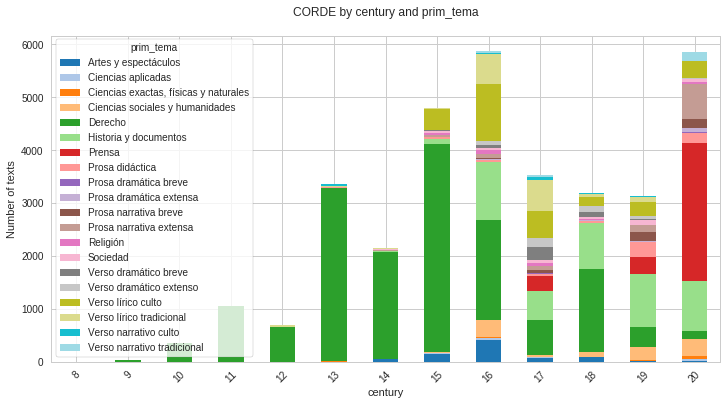

In [10]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = corde_metadata_culled, class_1 = "century", class_2 = "prim_tema", dataset = dataset)


In [11]:
#describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = corde_metadata_culled, class_1 = "century", class_2 = "formas", dataset = dataset)


## CORDE 1860-1960

In [12]:
dataset = "CORDE 1860-1960"

In [13]:
corde_freq_1860_1960 = pd.read_parquet(wdir + "corde_7000_1860-1960.pqt")
corde_freq_1860_1960.shape

(6587, 7000)

In [14]:
corde_metadatos_1860_1960 = pd.read_csv(wdir + "corde_metadatos_1860_1960.csv", sep = "\t", index_col = 0)
corde_metadatos_1860_1960.shape

(6587, 19)

In [15]:
corde_metadatos_1860_1960.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
17527,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,1903,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900
5587,abacca,Invitación a filosofar,"García Bacca, Juan David",España,1940 1942,ciencias sociales y humanidades: Filosofía y é...,Libro,72409,86842,7569,1940,20,Europa,NaN,Ciencias sociales y humanidades,Filosofía y ética,Técnico,Ciencias sociales y humanidades,1940
18829,abadengo,El Abadengo de Sahagún. Contribución al estudi...,"Puyol y Alonso, Julio",España,1915,Prosa didáctica: Oratoria y discurso,Libro,77110,93321,13484,1915,20,Europa,NaN,Prosa didáctica,Oratoria y discurso,Técnico,Prosa didáctica,1910
3743,abajo,Los de abajo,"Azuela, Mariano",México,1916,Prosa narrativa extensa: Novela y otras formas...,Libro,35183,44511,7423,1916,20,América,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1910
2573,abelcain,Abel mató a Caín,"Franco, Ramón",España,c 1933,Prosa narrativa extensa: Novela y otras formas...,Libro,5522,6359,2193,1933,20,Europa,c,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1930


In [16]:
corde_metadatos_1860_1960.index = corde_metadatos_1860_1960["archivo"]

In [17]:
Counter(corde_metadatos_1860_1960["model_tema"]).most_common()

[('Prensa', 2310),
 ('Cartas y relaciones', 1384),
 ('Prosa narrativa extensa', 461),
 ('Verso lírico', 387),
 ('Ciencias sociales y humanidades', 339),
 ('Derecho', 308),
 ('Novela y otras formas similares', 263),
 ('Prosa didáctica', 235),
 ('Prosa narrativa breve', 233),
 ('Verso narrativo', 190),
 ('Sociedad', 106),
 ('Historia y documentos', 103),
 ('Ciencias exactas, físicas, naturales y aplicadas', 91),
 ('Prosa dramática', 88),
 ('Religión', 20),
 ('Verso dramático', 17),
 ('Prosa lírica', 14),
 ('Artes y espectáculos', 14),
 ('Biografía-Autobiografía', 13),
 ('?', 11)]

In [20]:
corde_freq_1860_1960.head()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
aazorin,3735.0,2126.0,2830.0,1560.0,1700.0,1248.0,1274.0,1077.0,980.0,750.0,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
abacca,6764.0,4911.0,3196.0,2808.0,2313.0,1806.0,2075.0,1790.0,1284.0,848.0,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
abadengo,7101.0,5029.0,4129.0,2155.0,1839.0,2903.0,2156.0,2351.0,1286.0,1878.0,...,0.0,0.0,0.0,0.0,30.0,2.0,0.0,0.0,1.0,0.0
abajo,2664.0,1786.0,3994.0,1117.0,1310.0,873.0,625.0,728.0,933.0,619.0,...,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abelcain,435.0,361.0,290.0,217.0,190.0,150.0,140.0,138.0,143.0,189.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
corde_freq_1860_1960.index.tolist() == corde_metadatos_1860_1960["archivo"].tolist()

True

In [22]:
for column in corde_freq_1860_1960.columns.tolist():
    corde_freq_1860_1960[column] = corde_freq_1860_1960[column] / corde_metadatos_1860_1960["tokens"]

In [23]:
corde_freq_1860_1960.head()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
aazorin,0.067238,0.038273,0.050946,0.028083,0.030604,0.022467,0.022935,0.019388,0.017642,0.013502,...,0.00000,0.000000,0.000036,0.000054,0.000018,0.000000,0.0,0.0,0.000000,0.0
abacca,0.077889,0.056551,0.036802,0.032335,0.026635,0.020796,0.023894,0.020612,0.014785,0.009765,...,0.00000,0.000023,0.000000,0.000046,0.000000,0.000000,0.0,0.0,0.000000,0.0
abadengo,0.076092,0.053889,0.044245,0.023092,0.019706,0.031108,0.023103,0.025193,0.013780,0.020124,...,0.00000,0.000000,0.000000,0.000000,0.000321,0.000021,0.0,0.0,0.000011,0.0
abajo,0.059850,0.040125,0.089731,0.025095,0.029431,0.019613,0.014041,0.016356,0.020961,0.013907,...,0.00018,0.000000,0.000157,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
abelcain,0.068407,0.056770,0.045605,0.034125,0.029879,0.023589,0.022016,0.021702,0.022488,0.029722,...,0.00000,0.000000,0.000000,0.000786,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [24]:
corde_metadatos_1860_1960["tokens"].sum()

81332945

In [25]:
corde_freq_1860_1960 = corde_freq_1860_1960.fillna(0)

In [26]:
Counter(corde_metadatos_1860_1960["model_tema"]).most_common()

[('Prensa', 2310),
 ('Cartas y relaciones', 1384),
 ('Prosa narrativa extensa', 461),
 ('Verso lírico', 387),
 ('Ciencias sociales y humanidades', 339),
 ('Derecho', 308),
 ('Novela y otras formas similares', 263),
 ('Prosa didáctica', 235),
 ('Prosa narrativa breve', 233),
 ('Verso narrativo', 190),
 ('Sociedad', 106),
 ('Historia y documentos', 103),
 ('Ciencias exactas, físicas, naturales y aplicadas', 91),
 ('Prosa dramática', 88),
 ('Religión', 20),
 ('Verso dramático', 17),
 ('Artes y espectáculos', 14),
 ('Prosa lírica', 14),
 ('Biografía-Autobiografía', 13),
 ('?', 11)]

In [27]:
len(set(corde_metadatos_1860_1960["model_tema"]))

20

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


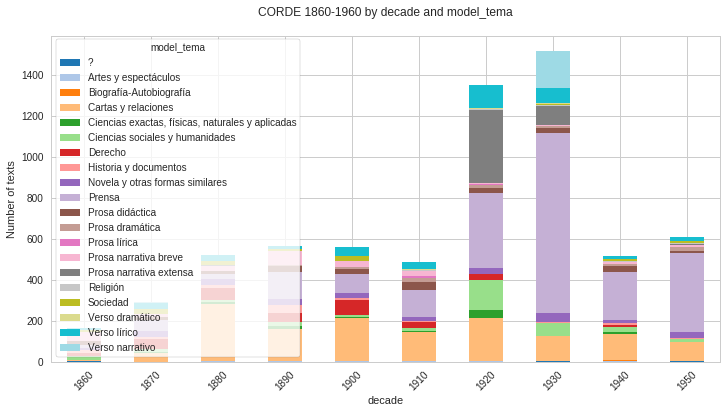

In [32]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = corde_metadatos_1860_1960, class_1 = "decade", class_2 = "model_tema", dataset = dataset)


In [36]:
corde_metadatos_1860_1960.loc[corde_metadatos_1860_1960["model_tema"] == "Prosa narrativa extensa"]

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
archivo,,,,,,,,,,,,,,,,,,,
apapu,apapu,Crónicas político-doméstico-taurinas,"Corrales, Juan Apapucio",Perú,c 1908 1930,Prosa narrativa extensa: Otras formas,Libro,100143,116880,18124,1908,20,América,c,Prosa narrativa extensa,Otras formas,Prosa,Prosa narrativa extensa,1900
castilla,castilla,Castilla,Azorín (José Martínez Ruiz),España,1912,Prosa narrativa extensa: Otras formas,Libro,22074,26151,5738,1912,20,Europa,NaN,Prosa narrativa extensa,Otras formas,Prosa,Prosa narrativa extensa,1910
centhumbsub1,centhumbsub1,Prefacio [Conferencias. Conferencias leídas en...,VV.AA.,España,1959 1960,Prosa,Libro,503,598,254,1959,20,Europa,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
centhumbsub2,centhumbsub2,Discurso de D. Antonio Peña Boeuf. Presidente ...,"Peña Boeuf, Alfonso",España,1959 1960,Prosa,Libro,569,631,315,1959,20,Europa,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
centhumbsub3,centhumbsub3,"La misión científica de Alejandro de Humboldt,...","Troll, Carl",España,1959 1960,Prosa,Libro,5966,6657,2026,1959,20,Europa,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
centhumbsub4,centhumbsub4,Humboldt en el Perú [Conferencias. Conferencia...,"Lohmann Villena, Guillermo",Perú,1959 1960,Prosa,Libro,5903,6610,2386,1959,20,América,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
centhumbsub5,centhumbsub5,"Triple significación del ""gran viaje"" de Aleja...","Melón y Ruiz de Gordejuela, Amando",España,1959 1960,Prosa,Libro,8489,9838,2832,1959,20,Europa,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
centhumbsub6,centhumbsub6,Alejandro de Humboldt y los naturalistas españ...,"Álvarez López, Enrique",España,1959 1960,Prosa,Libro,6952,7861,2237,1959,20,Europa,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1950
edadoro,edadoro,La Edad de Oro,"Martí, José",Cuba,1889,Prosa,Libro,67007,77940,8177,1889,19,América,NaN,Prosa,Prosa,Técnico,Prosa narrativa extensa,1880


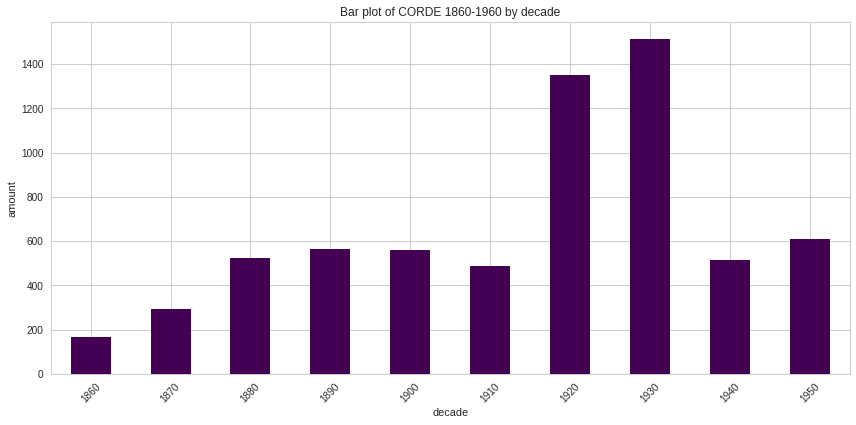

In [33]:
describe_data.grouped_bars(metadata = corde_metadatos_1860_1960, class_ = "decade", wdir = wdir, dataset = dataset)

In [24]:
corde_metadatos_1860_1960 = corde_metadatos_1860_1960.loc[corde_metadatos_1860_1960["tokens"] > 500]
corde_metadatos_1860_1960.shape

(3666, 19)

In [25]:
corde_freq_1860_1960 = corde_freq_1860_1960.loc[corde_metadatos_1860_1960["archivo"].tolist()]
corde_freq_1860_1960.shape

(3666, 7000)

In [26]:
corde_freq_1860_1960 = corde_freq_1860_1960.loc[:, (corde_freq_1860_1960 != 0).any(axis=0)]
corde_freq_1860_1960.shape

(3666, 6979)

In [27]:
corde_metadatos_1860_1960_dummies = pd.get_dummies(corde_metadatos_1860_1960[["model_tema"]]).set_index(corde_metadatos_1860_1960["archivo"])

In [28]:
corde_metadatos_1860_1960_dummies["genre"] = corde_metadatos_1860_1960["model_tema"]

In [30]:
corde_metadatos_1860_1960_dummies.columns

Index(['model_tema_?', 'model_tema_Artes y espectáculos',
       'model_tema_Biografía-Autobiografía', 'model_tema_Cartas y relaciones',
       'model_tema_Derecho', 'model_tema_Historia y documentos',
       'model_tema_Novela y otras formas similares', 'model_tema_Prensa',
       'model_tema_Prosa didáctica', 'model_tema_Prosa dramática',
       'model_tema_Prosa lírica', 'model_tema_Prosa narrativa breve',
       'model_tema_Prosa narrativa extensa', 'model_tema_Religión',
       'model_tema_Sociedad', 'model_tema_Verso dramático',
       'model_tema_Verso lírico', 'model_tema_Verso narrativo',
       'model_tema_ciencias exactas, físicas, naturales y aplicadas',
       'model_tema_ciencias sociales y humanidades', 'genre'],
      dtype='object')

# 3.3.3. CORDE 1860–1960 + CoNSSA

In [1]:
import sys
import os
sys.path.append(os.path.abspath("//home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features
import pandas as pd


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/"

In [3]:
corde_freq_1860_1960 = pd.read_parquet(wdir + "corde_7000_1860-1960.pqt")
corde_freq_1860_1960.shape

(6587, 7000)

In [4]:
corde_metadatos_1860_1960 = pd.read_csv(wdir + "corde_metadatos_1860_1960.csv", sep = "\t", index_col = 0)
corde_metadatos_1860_1960.shape

(6587, 19)

In [5]:
corde_metadatos_1860_1960.index = corde_metadatos_1860_1960["archivo"]

In [6]:
corde_freq_1860_1960.index.tolist() == corde_metadatos_1860_1960["archivo"].tolist()

True

In [7]:
for column in corde_freq_1860_1960.columns.tolist():
    corde_freq_1860_1960[column] = corde_freq_1860_1960[column] / corde_metadatos_1860_1960["tokens"]

In [8]:
corde_freq_1860_1960.head(3)

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
aazorin,0.067238,0.038273,0.050946,0.028083,0.030604,0.022467,0.022935,0.019388,0.017642,0.013502,...,0.0,0.000000,0.000036,0.000054,0.000018,0.000000,0.0,0.0,0.000000,0.0
abacca,0.077889,0.056551,0.036802,0.032335,0.026635,0.020796,0.023894,0.020612,0.014785,0.009765,...,0.0,0.000023,0.000000,0.000046,0.000000,0.000000,0.0,0.0,0.000000,0.0
abadengo,0.076092,0.053889,0.044245,0.023092,0.019706,0.031108,0.023103,0.025193,0.013780,0.020124,...,0.0,0.000000,0.000000,0.000000,0.000321,0.000021,0.0,0.0,0.000011,0.0


In [9]:
corde_metadatos_1860_1960.head(3)

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema,model_tema,decade
archivo,,,,,,,,,,,,,,,,,,,
aazorin,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,1903,20,Europa,NaN,Prosa narrativa extensa,Novela y otras formas similares,Prosa,Novela y otras formas similares,1900
abacca,abacca,Invitación a filosofar,"García Bacca, Juan David",España,1940 1942,ciencias sociales y humanidades: Filosofía y é...,Libro,72409,86842,7569,1940,20,Europa,NaN,Ciencias sociales y humanidades,Filosofía y ética,Técnico,Ciencias sociales y humanidades,1940
abadengo,abadengo,El Abadengo de Sahagún. Contribución al estudi...,"Puyol y Alonso, Julio",España,1915,Prosa didáctica: Oratoria y discurso,Libro,77110,93321,13484,1915,20,Europa,NaN,Prosa didáctica,Oratoria y discurso,Técnico,Prosa didáctica,1910


In [10]:
corde_metadatos_1860_1960_dummies = pd.get_dummies(corde_metadatos_1860_1960["model_tema"])

In [11]:
for column in corde_metadatos_1860_1960_dummies.columns.tolist():
    corde_metadatos_1860_1960[column] = corde_metadatos_1860_1960_dummies[column].astype(str)

In [12]:
conssa = pd.read_parquet("/home/jose/cligs/ne/freq_table_raw__T.pqt").T
conssa.shape

(358, 247069)

In [13]:
conssa.head(3)

,",",.,de,la,y,que,el,en,a,los,...,panamás,divorcie,panameños,panameño,panameña,panamericanismo,divorcien,panam,divorciándose,güeraes
ne0001,3414,2780,2628,2003,1914,1335,1646,1211,1218,767,...,0,0,0,0,0,0,0,0,0,0
ne0002,8003,7249,4270,3087,3161,3256,1638,1872,1934,894,...,0,0,0,0,0,0,0,0,0,0
ne0003,6493,4845,3020,2186,2650,2756,1532,1385,1453,706,...,0,0,0,0,0,0,0,0,0,0


In [14]:
conssa = conssa.loc[:].div(conssa.sum(axis='columns'), axis="index")

In [15]:
conssa.head(3)

,",",.,de,la,y,que,el,en,a,los,...,panamás,divorcie,panameños,panameño,panameña,panamericanismo,divorcien,panam,divorciándose,güeraes
ne0001,0.056335,0.045873,0.043365,0.033052,0.031583,0.022029,0.027161,0.019983,0.020098,0.012656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0002,0.077016,0.069760,0.041092,0.029708,0.030420,0.031334,0.015763,0.018015,0.018612,0.008603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0003,0.081770,0.061016,0.038032,0.027529,0.033373,0.034708,0.019293,0.017442,0.018298,0.008891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
conssa_metadata = pd.read_csv("/home/jose/cligs/ne/metadata_beta-opt-obl-structure.csv", index_col=0)

In [17]:
conssa_metadata.head(3)

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,121,13,483,200,312,177,518,41371,655,1900
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890


In [18]:
conssa_metadata["model_tema"] = "Novela y otras formas similares"

In [19]:
for column in corde_metadatos_1860_1960_dummies.columns.tolist():
    conssa_metadata[column] = "0"
conssa_metadata["Novela y otras formas similares"] = "1"

In [20]:
conssa_metadata_disputed = conssa_metadata.loc[conssa_metadata["genre"] != "novela"]
conssa_metadata_disputed.shape

(14, 195)

In [21]:
conssa_disputed = conssa.loc[conssa_metadata_disputed.index.tolist()]

In [22]:
conssa_metadata_undisputed = conssa_metadata.loc[conssa_metadata["genre"] == "novela"]

In [23]:
conssa_undisputed = conssa.loc[conssa_metadata_undisputed.index.tolist()]

In [24]:
conssa_undisputed.index.tolist() == conssa_metadata_undisputed.index.tolist()

True

In [25]:
conssa_disputed.index.tolist() == conssa_metadata_disputed.index.tolist()

True

## Culling CORDE

In [26]:
wdir

'/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/'

In [27]:
overlaping_authors = pd.ExcelFile(wdir + "overlaping authors corde-conssa.xlsx",  index_col=0)
overlaping_authors = overlaping_authors.parse('Sheet1').fillna(0)
overlaping_authors.head(3)

,authors,in CoNSSA
0,A. I.,0.0
1,A. P.,0.0
2,A.D.C.,0.0


In [28]:
overlaping_authors_list = overlaping_authors.loc[overlaping_authors["in CoNSSA"] == 1]["authors"].tolist()

In [29]:
corde_metadatos_1860_1960_culled = corde_metadatos_1860_1960.loc[~((corde_metadatos_1860_1960["autor"].isin(overlaping_authors_list) ) & (corde_metadatos_1860_1960["model_tema"] == "Novela y otras formas similares"))]

corde_metadatos_1860_1960_culled = corde_metadatos_1860_1960_culled.loc[~(corde_metadatos_1860_1960["autor"].isin(["Palacio Valdés, Armando","Machado, Antonio","Jiménez, Juan Ramón"]))]

corde_metadatos_1860_1960_culled.shape

(6456, 39)

In [30]:
corde_freq_1860_1960_culled = corde_freq_1860_1960.loc[corde_metadatos_1860_1960_culled.index.tolist()]
corde_freq_1860_1960_culled.shape

(6456, 7000)

In [31]:
corde_metadatos_1860_1960.shape[0] - corde_metadatos_1860_1960_culled.shape[0] 

131

In [32]:
corde_metadatos_1860_1960_culled.index.tolist() == corde_freq_1860_1960_culled.index.tolist()

True

In [33]:
corde_metadatos_1860_1960_culled.loc[corde_metadatos_1860_1960_culled["model_tema"] == "Novela y otras formas similares"].shape

(139, 39)

In [34]:
corde_freq_1860_1960_culled = corde_freq_1860_1960_culled.loc[:, (corde_freq_1860_1960_culled != 0).any(axis=0)]

In [35]:
conssa_disputed = conssa_disputed.loc[:, (conssa_disputed != 0).any(axis=0)]

In [36]:
conssa_undisputed = conssa_undisputed.loc[:, (conssa_undisputed != 0).any(axis=0)]

In [37]:
shared_tokens = []
for token in corde_freq_1860_1960_culled.columns.tolist():
    if token in conssa_undisputed.columns.tolist():
        shared_tokens.append(token)
print(len(shared_tokens))        

6554


In [38]:
corde_freq_1860_1960_culled = corde_freq_1860_1960_culled[shared_tokens]

In [39]:
corde_freq_1860_1960_culled_10000 = corde_freq_1860_1960_culled.iloc[:,0:10000]
corde_freq_1860_1960_culled_10000.shape

(6456, 6554)

In [40]:
corde_freq_1860_1960_culled_10000.head()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
abacca,0.077889,0.056551,0.036802,0.032335,0.026635,0.020796,0.023894,0.020612,0.014785,0.009765,...,0.000000,0.000023,0.000000,0.000046,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abadengo,0.076092,0.053889,0.044245,0.023092,0.019706,0.031108,0.023103,0.025193,0.013780,0.020124,...,0.000000,0.000000,0.000000,0.000000,0.000321,0.000021,0.000000,0.0,0.000011,0.0
abajo,0.059850,0.040125,0.089731,0.025095,0.029431,0.019613,0.014041,0.016356,0.020961,0.013907,...,0.000180,0.000000,0.000157,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abelcain,0.068407,0.056770,0.045605,0.034125,0.029879,0.023589,0.022016,0.021702,0.022488,0.029722,...,0.000000,0.000000,0.000000,0.000786,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abrojos,0.078765,0.033996,0.056021,0.023701,0.034475,0.023941,0.017237,0.023941,0.014604,0.011970,...,0.000239,0.000000,0.000239,0.000000,0.000000,0.000000,0.000239,0.0,0.000000,0.0


In [41]:
conssa_undisputed_10000 = conssa_undisputed[corde_freq_1860_1960_culled_10000.columns.tolist()]

In [42]:
conssa_undisputed_10000.shape

(344, 6554)

In [43]:
conssa_undisputed_10000.head()

,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
ne0001,0.056335,0.043365,0.045873,0.033052,0.031583,0.022029,0.019983,0.027161,0.020098,0.012656,...,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ne0002,0.077016,0.041092,0.069760,0.029708,0.030420,0.031334,0.018015,0.015763,0.018612,0.008603,...,0.000115,0.000000,0.000125,0.000000,0.000000,0.000010,0.000010,0.0,0.0,0.000000
ne0003,0.081770,0.038032,0.061016,0.027529,0.033373,0.034708,0.017442,0.019293,0.018298,0.008891,...,0.000076,0.000000,0.000025,0.000025,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ne0004,0.081983,0.040654,0.063088,0.028231,0.029205,0.030620,0.017877,0.017423,0.018043,0.008352,...,0.000111,0.000011,0.000044,0.000000,0.000000,0.000033,0.000022,0.0,0.0,0.000000
ne0005,0.074690,0.041314,0.072447,0.024912,0.029198,0.031287,0.016386,0.015226,0.015829,0.008000,...,0.000031,0.000015,0.000279,0.000000,0.000015,0.000031,0.000000,0.0,0.0,0.000015


In [44]:
corde_freq_1860_1960_culled_10000.columns.tolist() == conssa_undisputed_10000.columns.tolist()

True

## Merge data

In [45]:
eval_corpora = pd.concat([corde_freq_1860_1960_culled_10000, conssa_undisputed_10000])

In [46]:
eval_corpora.head()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
abacca,0.077889,0.056551,0.036802,0.032335,0.026635,0.020796,0.023894,0.020612,0.014785,0.009765,...,0.000000,0.000023,0.000000,0.000046,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abadengo,0.076092,0.053889,0.044245,0.023092,0.019706,0.031108,0.023103,0.025193,0.013780,0.020124,...,0.000000,0.000000,0.000000,0.000000,0.000321,0.000021,0.000000,0.0,0.000011,0.0
abajo,0.059850,0.040125,0.089731,0.025095,0.029431,0.019613,0.014041,0.016356,0.020961,0.013907,...,0.000180,0.000000,0.000157,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abelcain,0.068407,0.056770,0.045605,0.034125,0.029879,0.023589,0.022016,0.021702,0.022488,0.029722,...,0.000000,0.000000,0.000000,0.000786,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abrojos,0.078765,0.033996,0.056021,0.023701,0.034475,0.023941,0.017237,0.023941,0.014604,0.011970,...,0.000239,0.000000,0.000239,0.000000,0.000000,0.000000,0.000239,0.0,0.000000,0.0


In [47]:
eval_corpora.head()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
abacca,0.077889,0.056551,0.036802,0.032335,0.026635,0.020796,0.023894,0.020612,0.014785,0.009765,...,0.000000,0.000023,0.000000,0.000046,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abadengo,0.076092,0.053889,0.044245,0.023092,0.019706,0.031108,0.023103,0.025193,0.013780,0.020124,...,0.000000,0.000000,0.000000,0.000000,0.000321,0.000021,0.000000,0.0,0.000011,0.0
abajo,0.059850,0.040125,0.089731,0.025095,0.029431,0.019613,0.014041,0.016356,0.020961,0.013907,...,0.000180,0.000000,0.000157,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abelcain,0.068407,0.056770,0.045605,0.034125,0.029879,0.023589,0.022016,0.021702,0.022488,0.029722,...,0.000000,0.000000,0.000000,0.000786,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abrojos,0.078765,0.033996,0.056021,0.023701,0.034475,0.023941,0.017237,0.023941,0.014604,0.011970,...,0.000239,0.000000,0.000239,0.000000,0.000000,0.000000,0.000239,0.0,0.000000,0.0


In [48]:
eval_corpora.tail()

token,",",de,.,la,y,que,en,el,a,los,...,prosiguió,consideraciones,ganas,reacción,crónica,destierro,confesor,baxa,esteban,turco
ne0398,0.072227,0.051134,0.021760,0.027274,0.028922,0.028412,0.022957,0.022486,0.004022,0.009752,...,0.000000,0.000039,0.000059,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00002
ne0399,0.071731,0.043643,0.045074,0.032960,0.034074,0.028087,0.016126,0.025391,0.016746,0.017354,...,0.000253,0.000000,0.000025,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000
ne0401,0.065497,0.050637,0.035505,0.028757,0.027571,0.026609,0.018193,0.016927,0.014074,0.007951,...,0.000000,0.000000,0.000048,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.00000
ne0403,0.071185,0.043791,0.047109,0.015166,0.031280,0.029479,0.020853,0.015071,0.001043,0.005498,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000
ne0404,0.062692,0.058972,0.047595,0.036262,0.023341,0.020426,0.016967,0.028279,0.019121,0.011507,...,0.000000,0.000022,0.000022,0.000044,0.000022,0.000022,0.000044,0.0,0.0,0.00000


In [49]:
classes = corde_metadatos_1860_1960_dummies.columns.tolist()
#classes.append("model_tema")

In [50]:
print(classes)

['?', 'Artes y espectáculos', 'Biografía-Autobiografía', 'Cartas y relaciones', 'Ciencias exactas, físicas, naturales y aplicadas', 'Ciencias sociales y humanidades', 'Derecho', 'Historia y documentos', 'Novela y otras formas similares', 'Prensa', 'Prosa didáctica', 'Prosa dramática', 'Prosa lírica', 'Prosa narrativa breve', 'Prosa narrativa extensa', 'Religión', 'Sociedad', 'Verso dramático', 'Verso lírico', 'Verso narrativo']


In [51]:
eval_metadata = pd.concat([corde_metadatos_1860_1960_culled[classes], conssa_metadata_undisputed[classes]])

In [52]:
eval_metadata.head()

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
abacca,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abadengo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
abajo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
abelcain,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
abrojos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
eval_metadata.tail()

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
ne0398,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ne0399,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ne0401,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ne0403,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ne0404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
eval_corpora.index.tolist() == eval_metadata.index.tolist()

True

In [55]:
eval_corpora.to_parquet(wdir + "eval_corpora.parquet")

In [56]:
eval_metadata.to_csv(wdir+"eval_metadata.csv",sep="\t")

In [59]:
conssa_metadata_undisputed["model_tema"] = "Novela y otras formas similares"

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
conssa_metadata_undisputed["model_tema"] = "Novela y otras formas similares"
eval_metadata_tema = pd.concat([corde_metadatos_1860_1960_culled[["model_tema"]], conssa_metadata_undisputed[["model_tema"]]])

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
eval_metadata_tema.head()

,model_tema
abacca,Ciencias sociales y humanidades
abadengo,Prosa didáctica
abajo,Novela y otras formas similares
abelcain,Novela y otras formas similares
abrojos,Verso lírico


In [62]:
eval_metadata_tema.tail()

,model_tema
ne0398,Novela y otras formas similares
ne0399,Novela y otras formas similares
ne0401,Novela y otras formas similares
ne0403,Novela y otras formas similares
ne0404,Novela y otras formas similares


In [63]:
eval_metadata_tema.index.tolist() == eval_corpora.index.tolist()

True

In [56]:
MFFs = [6000] # 10,100,500,1000,2000,3000,4000,5000,6000
for MFF in MFFs:
    results = classify.classify(wdir = wdir, freq_table  = eval_corpora, metadata = eval_metadata,
                  classes = metadata.columns.tolist(), verbose = True,
                  methods = ["SVC","KNN","RF","LR","GN"],#["SVC","KNN","RF","LR","GN"],
                  max_MFFs = [MFF],#[10,100,500,1000,2000,3000,4000,5000,6000],
                  text_representations = ["raw","tfidf","log", "zscores","logzscores"],#,[,"raw","tfidf","zscores","logzscores"],#"relative"
                  typographies = [True], sampling_mode = "cross", make_relative = False, scoring="f1", under_sample_method = "lpc")

    results.to_csv(wdir + "evaluation_CORDE-CoNSSA/results_" + str(MFF) + ".csv", sep="\t")

(6800, 6000)
(6800, 20)


analysed class:	 ?
* Culling data
labels done
Counter({'0': 6789, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (6800,) 
 Data shape (6800, 6000)
undersampling lpc
after undersampling, labels and data good (22,) (22, 5720) lpc
typography  True
textual representation:  raw
[]
(22, 5720)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.70 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.999999999999999, pvalue=0.0002024993220676408)
0.0002024993220676408
Class: 	 ?
Scores: 	 [0.66666667 1.         0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.75 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.577959874688627, pvalue=0.00034384981127347366)
0.00034384981127347366
Class: 	 ?
Scores: 	 [0.8    

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.60 (+/- 0.98)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6123724356957945, pvalue=0.5554454421055857)
0.5554454421055857
Class: 	 ?
Scores: 	 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.75 (+/- 0.34)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.391550328268399, pvalue=0.0017416242281296454)
0.0017416242281296454
Class: 	 ?
Scores: 	 [0.5        1.         1.         0.66666667 0.66666667 1.
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 ?
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
textual representation:  tfidf
[]
(22, 5720)
MFW

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.63 (+/- 0.87)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9230769230769228, pvalue=0.3800487120450543)
0.3800487120450543
Class: 	 ?
Scores: 	 [0.66666667 1.         0.66666667 1.         1.         0.
 0.         1.         0.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.78 (+/- 0.30)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.629264850270505, pvalue=0.000322000445993488)
0.000322000445993488
Class: 	 ?
Scores: 	 [0.8        1.         0.66666667 0.66666667 1.         1.
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.68 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
2.806720467052002e-07
Class: 	 ?
Scores: 	 [0.8        0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.666666

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.87 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.600595188893873, pvalue=0.0057429728276380855)
0.0057429728276380855
Class: 	 ?
Scores: 	 [1.         1.         1.         1.         1.         0.
 0.66666667 1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.87 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.600595188893874, pvalue=0.005742972827638075)
0.005742972827638075
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.68 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
2.806720467052002e-07
Class: 	 ?
Scores: 	 [0.8        0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.6

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.83 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.253956867279842, pvalue=0.009934285491861962)
0.009934285491861962
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.66666667 1.         0.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.00 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
0.0
Class: 	 ?
Scores: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.80 (+/- 0.80)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.2500000000000004, pvalue=0.05100326070695074)
0.05100326070695074
Class: 	 ?
Scores: 	 [1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.93 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.749999999999996, pvalue=4.415857033909814e-06)
4.415857033909814e-06
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.66666667 1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.68 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
2.806720467052002e-07
Class: 	 ?
Scores: 	 [0.8        0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
textual representation:  logzscores
[]
(22, 5720

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.77 (+/- 0.79)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.021164610559645, pvalue=0.07398274707182734)
0.07398274707182734
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.         1.         0.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.77 (+/- 0.79)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.021164610559645, pvalue=0.07398274707182734)
0.07398274707182734
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.         1.         0.         1.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.67 (+/- 0.89)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1180339887498947, pvalue=0.29250632257378545)
0.29250632257378545
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         0.
 0.         1.         0.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.87 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.600595188893874, pvalue=0.005742972827638075)
0.005742972827638075
Class: 	 ?
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.68 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
2.806720467052002e-07
Class: 	 ?
Scores: 	 [0.8        0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.6666

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.83 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.253956867279842, pvalue=0.009934285491861962)
0.009934285491861962
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 1.         1.         0.66666667 1.         1.
 0.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.91 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.065085326211575, pvalue=8.04900019010416e-06)
8.04900019010416e-06
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 1.         0.8        0.66666667 1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.90 (+/- 0.31)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.855844048495725, pvalue=2.5588242922368e-05)
2.5588242922368e-05
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 1.         0.66666667 0.66666667 1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.91 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.065085326211575, pvalue=8.04900019010416e-06)
8.04900019010416e-06
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 1.         0.8        0.66666667 1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.91 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.065085326211575, pvalue=8.04900019010416e-06)
8.04900019010416e-06
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 1.         0.8        0.66666667 1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.85 (+/- 0.38)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.546840709851429, pvalue=0.0003578818644350343)
0.0003578818644350343
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 0.66666667 0.5        0.66666667 1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.30)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.527855249084086, pvalue=3.586525243571621e-05)
3.586525243571621e-05
Class: 	 Artes y espectáculos
Scores: 	 [0.66666667 0.66666667 0.8        0.66666667 1.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.78 (+/- 0.30)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.629264850270505, pvalue=0.000322000445993488)
0.000322000445993488
Class: 	 Biografía-Autobiografía
Scores: 	 [0.8        0.66666667 0.66666667 0.66666667 1.         1.
 0.66666667 0.66666667 1.         0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.73 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.25, pvalue=0.0005276973114471651)
0.0005276973114471651
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 1.         1.         0.666666

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.75 (+/- 0.81)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.860521018838127, pvalue=0.09573390947125933)
0.09573390947125933
Class: 	 Biografía-Autobiografía
Scores: 	 [0.5 1.  1.  0.  1.  1.  1.  1.  1.  0. ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.77 (+/- 0.31)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.237229365663818, pvalue=0.0005367366369119512)
0.0005367366369119512
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 0.66666667 1.         1.         0.66666667
 0.66666667 0.66666667 1.         0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.52)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.9364916731037094, pvalue=0.08478521278717344)
0.08478521278717344
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 1.         1.         0.66666667 0.66666667
 0.66666667 0.66666667 0.       

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.70 (+/- 0.77)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.5331141159874917, pvalue=0.1596136359609347)
0.1596136359609347
Class: 	 Biografía-Autobiografía
Scores: 	 [0.5        0.8        1.         1.         0.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.70 (+/- 0.55)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.166945355543845, pvalue=0.05840329332476218)
0.05840329332476218
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 1.         1.         1.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.00 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
0.0
Class: 	 Biografía-Autobiografía
Scores: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.68 (+/- 0.77)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.4347826086956523, pvalue=0.18517125468591142)
0.18517125468591142
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.5        1.         1.         1.         1.
 0.66666667 1.         0.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.63 (+/- 0.47)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.714285714285714, pvalue=0.12062074496836389)
0.12062074496836389
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 0.66666667 1.         

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.80 (+/- 0.63)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.831944959051439, pvalue=0.01965989856601466)
0.01965989856601466
Class: 	 Biografía-Autobiografía
Scores: 	 [0.5        0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.80 (+/- 0.63)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.831944959051439, pvalue=0.01965989856601466)
0.01965989856601466
Class: 	 Biografía-Autobiografía
Scores: 	 [0.5        0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.83 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.253956867279842, pvalue=0.009934285491861962)
0.009934285491861962
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 1.         1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.80 (+/- 0.63)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.831944959051439, pvalue=0.01965989856601466)
0.01965989856601466
Class: 	 Biografía-Autobiografía
Scores: 	 [0.5        0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.70 (+/- 0.55)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.166945355543845, pvalue=0.05840329332476218)
0.05840329332476218
Class: 	 Biografía-Autobiografía
Scores: 	 [0.66666667 0.66666667 1.         1.         1.

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(2768, 5999)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.97 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=102.9299157505337, pvalue=3.912799997906307e-15)
3.912799997906307e-15
Class: 	 Cartas y relaciones
Scores: 	 [0.96057348 0.95652174 0.97810219 0.98207885 0.98168498 0.95714286
 0.99275362 0.94661922 0.96750903 0.97454545]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.88 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.316022509659184, pvalue=4.770750506403674e-13)
4.770750506403674e-13
Class: 	 Cartas y relaciones
Scores: 	 [0.90647482 0.88405797 0.88235294 0.90647482 0.87591241 0.88811189
 0.86891386 0.85915493 0.9122807  0.85393258]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=143.42205315096257, pvalue=1.97947597117775

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.00 (+/- 0.01)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-226.06929069339645, pvalue=3.299011607437758e-18)
3.299011607437758e-18
Class: 	 Cartas y relaciones
Scores: 	 [0.01428571 0.         0.         0.         0.01438849 0.
 0.         0.         0.01438849 0.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=129.19799436636114, pvalue=5.065370378003949e-16)
5.065370378003949e-16
Class: 	 Cartas y relaciones
Scores: 	 [0.96323529 0.94117647 0.96727273 0.94890511 0.96678967 0.94202899
 0.95620438 0.95683453 0.9509434  0.97454545]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.97 (+/- 0.01)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=198.35689511441703, pvalue=1.0701354815714806e-17)
1.0701354815714806e-17
Class: 	 Cartas y relaciones
Scores: 	 [0.97080292 0.95652174 0.96703297 0

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(2768, 5999)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.97 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=125.1952152515209, pvalue=6.722973082736288e-16)
6.722973082736288e-16
Class: 	 Cartas y relaciones
Scores: 	 [0.95683453 0.96       0.97454545 0.98207885 0.98529412 0.96453901
 0.98916968 0.95714286 0.96402878 0.97101449]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.85 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.18699602884218, pvalue=2.8754076097715652e-11)
2.8754076097715652e-11
Class: 	 Cartas y relaciones
Scores: 	 [0.85608856 0.83773585 0.8125     0.87732342 0.84328358 0.87732342
 0.86259542 0.82909091 0.90510949 0.81954887]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=182.41403872510094, pvalue=2.274395

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.97 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.10484696768539, pvalue=2.5211295795588237e-12)
2.5211295795588237e-12
Class: 	 Ciencias exactas, físicas, naturales y aplicadas
Scores: 	 [1.         0.94117647 0.94736842 0.94736842 1.         0.94117647
 1.         0.94117647 1.         0.94117647]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.88 (+/- 0.16)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.205302579787768, pvalue=1.808292430932137e-07)
1.808292430932137e-07
Class: 	 Ciencias exactas, físicas, naturales y aplicadas
Scores: 	 [1.         0.82352941 0.82352941 0.75       0.94117647 0.875
 1.         0.88888889 0.94117647 0.8       ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.94 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.666906750235665, pvalue=1.6668856524743885e-08)
1.6668856524743885e-08
Class: 	 Cie

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.96 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.57625760795796, pvalue=5.417999881928763e-11)
5.417999881928763e-11
Class: 	 Ciencias exactas, físicas, naturales y aplicadas
Scores: 	 [1.         0.875      0.94736842 0.94736842 1.         0.94117647
 1.         0.94117647 1.         0.94117647]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.93 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.775454180396807, pvalue=4.283073761591633e-09)
4.283073761591633e-09
Class: 	 Ciencias exactas, físicas, naturales y aplicadas
Scores: 	 [1.         0.88888889 0.82352941 0.88888889 1.         0.875
 1.         0.94736842 0.88888889 0.94117647]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.94 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.541582681266398, pvalue=1.0406276166351055e-09)
1.0406276166351055e-09
Class: 	 Cienc

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.92 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.11933612007002, pvalue=4.731490520730838e-11)
4.731490520730838e-11
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.90909091 0.92753623 0.91428571 0.97142857 0.94117647 0.93150685
 0.92537313 0.92307692 0.875      0.83870968]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.50 (+/- 0.15)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.08179716899078175, pvalue=0.93659823503626)
0.93659823503626
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.47826087 0.52173913 0.48       0.53061224 0.64150943 0.50980392
 0.45454545 0.57142857 0.36363636 0.42857143]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.86012403150093, pvalue=4.803299350639836e-10)
4.803299350639836e-10
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


[]
(678, 5992)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.92 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.265604411352925, pvalue=3.5259831015858095e-12)
3.5259831015858095e-12
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.92537313 0.94285714 0.92753623 0.97142857 0.94117647 0.90410959
 0.93939394 0.92307692 0.875      0.89230769]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.54 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.5099204846418723, pvalue=0.16534448487596565)
0.16534448487596565
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.6        0.57142857 0.48       0.5        0.70175439 0.57692308
 0.52173913 0.47826087 0.46808511 0.46511628]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.14349983223359, pvalue=5.557268988123492e-09)
5

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.97 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.58273416730957, pvalue=4.969703955013826e-14)
4.969703955013826e-14
Class: 	 Derecho
Scores: 	 [0.98412698 0.95081967 0.98360656 0.98412698 0.93333333 0.98360656
 1.         0.96875    0.96774194 0.96774194]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.75 (+/- 0.15)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.232979953416887, pvalue=2.9530723066202173e-06)
2.9530723066202173e-06
Class: 	 Derecho
Scores: 	 [0.78431373 0.78431373 0.82142857 0.87272727 0.70833333 0.76
 0.72       0.76       0.59090909 0.69565217]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.94 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.46842264914883, pvalue=1.1917525248630954e-12)
1.1917525248630954e-12
Class: 	 Derecho
Scores: 	 [0.9375     0.96666667 0.95238095 0.88888889 0.95081967 0.92063492
 0

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.97 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.63286585565282, pvalue=8.33121365003577e-15)
8.33121365003577e-15
Class: 	 Derecho
Scores: 	 [1.         0.96774194 0.98360656 0.98412698 0.94915254 0.98360656
 0.98360656 0.95238095 0.96774194 0.96774194]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.90 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.90019908577446, pvalue=1.3044843342509803e-09)
1.3044843342509803e-09
Class: 	 Derecho
Scores: 	 [0.90322581 0.9        0.9        0.95238095 0.81481481 0.94915254
 0.91803279 0.93333333 0.80769231 0.93103448]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.95 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.83128841338996, pvalue=1.1228043828407325e-12)
1.1228043828407325e-12
Class: 	 Derecho
Scores: 	 [0.9375     0.94915254 0.96774194 0.88888889 0.96774194 0.92063492

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(206, 5991)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.91 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.588634874447784, pvalue=4.622305253854991e-09)
4.622305253854991e-09
Class: 	 Historia y documentos
Scores: 	 [1.         0.90909091 0.9        0.85714286 0.94736842 0.9
 0.81818182 0.82352941 0.95238095 0.95238095]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.82 (+/- 0.24)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.068139271453934, pvalue=2.0683319264755893e-05)
2.0683319264755893e-05
Class: 	 Historia y documentos
Scores: 	 [0.9        0.58823529 0.77777778 0.82352941 0.94736842 0.625
 0.84210526 0.82352941 0.88888889 0.95238095]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.949100930642356, pvalue=6.613881044087129e-08)


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.93 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.93456010008254, pvalue=1.4706748460018665e-08)
1.4706748460018665e-08
Class: 	 Historia y documentos
Scores: 	 [1.         0.90909091 1.         0.85714286 1.         0.95238095
 0.81818182 0.82352941 0.95238095 0.95238095]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.84 (+/- 0.19)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.596935084919334, pvalue=2.203941472651228e-06)
2.203941472651228e-06
Class: 	 Historia y documentos
Scores: 	 [0.95238095 0.66666667 0.77777778 0.82352941 0.94736842 0.70588235
 0.84210526 0.82352941 0.88888889 0.95238095]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.098571033098118, pvalue=6.097044017161976e-08)
6.097044017161976e-08
Class: 	 Historia y documentos
Scores: 	 [1.         0.85714286

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


[]
(966, 6000)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.97 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.32255288956624, pvalue=5.122036944216769e-14)
5.122036944216769e-14
Class: 	 Novela y otras formas similares
Scores: 	 [0.97029703 0.93069307 0.96969697 0.97959184 1.         1.
 0.97916667 0.96907216 0.97959184 0.96907216]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.93 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.67351952884246, pvalue=2.7382966015079e-10)
2.7382966015079e-10
Class: 	 Novela y otras formas similares
Scores: 	 [0.92783505 0.82608696 0.92631579 0.92473118 0.95652174 0.96774194
 0.95744681 0.93617021 0.97916667 0.87912088]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.05432794022411, pvalue=1.8427938453466277e-13)
1.8427938453

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(966, 6000)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.98 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=113.72814354799213, pvalue=1.5952304941432162e-15)
1.5952304941432162e-15
Class: 	 Novela y otras formas similares
Scores: 	 [0.97029703 0.95145631 0.98989899 0.96969697 0.98969072 1.
 0.97916667 0.97959184 0.97959184 0.97916667]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.93 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.847639691603085, pvalue=1.1055394959207487e-10)
1.1055394959207487e-10
Class: 	 Novela y otras formas similares
Scores: 	 [0.91666667 0.84444444 0.91489362 0.92631579 0.92307692 0.98947368
 0.95744681 0.94623656 0.96842105 0.89130435]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.6447066933136

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(4620, 6000)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.92 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.8295804395808, pvalue=4.421007889485151e-13)
4.421007889485151e-13
Class: 	 Prensa
Scores: 	 [0.89462366 0.94553377 0.87581699 0.92810458 0.9017094  0.93361884
 0.92077088 0.93446089 0.92440605 0.90280778]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.82 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.200611096536235, pvalue=8.998002179957091e-13)
8.998002179957091e-13
Class: 	 Prensa
Scores: 	 [0.80505415 0.83969466 0.80898876 0.82771536 0.81180812 0.8647619
 0.8241966  0.80874317 0.83458647 0.82109228]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.91 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=90.6079069629965, pvalue=1.2314855838034993e-14)
1.2314855838034993e-14

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.01 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-168.01327258629834, pvalue=4.766637800581941e-17)
4.766637800581941e-17
Class: 	 Prensa
Scores: 	 [0.00862069 0.00862069 0.01716738 0.02564103 0.00862069 0.00862069
 0.         0.         0.02564103 0.01716738]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.92 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=98.19566491907884, pvalue=5.975612964336957e-15)
5.975612964336957e-15
Class: 	 Prensa
Scores: 	 [0.90153173 0.92608696 0.90222222 0.92576419 0.9159292  0.93449782
 0.90829694 0.94013304 0.93273543 0.92105263]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.89 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.43393864200999, pvalue=2.3226077750277764e-14)
2.3226077750277764e-14
Class: 	 Prensa
Scores: 	 [0.88435374 0.90337079 0.85647059 0.90160183 0.88167053 0.88584475
 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(4620, 6000)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.92 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=103.20116408776086, pvalue=3.821279085060891e-15)
3.821279085060891e-15
Class: 	 Prensa
Scores: 	 [0.90517241 0.93478261 0.89848812 0.91774892 0.90831557 0.92903226
 0.91880342 0.93220339 0.92672414 0.9055794 ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.00485110862861, pvalue=1.4458738487652644e-14)
1.4458738487652644e-14
Class: 	 Prensa
Scores: 	 [0.7972028  0.82003711 0.8        0.81003584 0.80565371 0.82909091
 0.82695811 0.80565371 0.81238616 0.82156134]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.91 (+/- 0.01)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=195.42073430220668, pvalue=1.2238167983997348e-17)
1.2238167

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.88 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.385531286597956, pvalue=3.3537793578135635e-09)
3.3537793578135635e-09
Class: 	 Prosa didáctica
Scores: 	 [0.78431373 0.82608696 0.84444444 0.89361702 0.94117647 0.93617021
 0.91304348 0.85714286 0.93333333 0.85106383]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.70 (+/- 0.15)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.797014452307003, pvalue=2.716392773794053e-05)
2.716392773794053e-05
Class: 	 Prosa didáctica
Scores: 	 [0.77272727 0.62857143 0.61111111 0.66666667 0.81818182 0.7027027
 0.75675676 0.8        0.61111111 0.63157895]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.85 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.435149248339545, pvalue=3.0352304596559346e-08)
3.0352304596559346e-08
Class: 	 Prosa didáctica
Scores: 	 [0.8        0.76190476 0.83333333 0.869

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.88 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.801287873376687, pvalue=6.781811446620162e-10)
6.781811446620162e-10
Class: 	 Prosa didáctica
Scores: 	 [0.80769231 0.82608696 0.86956522 0.89361702 0.94117647 0.93617021
 0.91666667 0.88372093 0.91304348 0.85106383]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.72 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.071346122118648, pvalue=3.372533292853774e-06)
3.372533292853774e-06
Class: 	 Prosa didáctica
Scores: 	 [0.72727273 0.61111111 0.64864865 0.68421053 0.84444444 0.73684211
 0.78947368 0.73684211 0.73684211 0.66666667]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.650480891726705, pvalue=1.0606479290552876e-08)
1.0606479290552876e-08
Class: 	 Prosa didáctica
Scores: 	 [0.85185185 0.7826087  0.75       0.916

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.99 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.6651197776941, pvalue=2.2240966463315465e-13)
2.2240966463315465e-13
Class: 	 Prosa dramática
Scores: 	 [1.         1.         0.94736842 1.         1.         1.
 0.94117647 1.         1.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.83 (+/- 0.19)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.399158714344932, pvalue=2.5809420353903126e-06)
2.5809420353903126e-06
Class: 	 Prosa dramática
Scores: 	 [0.88888889 0.71428571 0.82352941 0.8        1.         0.88888889
 0.66666667 0.94117647 0.85714286 0.76923077]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.96 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.95246595024702, pvalue=2.6872458228692693e-09)
2.6872458228692693e-09
Class: 	 Prosa dramática
Scores: 	 [1.         0.82352941 0.94736842 0.875      1

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(176, 5874)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.99 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=69.75000000000009, pvalue=1.2932700840519306e-13)
1.2932700840519306e-13
Class: 	 Prosa dramática
Scores: 	 [1.         1.         0.94736842 1.         1.         0.94736842
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.83 (+/- 0.22)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.686210910409224, pvalue=1.140321635109908e-05)
1.140321635109908e-05
Class: 	 Prosa dramática
Scores: 	 [0.88888889 0.61538462 0.82352941 0.8        1.         0.88888889
 0.66666667 0.94117647 0.85714286 0.76923077]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.97 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.063329591673664, pvalue=7.990218425540722

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.85 (+/- 0.32)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.586325162363685, pvalue=0.00010085117320398333)
0.00010085117320398333
Class: 	 Prosa lírica
Scores: 	 [0.66666667 0.66666667 0.8        1.         0.66666667 1.
 1.         1.         0.66666667 1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Prosa lírica
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.75 (+/- 0.78)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.9047550689764603, pvalue=0.08920710123474326)
0.08920710123474326
Class: 	 Prosa lírica
Scores: 	 [1.         0.66666667 0.8        0.         0.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.81 (+/- 0.31)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.979731954243793, pvalue=0.00020760141137821314)
0.00020760141137821314
Class: 	 Prosa lírica
Scores: 	 [0.66666667 0.66666667 0.8        1.         0.66666667 1.
 1.         0.66666667 0.66666667 1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.50 (+/- 0.71)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
1.0
Class: 	 Prosa lírica
Scores: 	 [0.4        0.8        0.8        0.66666667 1.         0.
 0.66666667 0.66666667 0.         0.        ]
Baseline: 		 0.5

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.45 (+/- 0.94)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.31799936400190787, pvalue=0.7577400727729553)
0.7577400727729553
Class: 	 Prosa lírica
Scores: 	 [0.  0.5 0.  1.  0.  1.  1.  0.  1.  0. ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.73 (+/- 0.76)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7894736842105263, pvalue=0.10716015008445688)
0.10716015008445688
Class: 	 Prosa lírica
Scores: 	 [0.8        0.8        0.66666667 1.         0.         1.
 1.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.63 (+/- 0.85)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.896332785804476, pvalue=0.3934181424788814)
0.3934181424788814
Class: 	 Prosa lírica
Scores: 	 [0.8        0.8        0.66666667 1.         0.         1.
 1.         0.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.66 (+/- 0.71)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.3536800319293016, pvalue=0.20885302598473063)
0.20885302598473063
Class: 	 Prosa lírica
Scores: 	 [0.66666667 0.8        0.8        1.         1.         0.
 0.66666667 1.         

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.60 (+/- 0.84)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6884626626574457, pvalue=0.5085171156347162)
0.5085171156347162
Class: 	 Prosa lírica
Scores: 	 [0.5        0.8        0.66666667 1.         0.         1.
 1.         0.         1.         0.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.00 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
0.0
Class: 	 Prosa lírica
Scores: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.63 (+/- 0.85)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.8963327858044757, pvalue=0.3934181424788815)
0.3934181424788815
Class: 	 Prosa lírica
Scores: 	 [0.8        0.8        0.66666667 0.         0.         1.
 1.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.57 (+/- 0.83)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.4803844614152613, pvalue=0.6424151377207893)
0.6424151377207893
Class: 	 Prosa lírica
Scores: 	 [0.5        0.5        0.66666667 1.         0.         1.
 1.         0.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.57 (+/- 0.79)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.5052911526399112, pvalue=0.625495839310463)
0.625495839310463
Class: 	 Prosa lírica
Scores: 	 [0.66666667 1.         0.66666667 0.66666667 1.         0.
 0.66666667 1.         0.         0.        ]
Baseline: 		 0.5
textual representation:  logzscores
[]
(26, 4942)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.63 (+/- 0.85)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.896332785804476, pvalue=0.3934181424788814)
0.3934181424788814
Class: 	 Prosa lírica
Scores: 	 [0.8        0.8        0.666

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.50 (+/- 0.89)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
1.0
Class: 	 Prosa lírica
Scores: 	 [0.5 0.5 0.  1.  0.  1.  1.  0.  1.  0. ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.73 (+/- 0.76)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7894736842105263, pvalue=0.10716015008445688)
0.10716015008445688
Class: 	 Prosa lírica
Scores: 	 [0.8        0.8        0.66666667 1.         0.         1.
 1.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.67 (+/- 0.89)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1180339887498947, pvalue=0.29250632257378545)
0.29250632257378545
Class: 	 Prosa lírica
Scores: 	 [1.         1.         0.66666667 1.         0.         1.
 1.         0.         1.         0.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.58 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7816856988743048, pvalue=0.4544708312038964)
0.4544708312038964
Class: 	 Prosa lírica
Scores: 	 [0.66666667 0.8        0.66666667 0.66666667 1.         0.
 0.66666667 0.66666667 0.66666667 0.        ]
Baseline: 		 0.5


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 6567, '1': 233})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  233
Labels shape (6800,) 
 Data shape (6800, 6000)
undersampling lpc
after undersampling, labels and data good (466,) (466, 5860) 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.90 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.727716020511803, pvalue=2.932082895381689e-09)
2.932082895381689e-09
Class: 	 Prosa narrativa breve
Scores: 	 [0.93617021 0.85106383 0.89795918 1.         0.92       0.81818182
 0.85106383 0.86956522 0.95833333 0.93023256]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.60 (+/- 0.21)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.9890584135408553, pvalue=0.015224155551757953)
0.015224155551757953
Class: 	 Prosa narrativa breve
Scores: 	 [0.75       0.59459459 0.57894737 0.58823529 0.71428571 0.36363636
 0.55555556 0.55555556 0.71794872 0.62857143]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.85 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.714825979155858, pvalue=4.390037986513424e-09)
4.390037986513424e-09
Class: 	 Prosa narrativa breve
Scores: 	 [0.91666667 0.84615385 0.

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.92 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.83355683056219, pvalue=1.4628309337871165e-10)
1.4628309337871165e-10
Class: 	 Prosa narrativa breve
Scores: 	 [0.93617021 0.86956522 0.88       1.         0.92       0.89361702
 0.91304348 0.86956522 0.95652174 0.93023256]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.73 (+/- 0.23)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.097406976838009, pvalue=0.00017980943980264142)
0.00017980943980264142
Class: 	 Prosa narrativa breve
Scores: 	 [0.88372093 0.63636364 0.79069767 0.80952381 0.86956522 0.55555556
 0.54054054 0.71428571 0.77272727 0.75      ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.40968275729291, pvalue=1.2463466875431194e-10)
1.2463466875431194e-10
Class: 	 Prosa narrativa breve
Scores: 	 [0.88888889 0.863636

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.98 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=102.83512132283616, pvalue=3.9453563998315795e-15)
3.9453563998315795e-15
Class: 	 Prosa narrativa extensa
Scores: 	 [0.96774194 0.9787234  1.         0.97777778 0.98924731 0.96629213
 0.98901099 0.97826087 0.95454545 1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.33 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.209061476197817, pvalue=3.0113449657806165e-06)
3.0113449657806165e-06
Class: 	 Prosa narrativa extensa
Scores: 	 [0.26666667 0.35087719 0.25925926 0.28571429 0.35087719 0.36065574
 0.35087719 0.36666667 0.31034483 0.42622951]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.97 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=106.46785847695908, pvalue=2.887314532773255e-15)
2.887314532773255e-15
Class: 	 Prosa narrativa extensa
Scores: 	 [0.96774194 

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.00 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
0.0
Class: 	 Prosa narrativa extensa
Scores: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.98 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=102.24240305363189, pvalue=4.155874472867486e-15)
4.155874472867486e-15
Class: 	 Prosa narrativa extensa
Scores: 	 [0.97826087 0.98924731 1.         0.97777778 0.98901099 0.96629213
 0.96703297 0.97777778 0.95454545 1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.97 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.31089795962477, pvalue=1.5596872122876526e-13)
1.5596872122876526e-13
Class: 	 Prosa narrativa extensa
Scores: 	 [0.96703297 0.98924731 0.96842105 0.97777778 0.97826087 0.95454545
 0.96774194 0.97777778 0.91954023 1.        ]
Baseline: 		 0.5
method used:	 GN
c

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(922, 5945)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.98 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.99609361061756, pvalue=1.3088345353516845e-14)
1.3088345353516845e-14
Class: 	 Prosa narrativa extensa
Scores: 	 [0.96774194 0.98924731 1.         0.97777778 0.98924731 0.95454545
 0.98901099 0.98901099 0.95454545 1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.32 (+/- 0.18)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.103209877014106, pvalue=0.00017854789428973754)
0.00017854789428973754
Class: 	 Prosa narrativa extensa
Scores: 	 [0.31746032 0.1509434  0.32727273 0.21428571 0.25454545 0.39344262
 0.31578947 0.45901639 0.33898305 0.41935484]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.98 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=105.68204253799196, pvalu

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.85 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.436256722366467, pvalue=0.00743435559630087)
0.00743435559630087
Class: 	 Religión
Scores: 	 [1.         0.8        1.         1.         1.         1.
 0.66666667 1.         1.         0.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.78 (+/- 0.28)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.96909850700266, pvalue=0.00021033392821915675)
0.00021033392821915675
Class: 	 Religión
Scores: 	 [0.8        0.8        0.8        0.66666667 0.8        0.8
 0.5        1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Religión
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Religión
Scores: 	 [1.         0.8        0.66666667 0.66666667 1.         1.
 1.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.60)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
0.012526500476039823
Class: 	 Religión
Scores: 	 [1.         0.8        0.66666667 0.66666667 1.         1.
 1.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.91 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.065085326211577, pvalue=8.04900019010416e-06)
8.04900019010416e-06
Class: 	 Religión
Scores: 	 [1.         0.8        1.         0.66666667 1.         1.
 1.         1.         1. 

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


textual representation:  zscores
[]
(40, 5832)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.93 (+/- 0.23)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.922498380580624, pvalue=1.7088002377946672e-06)
1.7088002377946672e-06
Class: 	 Religión
Scores: 	 [1.         0.8        1.         0.8        1.         1.
 1.         1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.75 (+/- 0.58)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.549199427569171, pvalue=0.0312357460428718)
0.0312357460428718
Class: 	 Religión
Scores: 	 [1.         0.66666667 0.66666667 0.8        1.         0.66666667
 1.         1.         0.         0.66666667]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.89 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.595879881861784, pvalue=1.2413244265563139e-05)
1.2413244265563139e-05
Class: 	 Religión
Scores: 	 [1.         0.8        1.         0.8        1.         1.
 0.66666667 1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.93 (+/- 0.23)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.922498380580624, pvalue=1.7088002377946672e-06)
1.7088002377946672e-06
Class: 	 Religión
Scores: 	 [1.         0.8        1.         0.8        1.         1.
 1.         1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Religión
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.6666

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.89 (+/- 0.27)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.595879881861784, pvalue=1.2413244265563139e-05)
1.2413244265563139e-05
Class: 	 Religión
Scores: 	 [1.         0.8        0.66666667 0.8        1.         1.
 1.         1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.88 (+/- 0.30)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.527855249084081, pvalue=3.586525243571633e-05)
3.586525243571633e-05
Class: 	 Religión
Scores: 	 [1.         0.8        0.66666667 0.66666667 1.         1.
 1.         1.         1.         0.66666667]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.71 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.147131895973647, pvalue=3.1682019405689447e-06)
3.1682019405689447e-06
Class: 	 Religión
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.8        0.8
 0.66666667 0.8  

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.88 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.192099672256877, pvalue=8.345268194495125e-09)
8.345268194495125e-09
Class: 	 Sociedad
Scores: 	 [0.83333333 0.95238095 0.85714286 1.         0.90909091 0.84210526
 0.88888889 0.82352941 0.90909091 0.81818182]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.73 (+/- 0.16)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.737948046174745, pvalue=1.086565955149134e-05)
1.086565955149134e-05
Class: 	 Sociedad
Scores: 	 [0.63157895 0.8        0.70588235 0.70588235 0.85714286 0.70588235
 0.82352941 0.82352941 0.66666667 0.625     ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.89 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.361188187524963, pvalue=5.076167839166116e-09)
5.076167839166116e-09
Class: 	 Sociedad
Scores: 	 [0.76923077 0.81818182 0.90909091 0.90909091 0.95652174 0.90909

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.89 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.1972029787707, pvalue=5.434051799301225e-09)
5.434051799301225e-09
Class: 	 Sociedad
Scores: 	 [0.86956522 0.95238095 0.85714286 1.         0.90909091 0.84210526
 0.88888889 0.82352941 0.90909091 0.81818182]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.71 (+/- 0.22)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.7140923435014335, pvalue=0.0002891062466880555)
0.0002891062466880555
Class: 	 Sociedad
Scores: 	 [0.55555556 0.77777778 0.53333333 0.70588235 0.85714286 0.77777778
 0.75       0.82352941 0.73684211 0.57142857]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.84019404643846, pvalue=1.919404006367387e-09)
1.919404006367387e-09
Class: 	 Sociedad
Scores: 	 [0.78571429 0.81818182 0.85714286 0.84210526 0.90909091 0.9090909

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.97 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
2.0508298985827283e-07
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.97 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
2.0508298985827283e-07
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Verso dramático
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

f1: 0.97 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
2.0508298985827283e-07
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.97 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
2.0508298985827283e-07
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 GN
cross validation sampling
f1: 0.67 (+/- 0.00)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
6.680867530432422e-138
Class: 	 Verso dramático
Scores: 	 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.97 (+/- 0.20)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
2.0508298985827283e-07
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.53 (+/- 0.90)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.22116293423234565, pvalue=0.8299017405369028)
0.8299017405369028
Class: 	 Verso dramático
Scores: 	 [0.66666667 0.66666667 0.         1.         1.         0.
 0.         1.         1.         0.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.92 (+/- 0.34)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.319250547113998, pvalue=4.471603467254282e-05)
4.471603467254282e-05
Class: 	 Verso dramático
Scores: 	 [1.         1.         0.66666667 1.         1.         1.
 0

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.93 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.12045936787563, pvalue=5.300619043275893e-12)
5.300619043275893e-12
Class: 	 Verso lírico
Scores: 	 [0.89189189 0.96103896 0.90666667 0.89473684 0.88311688 0.93150685
 0.93506494 0.9382716  0.94871795 0.96202532]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.74 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.079466846560619, pvalue=7.27876782262188e-07)
7.27876782262188e-07
Class: 	 Verso lírico
Scores: 	 [0.74358974 0.61333333 0.72289157 0.81927711 0.74358974 0.80597015
 0.74285714 0.65789474 0.75       0.76923077]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.72100175655815, pvalue=4.0815096509138676e-11)
4.0815096509138676e-11
Class: 	 Verso lírico
Scores: 	 [0.85333333 0.83116883 0.87323944 0.82857143 0.86486

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


[]
(764, 5971)
MFW 6000
method used:	 SVC
cross validation sampling
f1: 0.92 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.35961332367286, pvalue=4.1790978277702915e-12)
4.1790978277702915e-12
Class: 	 Verso lírico
Scores: 	 [0.87671233 0.90909091 0.90666667 0.89473684 0.89473684 0.93150685
 0.93506494 0.93670886 0.92307692 0.97435897]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.79 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.613495916436328, pvalue=5.199111309918975e-10)
5.199111309918975e-10
Class: 	 Verso lírico
Scores: 	 [0.81818182 0.7173913  0.76923077 0.82758621 0.79569892 0.83333333
 0.79069767 0.7816092  0.80952381 0.8045977 ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.85 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.906690380402512, pvalue=6.549016701198978e-10)
6.549016701198978e-10
Class: 	 Vers

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.94 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.62598409204516, pvalue=9.867593131451008e-13)
9.867593131451008e-13
Class: 	 Verso narrativo
Scores: 	 [0.92682927 0.94444444 0.9047619  0.92307692 0.97435897 0.94736842
 0.94736842 0.88888889 0.95       0.94444444]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.51 (+/- 0.26)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.13819293427295934, pvalue=0.8931304751555877)
0.8931304751555877
Class: 	 Verso narrativo
Scores: 	 [0.5        0.61538462 0.42105263 0.35714286 0.65       0.55555556
 0.70588235 0.54545455 0.25806452 0.4516129 ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.89 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.410964409110502, pvalue=4.972768129486787e-09)
4.972768129486787e-09
Class: 	 Verso narrativo
Scores: 	 [0.78947368 0.88235294 0.81818182 0.94736842 0.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.31 (+/- 0.36)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.192380262259077, pvalue=0.010964588123280732)
0.010964588123280732
Class: 	 Verso narrativo
Scores: 	 [0.48       0.         0.26086957 0.41666667 0.25       0.34782609
 0.64516129 0.1        0.4        0.18181818]
Baseline: 		 0.5
textual representation:  logzscores
[]
(380, 5782)
MFW 6000
method used:	 SVC
cross validation sampling


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.94 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.69348215423057, pvalue=3.694060957111441e-10)
3.694060957111441e-10
Class: 	 Verso narrativo
Scores: 	 [0.97435897 0.94444444 0.88372093 0.95       0.97435897 0.94736842
 0.92307692 0.83333333 1.         0.94444444]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.74 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.63937341880494, pvalue=4.568686981721495e-08)
4.568686981721495e-08
Class: 	 Verso narrativo
Scores: 	 [0.75       0.7826087  0.69387755 0.63829787 0.79166667 0.73469388
 0.76595745 0.72727273 0.72340426 0.74418605]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.90 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.206121100065776, pvalue=2.0763848095289937e-08)
2.0763848095289937e-08
Class: 	 Verso narrativo
Scores: 	 [0.86486486 0.88235294 0.81818182 0.95   

In [57]:
results

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1,test_result_pvalue,labels,sample_size
443,Verso dramático,1.000000,0.000000e+00,0.5,0.500000,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,100,True,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000e+00,ordenansub77 0 ordenansub80 0 revolt...,34
441,Verso dramático,1.000000,0.000000e+00,0.5,0.500000,"KNeighborsClassifier(algorithm='auto', leaf_si...",zscores,100,True,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000e+00,ordenansub77 0 ordenansub80 0 revolt...,34
440,Verso dramático,0.980000,6.000000e-02,0.5,0.480000,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,100,True,"[1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.808927e-09,ordenansub77 0 ordenansub80 0 revolt...,34
15,?,0.980000,6.000000e-02,0.5,0.480000,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,100,True,"[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.808927e-09,pre063sub13 0 solfeo 0 indust...,22
298,Prosa dramática,0.955452,3.345389e-02,0.5,0.455452,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,100,True,"[0.9411764705882353, 0.9411764705882353, 1.0, ...",1.574897e-11,ordenansub83 0 valleincsub3 1 juanjo...,176
295,Prosa dramática,0.951300,4.936077e-02,0.5,0.451300,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,100,True,"[0.9411764705882353, 0.9411764705882353, 1.0, ...",5.519461e-10,ordenansub83 0 valleincsub3 1 juanjo...,176
221,Novela y otras formas similares,0.950433,1.567273e-02,0.5,0.450433,"KNeighborsClassifier(algorithm='auto', leaf_si...",logzscores,100,True,"[0.9183673469387755, 0.9583333333333333, 0.96,...",1.924230e-14,alfajor 0 cguillensub118 0 panero...,966
212,Novela y otras formas similares,0.947027,2.640307e-02,0.5,0.447027,BaggingClassifier(base_estimator=DecisionTreeC...,log,100,True,"[0.9292929292929293, 0.968421052631579, 0.9896...",2.230877e-12,alfajor 0 cguillensub118 0 panero...,966
448,Verso dramático,0.946667,1.107550e-01,0.5,0.446667,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,100,True,"[1.0, 0.8, 0.6666666666666666, 1.0, 1.0, 1.0, ...",7.180318e-07,ordenansub77 0 ordenansub80 0 revolt...,34
222,Novela y otras formas similares,0.946250,2.904971e-02,0.5,0.446250,BaggingClassifier(base_estimator=DecisionTreeC...,logzscores,100,True,"[0.9504950495049506, 0.9896907216494846, 0.969...",5.337552e-12,alfajor 0 cguillensub118 0 panero...,966


# 3.3.5. Multi-Class Evaluation of Parameters


In [69]:
results

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1_macro,test_result_pvalue,labels,sample_size
52,model_tema,0.604167,0.126300,0.05,0.554167,"LogisticRegression(C=1.0, class_weight=None, d...",log,5000,True,"[0.635, 0.5583333333333333, 0.4666666666666666...",3.488668e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
47,model_tema,0.603190,0.128107,0.05,0.553190,"LogisticRegression(C=1.0, class_weight=None, d...",log,4000,True,"[0.6285714285714286, 0.5416666666666666, 0.599...",4.001492e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
42,model_tema,0.577857,0.111590,0.05,0.527857,"LogisticRegression(C=1.0, class_weight=None, d...",log,3000,True,"[0.6285714285714286, 0.5583333333333333, 0.516...",1.824210e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
62,model_tema,0.534690,0.108885,0.05,0.484690,"LogisticRegression(C=1.0, class_weight=None, d...",log,2000,True,"[0.6735714285714286, 0.375, 0.4916666666666666...",3.081823e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
97,model_tema,0.531690,0.101110,0.05,0.481690,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,6000,True,"[0.6802380952380952, 0.5583333333333333, 0.475...",1.715441e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
57,model_tema,0.531333,0.094074,0.05,0.481333,"LogisticRegression(C=1.0, class_weight=None, d...",log,6000,True,"[0.565, 0.5416666666666666, 0.4666666666666666...",9.233517e-08,"rycajalsub11 Ciencias exactas, físicas, n...",220
95,model_tema,0.491881,0.133788,0.05,0.441881,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,6000,True,"[0.4988095238095237, 0.39166666666666666, 0.41...",3.862443e-06,"rycajalsub11 Ciencias exactas, físicas, n...",220
127,model_tema,0.474389,0.057338,0.05,0.424389,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,4000,True,"[0.6122222222222222, 0.5249999999999999, 0.441...",3.603533e-09,"rycajalsub11 Ciencias exactas, físicas, n...",220
132,model_tema,0.457652,0.090885,0.05,0.407652,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,5000,True,"[0.4948484848484848, 0.575, 0.4916666666666666...",2.886657e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220
92,model_tema,0.443333,0.090139,0.05,0.393333,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,5000,True,"[0.5616666666666666, 0.41666666666666663, 0.35...",3.657358e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220


In [76]:
import sys
import os
import glob
sys.path.append(os.path.abspath("/home/jose/Dropbox/MTB/investigacion/mytoolbox/"))
sys.path.append(os.path.abspath("/home/jose/"))
sys.path.append(os.path.abspath("/home/jose/cligs/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features, st_tests
import pandas as pd
import re

In [77]:
wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/"

In [78]:
results_list = []
for doc in glob.glob(wdir+"evaluation_CORDE-CoNSSA/*.csv"):
    print(doc)
    results_list.append(pd.read_csv(doc, sep="\t", index_col=0))


/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_5000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_4000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_2000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_6000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_500.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_100.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_3000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_1000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA/results_10.csv


In [79]:
results = pd.concat(results_list)

In [80]:
results.loc[results["class"] == "Novela y otras formas similares"]

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1,test_result_pvalue,labels,sample_size
220,Novela y otras formas similares,0.971527,0.009887,0.5,0.471527,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,5000,True,[0.96969697 0.95833333 0.96 0.96 0...,2.023674e-16,artimarisub139 0\nne0213 1\nne03...,966
210,Novela y otras formas similares,0.970515,0.011414,0.5,0.470515,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,5000,True,[0.96 0.95833333 0.96 0.96 0...,7.506114e-16,artimarisub139 0\nne0213 1\nne03...,966
223,Novela y otras formas similares,0.969524,0.010899,0.5,0.469524,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,5000,True,[0.96969697 0.95833333 0.95049505 0.96 0...,5.051888e-16,artimarisub139 0\nne0213 1\nne03...,966
213,Novela y otras formas similares,0.968225,0.009651,0.5,0.468225,"LogisticRegression(C=1.0, class_weight=None, d...",log,5000,True,[0.96969697 0.95833333 0.96969697 0.96 0...,1.733605e-16,artimarisub139 0\nne0213 1\nne03...,966
212,Novela y otras formas similares,0.959781,0.016822,0.5,0.459781,BaggingClassifier(base_estimator=DecisionTreeC...,log,5000,True,[0.93877551 0.95833333 0.96 0.93877551 0...,3.022699e-14,artimarisub139 0\nne0213 1\nne03...,966
217,Novela y otras formas similares,0.955936,0.022038,0.5,0.455936,BaggingClassifier(base_estimator=DecisionTreeC...,zscores,5000,True,[0.93069307 0.92473118 0.96969697 0.96969697 0...,3.690054e-13,artimarisub139 0\nne0213 1\nne03...,966
202,Novela y otras formas similares,0.953734,0.022011,0.5,0.453734,BaggingClassifier(base_estimator=DecisionTreeC...,raw,5000,True,[0.92 0.93617021 0.97029703 0.92783505 0...,3.812299e-13,artimarisub139 0\nne0213 1\nne03...,966
207,Novela y otras formas similares,0.953626,0.018776,0.5,0.453626,BaggingClassifier(base_estimator=DecisionTreeC...,tfidf,5000,True,[0.92 0.93617021 0.94949495 0.94845361 0...,9.157861e-14,artimarisub139 0\nne0213 1\nne03...,966
222,Novela y otras formas similares,0.951933,0.022027,0.5,0.451933,BaggingClassifier(base_estimator=DecisionTreeC...,logzscores,5000,True,[0.92929293 0.95833333 0.92 0.92929293 0...,3.976725e-13,artimarisub139 0\nne0213 1\nne03...,966
218,Novela y otras formas similares,0.948449,0.017884,0.5,0.448449,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,5000,True,[0.93203883 0.98989899 0.96078431 0.94117647 0...,6.557832e-14,artimarisub139 0\nne0213 1\nne03...,966


In [81]:
results.shape

(4500, 13)

In [82]:
results = results.sort_values(by="mean", ascending=False)

In [83]:
results = st_tests.add_significance(results)

In [84]:
print(results.columns.tolist())

['class', 'mean', 'std', 'baseline', 'difference', 'classifier', 'text_representation', 'MFW', 'typography', 'f1', 'test_result_pvalue', 'labels', 'sample_size', 'significance']


In [85]:
results.groupby("class").head(1).round(2)

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1,test_result_pvalue,labels,sample_size,significance
443,Verso dramático,1.00,0.00,0.5,0.50,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,4000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.0,epistosub417 0\npastorde 1\ncisn...,34,***
12,?,1.00,0.00,0.5,0.50,BaggingClassifier(base_estimator=DecisionTreeC...,log,3000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.0,tcazador 1\nperiodissub392 0\ncole...,22,***
283,Prosa dramática,0.99,0.02,0.5,0.49,"LogisticRegression(C=1.0, class_weight=None, d...",tfidf,6000,True,[1. 1. 0.94736842 1. 1...,0.0,yerma 1\nmenajesub14 0\npre0...,176,***
115,"Ciencias exactas, físicas, naturales y aplicadas",0.99,0.02,0.5,0.49,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,3000,True,[1. 1. 1. 1. 1...,0.0,casalguisub47 0\nvilloslasub4 0\ngran...,182,***
370,Prosa narrativa extensa,0.98,0.02,0.5,0.48,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,6000,True,[0.96774194 0.98924731 1. 0.97777778 0...,0.0,cuvalerasub3 0\nfulgor 0\nperi...,922,***
390,Religión,0.98,0.06,0.5,0.48,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,3000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.8],0.0,epistosub134 0\nperiodissub207 0\nsanp...,40,***
220,Novela y otras formas similares,0.98,0.01,0.5,0.48,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,6000,True,[0.97029703 0.95145631 0.98989899 0.96969697 0...,0.0,cguillensub54 0\nfulgor 1\narti...,966,***
163,Derecho,0.98,0.02,0.5,0.48,"LogisticRegression(C=1.0, class_weight=None, d...",log,5000,True,[0.94915254 0.9375 1. 1. 0...,0.0,pu193140sub2 0\ncolopen 0\ndocl...,616,***
98,Cartas y relaciones,0.98,0.01,0.5,0.48,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,6000,True,[0.96402878 0.95970696 0.97435897 0.98561151 0...,0.0,pre095sub1 0\nne0151 0\nepis...,2768,***
468,Verso lírico,0.96,0.02,0.5,0.46,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,5000,True,[0.95 0.98734177 0.93506494 0.92307692 0...,0.0,liberalsub15 0\npre055sub20 0\npre0...,764,***


In [86]:
results["text_representation"] = results["text_representation"].replace("raw","relative")

In [87]:
results["classifier_name"] = results["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)

<input>:1: DeprecationWarning: invalid escape sequence \(
<ipython-input-87-6199734bed82>:1: DeprecationWarning: invalid escape sequence \(
  results["classifier_name"] = results["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)


In [88]:
results["classifier_name"] = results["classifier_name"].replace("BaggingClassifier","Random Forest")

In [89]:
results.rename(columns={'mean': 'mean F1', 'std': 'std F1', "class" : "genre"}, inplace=True)

In [90]:
results[['genre', 'mean F1', 'std F1', 'significance' , 'text_representation', 'MFW', 'classifier_name',  'sample_size','baseline',]].groupby("genre").head(1).groupby("genre").head(1).to_csv(wdir+"best_results_10-6000.csv",sep="\t")

In [91]:
results.to_csv(wdir+"results_CORDE-CoNSSA_10-6000.csv",sep="\t")

In [92]:
results["genre"] = results["genre"].replace("Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas...")
results["genre"] = results["genre"].replace("Ciencias sociales y humanidades","Ciencias sociales...")
results["genre"] = results["genre"].replace("Novela y otras formas similares","Novela...")



In [93]:
results.groupby("genre").head(1).shape

(20, 15)

In [94]:
results.groupby("genre").head(1)["mean F1"].mean()

0.956582433014032

In [95]:
results.groupby("genre").head(1)["mean F1"] - (results.groupby("genre").head(1)["std F1"]*2)

443    1.000000
12     1.000000
283    0.963158
115    0.963158
370    0.949037
390    0.860000
220    0.953593
163    0.936167
98     0.958507
468    0.920128
490    0.907002
343    0.889563
145    0.878301
59     0.666667
32     0.666667
195    0.791356
227    0.904831
308    0.639756
268    0.830448
420    0.806778
dtype: float64

In [96]:
results.head()

,genre,mean F1,std F1,baseline,difference,classifier,text_representation,MFW,typography,f1,test_result_pvalue,labels,sample_size,significance,classifier_name
443,Verso dramático,1.000000,0.000000,0.5,0.500000,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,4000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistosub417 0\npastorde 1\ncisn...,34,***,LogisticRegression
12,?,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,log,3000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,tcazador 1\nperiodissub392 0\ncole...,22,***,Random Forest
427,Verso dramático,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,relative,6000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistolasub241 0\npastorde 1\ncasa...,34,***,Random Forest
432,Verso dramático,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,tfidf,4000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistosub417 0\npastorde 1\ncisn...,34,***,Random Forest
283,Prosa dramática,0.994737,0.015789,0.5,0.494737,"LogisticRegression(C=1.0, class_weight=None, d...",tfidf,6000,True,[1. 1. 0.94736842 1. 1...,8.849351e-15,yerma 1\nmenajesub14 0\npre0...,176,***,LogisticRegression


In [97]:
results.groupby(["genre"]).head(10)[["sample_size", "mean F1"]].corr()

,sample_size,mean F1
sample_size,1.000000,0.075574
mean F1,0.075574,1.000000


In [98]:
st_tests.calculate_regression(results.groupby(["genre"]).head(10), "sample_size", "mean F1")

(200, 15)
(200, 15)


LinregressResult(slope=2.6330350128840745e-06, intercept=0.9396519001902087, rvalue=0.07557446721427913, pvalue=0.2875067538472064, stderr=2.468909399217409e-06)

In [99]:
Counter(results.groupby("genre").head(1)["text_representation"]).most_common()

[('zscores', 7), ('logzscores', 6), ('tfidf', 4), ('log', 2), ('relative', 1)]

In [100]:
Counter(results.groupby("genre").head(1)["classifier_name"]).most_common()

[('LogisticRegression', 8),
 ('SVC', 8),
 ('Random Forest', 3),
 ('GaussianNB', 1)]

In [101]:
Counter(results.groupby("genre").head(1)["MFW"]).most_common()

[(6000, 8), (3000, 6), (5000, 3), (4000, 1), (10, 1), (500, 1)]

In [102]:
results = results.loc[results["genre"] != "?"]

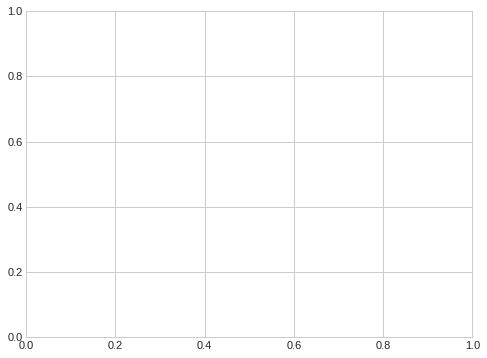

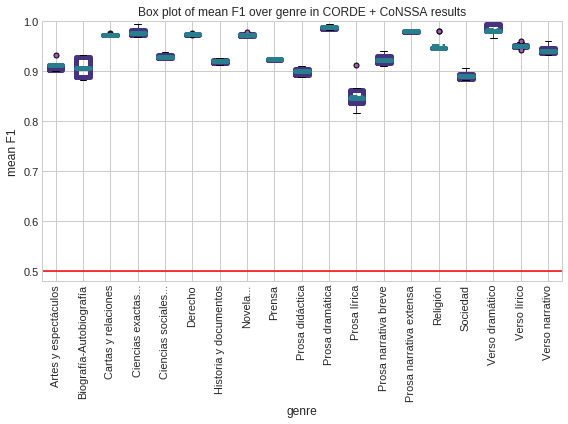

In [115]:
describe_data.boxplots(results.groupby(["genre"]).head(10), "mean F1", "genre", wdir, "CORDE + CoNSSA results", rotation = 90, figsize=(8,6), baseline=0.5, ylim=(0.48,1))

In [105]:
results.groupby("genre").head(10).groupby("genre").median().sort_values(by="mean F1")

,mean F1,std F1,baseline,difference,MFW,typography,test_result_pvalue,sample_size
genre,,,,,,,,
Prosa lírica,0.846667,0.163299,0.5,0.346667,3000,True,1.031390e-04,26
Sociedad,0.890286,0.054787,0.5,0.390286,6000,True,5.255110e-09,212
Prosa didáctica,0.899568,0.042325,0.5,0.399568,3500,True,4.120305e-10,470
Biografía-Autobiografía,0.906667,0.152753,0.5,0.406667,55,True,2.558824e-05,24
Artes y espectáculos,0.913333,0.136789,0.5,0.413333,6000,True,8.049000e-06,28
Historia y documentos,0.920805,0.059194,0.5,0.420805,4500,True,5.197669e-09,206
Prosa narrativa breve,0.922011,0.037708,0.5,0.422011,5500,True,9.534275e-11,466
Prensa,0.924111,0.011532,0.5,0.424111,4000,True,2.145164e-15,4620
Ciencias sociales...,0.929290,0.028465,0.5,0.429290,4000,True,6.453259e-12,678


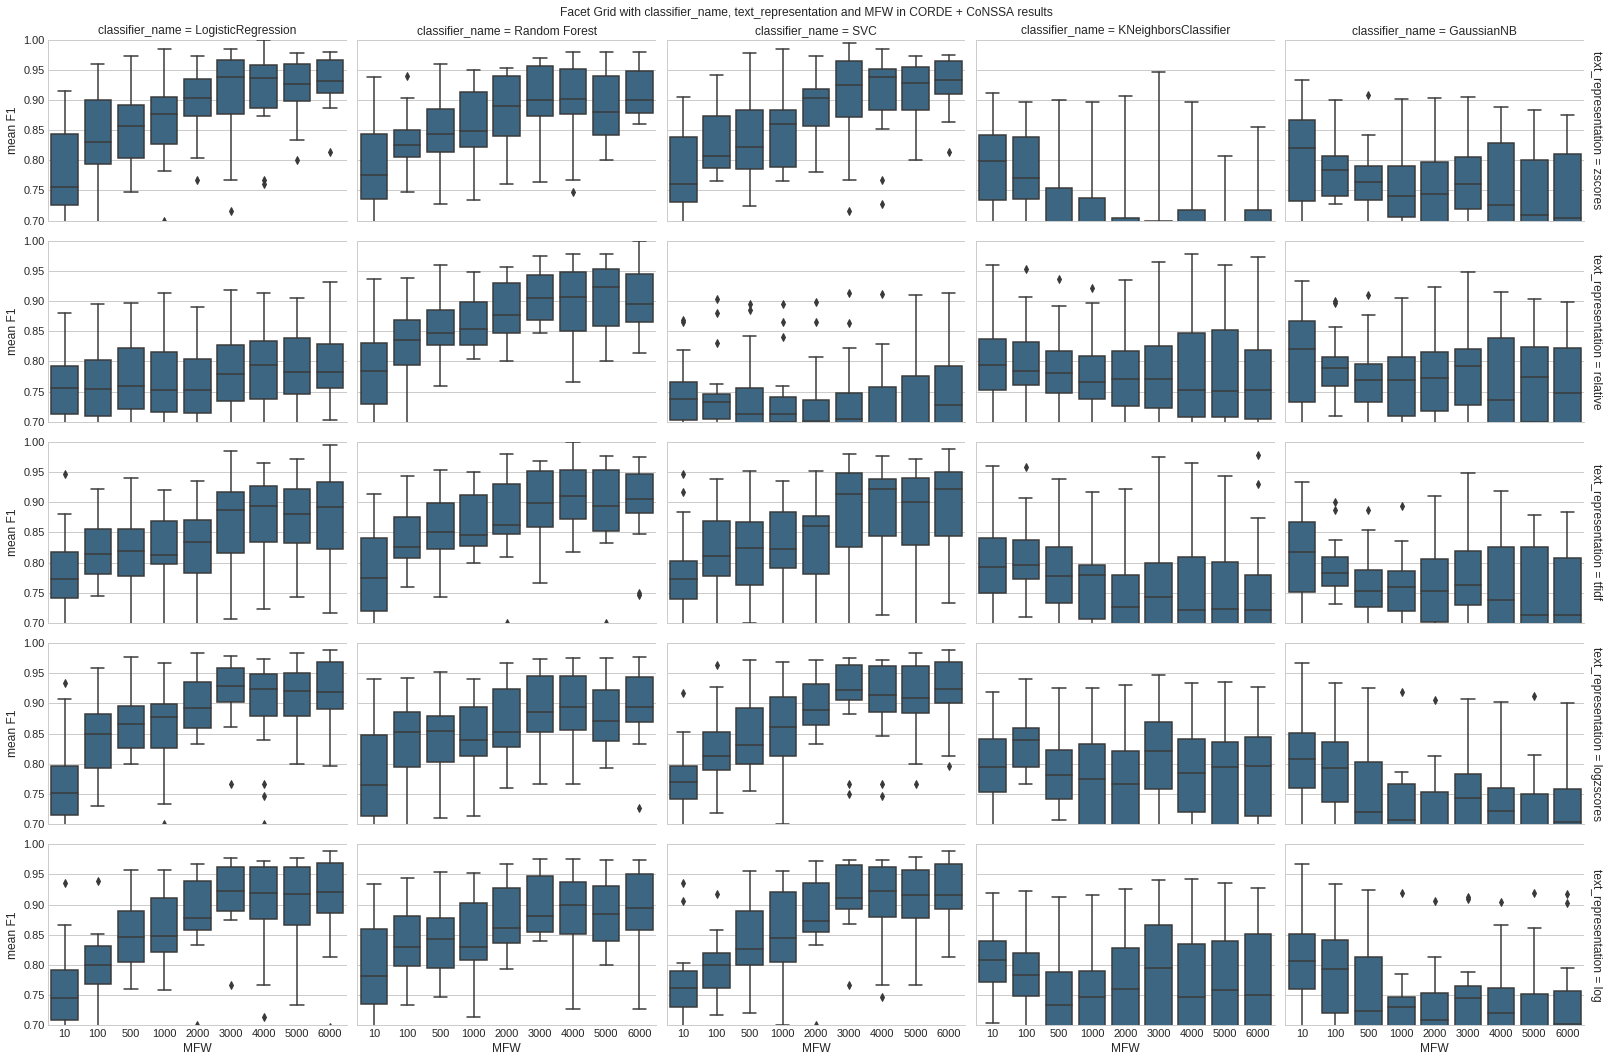

In [129]:
describe_data.facetGrid(results, "mean F1", "classifier_name", "text_representation", "MFW", wdir, "CORDE + CoNSSA results", ylim = 0.7, type_=sns.boxplot)

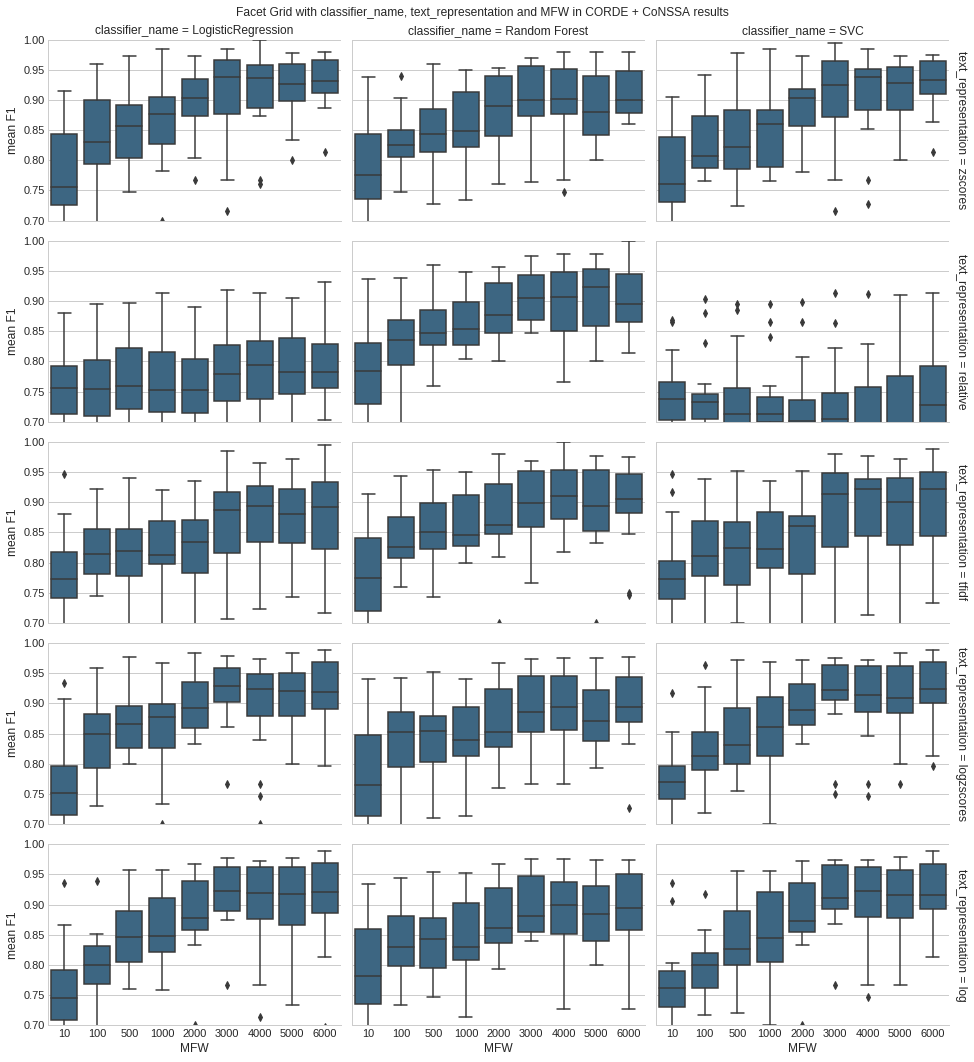

In [130]:
import seaborn as sns

describe_data.facetGrid(results.loc[results["classifier_name"].isin(["LogisticRegression", "Random Forest", "SVC"])], "mean F1", "classifier_name", "text_representation", "MFW", wdir, "CORDE + CoNSSA results", ylim = 0.7, type_=sns.boxplot)


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


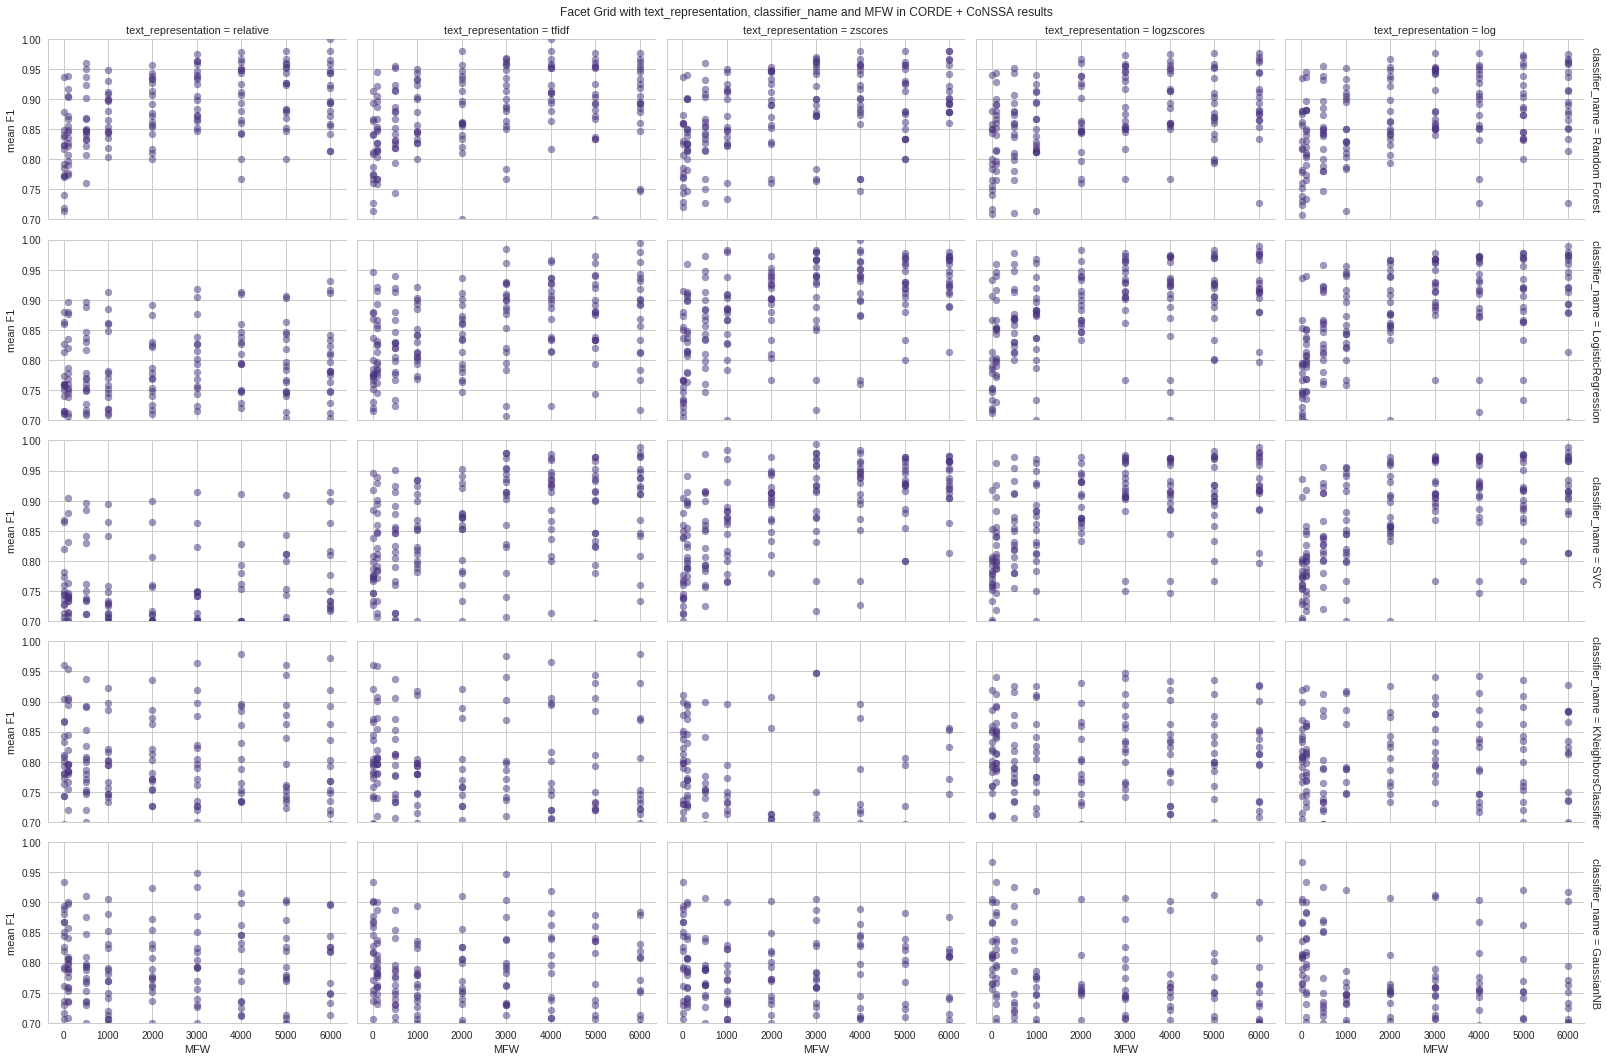

In [46]:
describe_data.facetGrid(results, "mean F1", "text_representation", "classifier_name", "MFW", wdir, "CORDE + CoNSSA results", ylim = 0.7)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


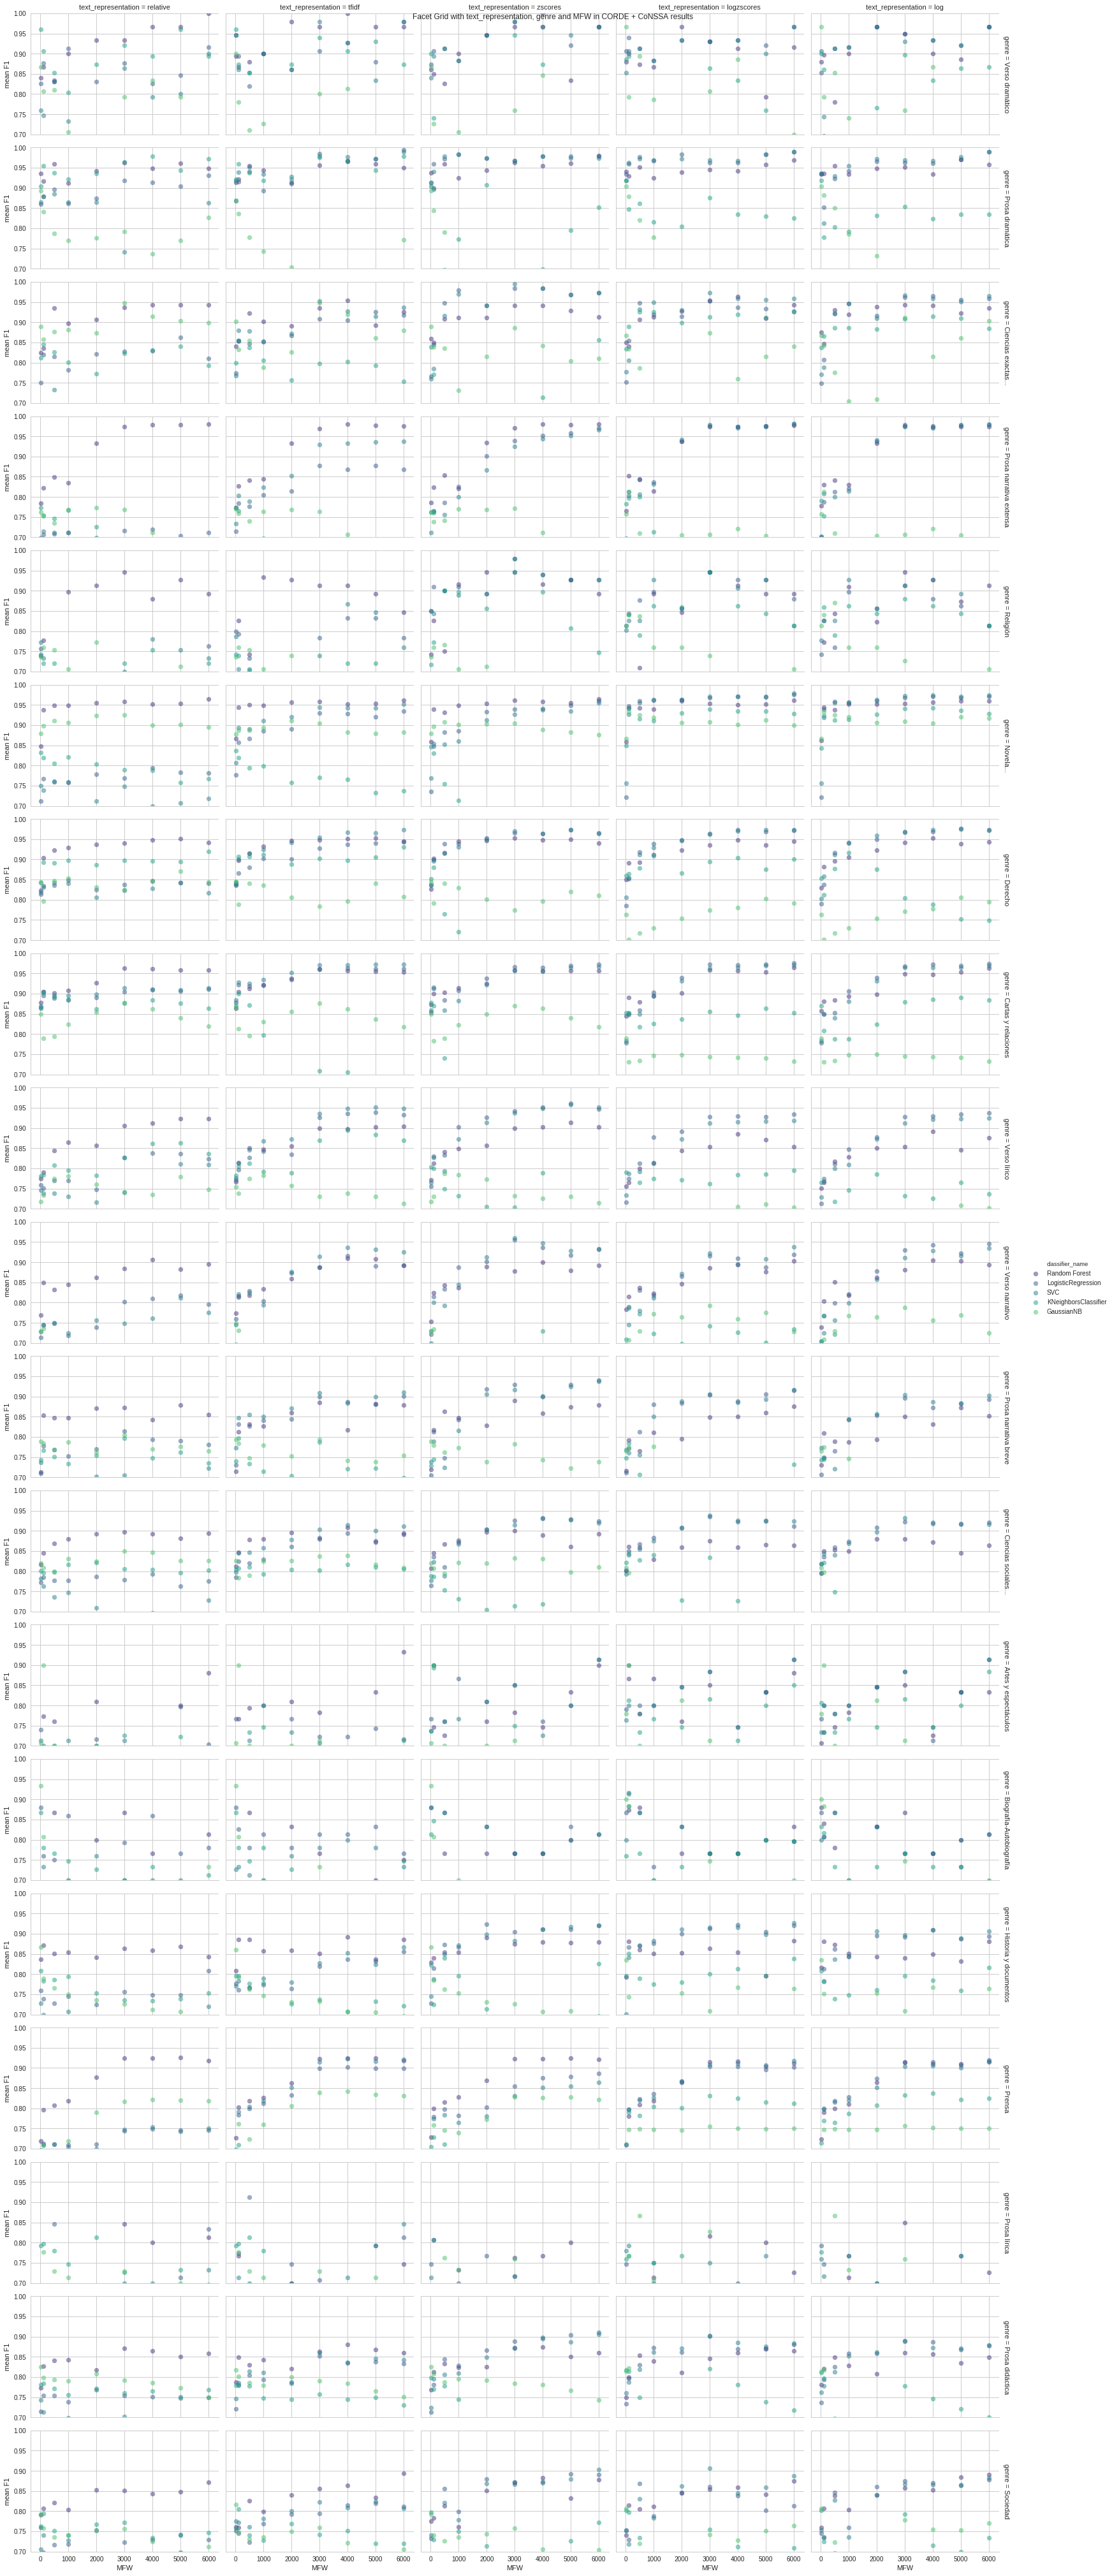

In [47]:
describe_data.facetGrid(results, "mean F1", "text_representation", "genre", "MFW", wdir, "CORDE + CoNSSA results", "classifier_name", ylim = 0.7)

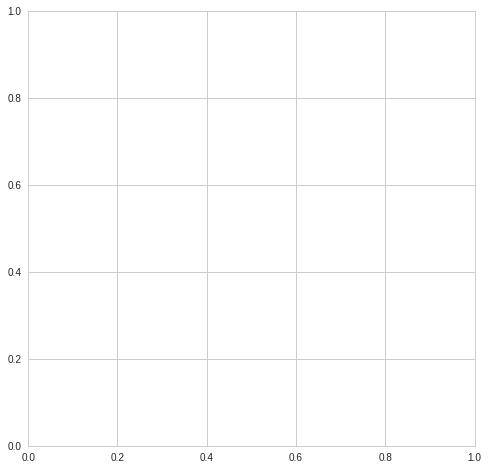

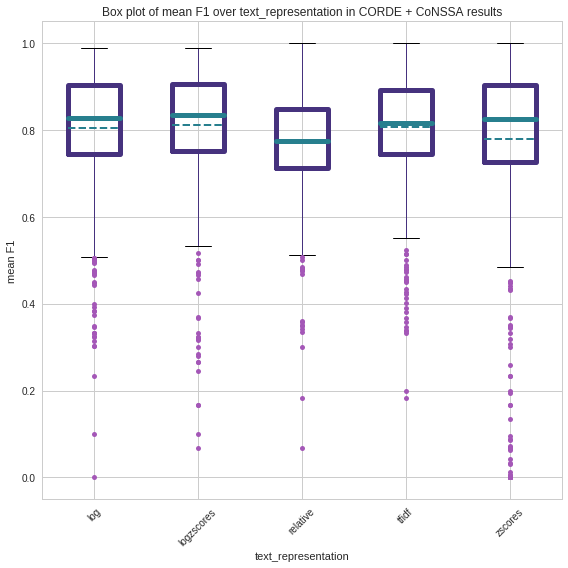

In [36]:
describe_data.boxplots(results, "mean F1", "text_representation", wdir, "CORDE + CoNSSA results", figsize=(6,6))

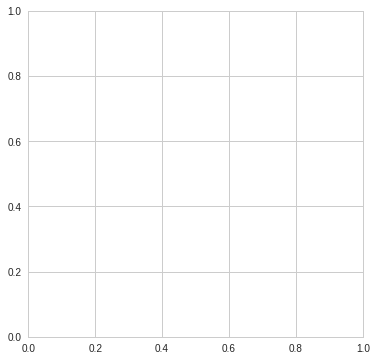

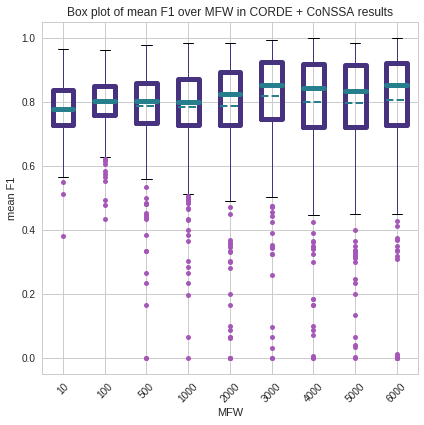

In [37]:
describe_data.boxplots(results, "mean F1", "MFW", wdir, "CORDE + CoNSSA results", figsize=(6,6))

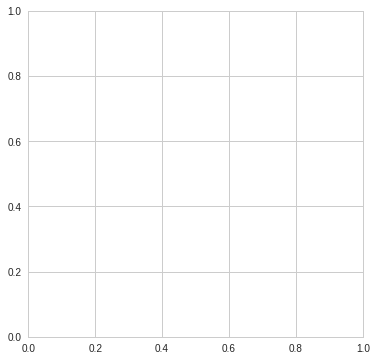

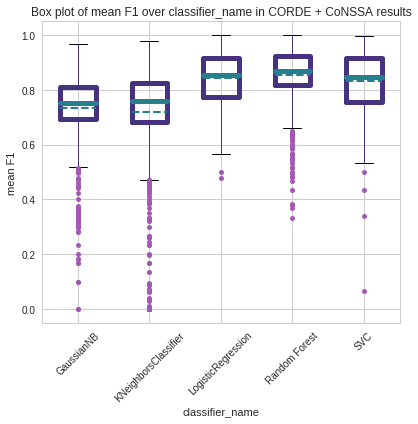

In [38]:
describe_data.boxplots(results, "mean F1", "classifier_name", wdir, "CORDE + CoNSSA results", figsize=(6,6))

# 3.3.4. Binary Class Evaluation of Parameters

In [59]:
MFFs = [6000,5000,4000,3000,2000,1000,500,100,10]

for MFF in MFFs:
    results = classify.classify(wdir = wdir, freq_table  = eval_corpora, metadata = eval_metadata_tema,
                      classes = ["model_tema"], verbose = True,
                      methods = ["SVC","RF","LR",],#["SVC","KNN","RF","LR","GN"],
                      max_MFFs = [MFF],#[10,100,500,1000,2000,3000,4000,5000,6000],
                      text_representations = ["tfidf","log", "zscores","logzscores"],#,[,"raw","tfidf","zscores","logzscores"],#"relative"
                      typographies = [True], sampling_mode = "cross", make_relative = False, scoring="f1_macro", under_sample_method = "None")

    results.to_csv(wdir + "evaluation_CORDE-CoNSSA/results_evaluation_multiclass_" + str(MFF) + ".csv", sep="\t")

(6800, 6000)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (6800,) 
 Data shape (6800, 6000)
undersampling None
after undersampling, labels and data good (6800,) (6800, 6000) None
typography  True
textual representation:  tfidf
[]
(6800, 6000)
MFW 6000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.45 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.399778435087883, pvalue=5.975265921969471e-06)
5.975265921969471e-06
Class: 	 model_tema
Scores: 	 [0.3855925  0.43585176 0.46053393 0.51120237 0.43319711 0.44994172
 0.45624754 0.48657278 0.50676082 0.42371028]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.46 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.114465293611799, pvalue=1.9756264248848228e-05)
1.9756264248848228e-05
Class: 	 model_tema
Scores: 	 [0.37149207 0.50687902 0.43750069 0.51799371 0.45020933 0.44099189
 0.51599772 0.48511625 0.44552701 0.42390118]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.37 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.361670054462204, pvalue=0.04248495189007718)
0.04248495189007718
Class: 	 model_tema
Scores: 	 [0.33056442 0.33718422 0.34399817 0.3991262  0.35899009 0.32680067
 0.40489538 0.3826514  0.44121058 0.35350563]
Baseline: 		 0.3397058823529412


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(6800, 6000)
MFW 6000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.57 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.765493102671496, pvalue=2.57460936150732e-08)
2.57460936150732e-08
Class: 	 model_tema
Scores: 	 [0.48199357 0.58796443 0.56119295 0.59956043 0.56343436 0.57134866
 0.62406376 0.58255145 0.56516568 0.51921769]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.43 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.112624065113833, pvalue=1.9792227072041183e-05)
1.9792227072041183e-05
Class: 	 model_tema
Scores: 	 [0.36467303 0.43412075 0.42236834 0.46595509 0.47227718 0.42716006
 0.45716162 0.43395853 0.46391436 0.38077136]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.55 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.31305282073112, pvalue=1.2701526639033209e-06)
1.2701526639033209e-06
Class: 	 model_tema
Scores: 	 [0.41185724 0.56632214 0.58556484 0.62954093 0.53427438 0.53797027
 0.57106476 0.58147083 0.55602128 0.50768171]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 6000)
MFW 6000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.50 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.347790830603564, pvalue=1.237618375554295e-06)
1.237618375554295e-06
Class: 	 model_tema
Scores: 	 [0.43103853 0.51761605 0.48319704 0.54217561 0.54947146 0.50974553
 0.51035883 0.47816014 0.55704563 0.43150024]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.46 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.36903180676879, pvalue=1.541116813692127e-05)
1.541116813692127e-05
Class: 	 model_tema
Scores: 	 [0.37667766 0.52413076 0.41697721 0.53032116 0.46649261 0.44501763
 0.47119047 0.47172096 0.48606202 0.43859312]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.47 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.392936805088988, pvalue=3.0059256066141255e-07)
3.0059256066141255e-07
Class: 	 model_tema
Scores: 	 [0.39625836 0.46514827 0.47151842 0.47500245 0.48964045 0.47487702
 0.48377139 0.46999825 0.49316749 0.43122091]
Baseline: 		 0.3397058823529412


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
(6800, 6000)
MFW 6000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.56 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.275235402997847, pvalue=5.543043863724856e-08)
5.543043863724856e-08
Class: 	 model_tema
Scores: 	 [0.47851998 0.59412349 0.56133007 0.57029685 0.57967208 0.5726049
 0.6364416  0.57785914 0.55100856 0.51107287]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.42 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.519788462639967, pvalue=0.000108917869296457)
0.000108917869296457
Class: 	 model_tema
Scores: 	 [0.36437525 0.3818379  0.45262302 0.47348713 0.40585059 0.41175827
 0.46854003 0.45199904 0.39658256 0.3902253 ]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.48 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.950518706875105, pvalue=3.7290128295563944e-06)
3.7290128295563944e-06
Class: 	 model_tema
Scores: 	 [0.38768437 0.48889929 0.48810465 0.51596474 0.50771333 0.50138471
 0.5493166  0.50995766 0.47044963 0.4304388 ]
Baseline: 		 0.3397058823529412
done!
(6800, 2000)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had mo

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.901047403548162, pvalue=2.4445615622325545e-05)
2.4445615622325545e-05
Class: 	 model_tema
Scores: 	 [0.38155664 0.41403641 0.44932599 0.50162409 0.41147993 0.44110718
 0.45011859 0.45597282 0.49761246 0.3954303 ]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.46 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.516476072949603, pvalue=1.3382668546815254e-05)
1.3382668546815254e-05
Class: 	 model_tema
Scores: 	 [0.37227152 0.49102058 0.43004793 0.48129528 0.49091322 0.48253438
 0.53666155 0.41925311 0.45845735 0.48362301]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.34 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.3550198099513059, pvalue=0.7307522342869681)
0.7307522342869681
Class: 	 model_tema
Scores: 	 [0.3114972  0.29394231 0.32749174 0.3816087  0.33077657 0.31368325
 0.39590453 0.37020881 0.41503946 0.30470245]
Baseline: 		 0.3397058823529412
textual representation:  log
[]
(6800, 2000)
MFW 2000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.55 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.740908082516857, pvalue=1.9677556206026516e-06)
1.9677556206026516e-06
Class: 	 model_tema
Scores: 	 [0.41091455 0.60103548 0.58008469 0.56965125 0.54240737 0.56276364
 0.61651575 0.61216004 0.53978101 0.4903453 ]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.43 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.458484025401188, pvalue=3.85749807969187e-05)
3.85749807969187e-05
Class: 	 model_tema
Scores: 	 [0.3817008  0.42131981 0.4212264  0.4898961  0.42026349 0.43589063
 0.48721325 0.43624343 0.4126834  0.37612926]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.54 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.455040226941911, pvalue=2.467676599813324e-06)
2.467676599813324e-06
Class: 	 model_tema
Scores: 	 [0.38806938 0.55346479 0.58241385 0.56567101 0.50391954 0.58194301
 0.54806116 0.55694739 0.58434069 0.50702411]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 2000)
MFW 2000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro: 0.52 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.622797382791427, pvalue=4.998160836908322e-07)
4.998160836908322e-07
Class: 	 model_tema
Scores: 	 [0.43737278 0.50760106 0.54897382 0.54056822 0.51528866 0.53719982
 0.52251722 0.52489518 0.58717965 0.45089424]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.45 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.282155132340208, pvalue=1.6763071031784586e-05)
1.6763071031784586e-05
Class: 	 model_tema
Scores: 	 [0.375805   0.47623802 0.44072    0.52477124 0.41689532 0.49315712
 0.47685606 0.44272831 0.46766844 0.41706597]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.47 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.223288457109257, pvalue=6.5798132393146e-07)
6.5798132393146e-07
Class: 	 model_tema
Scores: 	 [0.4047139  0.43133564 0.50004691 0.50267637 0.48028043 0.47488255
 0.47009931 0.49278409 0.49175324 0.43595424]
Baseline: 		 0.3397058823529412
textual representation:  logzscores
[]
(6800, 2000)
MFW 2000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.56 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.73476894674912, pvalue=9.312562524409758e-07)
9.312562524409758e-07
Class: 	 model_tema
Scores: 	 [0.42858921 0.59485593 0.58876964 0.61056667 0.54853277 0.5608338
 0.6108265  0.61512894 0.52614665 0.50779007]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.45 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.153327115450368, pvalue=1.9013707440798527e-05)
1.9013707440798527e-05
Class: 	 model_tema
Scores: 	 [0.36061547 0.43032769 0.43279565 0.53101299 0.47987016 0.46237855
 0.45467958 0.46408846 0.4773895  0.43617102]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.47 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.738517448444872, pvalue=2.8836823378557673e-05)
2.8836823378557673e-05
Class: 	 model_tema
Scores: 	 [0.36222443 0.4741874  0.48115045 0.50515336 0.45980014 0.52109643
 0.51390012 0.54896269 0.43229737 0.43125089]
Baseline: 		 0.3397058823529412
done!
(6800, 1000)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had mo

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.41 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.025191418538224, pvalue=0.00019634704029805966)
0.00019634704029805966
Class: 	 model_tema
Scores: 	 [0.35073621 0.37739792 0.4012094  0.46306521 0.38996213 0.41682508
 0.42232117 0.43349858 0.4639181  0.38231721]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.117503870131454, pvalue=7.677507362823637e-06)
7.677507362823637e-06
Class: 	 model_tema
Scores: 	 [0.39762403 0.44042671 0.46706085 0.46108333 0.44927732 0.42879658
 0.48862481 0.42604049 0.49315865 0.38320542]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.32 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.738846680910167, pvalue=0.11606136320319851)
0.11606136320319851
Class: 	 model_tema
Scores: 	 [0.28433732 0.25946768 0.31468281 0.35933874 0.3126632  0.30450341
 0.36254655 0.33489395 0.36728744 0.30149941]
Baseline: 		 0.3397058823529412
textual representation:  log
[]
(6800, 1000)
MFW 1000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.52 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.237121832656335, pvalue=6.898456103543566e-06)
6.898456103543566e-06
Class: 	 model_tema
Scores: 	 [0.39548489 0.5749543  0.47267983 0.57316625 0.5203898  0.5563711
 0.56786522 0.55754393 0.48264442 0.46435537]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.42 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.145573569422201, pvalue=0.00016962468047436344)
0.00016962468047436344
Class: 	 model_tema
Scores: 	 [0.33290636 0.44124905 0.42589062 0.44291879 0.42789328 0.41715307
 0.4672375  0.40942879 0.42338521 0.36652873]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.48 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.85807456873325, pvalue=2.5530507043120463e-05)
2.5530507043120463e-05
Class: 	 model_tema
Scores: 	 [0.34098902 0.53764085 0.48231063 0.52213969 0.50751018 0.52372157
 0.47740553 0.4589502  0.47658759 0.45717678]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 1000)
MFW 1000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro: 0.48 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.085944215328285, pvalue=1.5076144371424863e-06)
1.5076144371424863e-06
Class: 	 model_tema
Scores: 	 [0.43222453 0.4672732  0.51320666 0.50417806 0.49200835 0.48406862
 0.51938258 0.47252075 0.54136246 0.40573495]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.42 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.404729551963215, pvalue=4.082898886637966e-05)
4.082898886637966e-05
Class: 	 model_tema
Scores: 	 [0.33667723 0.41134054 0.42465157 0.45565774 0.45380742 0.43963191
 0.44548351 0.4136439  0.43754477 0.4018632 ]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.46 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.385316820894445, pvalue=1.5171334136433551e-05)
1.5171334136433551e-05
Class: 	 model_tema
Scores: 	 [0.39007567 0.42067001 0.44960469 0.52388666 0.44856668 0.50158154
 0.49134048 0.48667867 0.50626066 0.4052088 ]
Baseline: 		 0.3397058823529412
textual representation:  logzscores
[]
(6800, 1000)
MFW 1000
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.53 (+/- 0.14)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.63435444635209, pvalue=1.1971497513570796e-05)
1.1971497513570796e-05
Class: 	 model_tema
Scores: 	 [0.37581369 0.58345203 0.51196456 0.61633382 0.51577231 0.58210351
 0.58080594 0.59114396 0.49850822 0.49131733]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.43 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.624182661706012, pvalue=0.00032409613638787713)
0.00032409613638787713
Class: 	 model_tema
Scores: 	 [0.35317324 0.41231855 0.44340426 0.44377952 0.41083866 0.47216652
 0.52591166 0.47510122 0.41756406 0.36558017]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.45 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.513982725994237, pvalue=0.00010965443147529739)
0.00010965443147529739
Class: 	 model_tema
Scores: 	 [0.32530448 0.5156951  0.44970886 0.450811   0.46478459 0.50526357
 0.50791789 0.47343705 0.43863739 0.41620348]
Baseline: 		 0.3397058823529412
done!
(6800, 500)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had mor

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.38 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.6469430828186926, pvalue=0.00534286533014598)
0.00534286533014598
Class: 	 model_tema
Scores: 	 [0.33935418 0.35803313 0.37028198 0.45090178 0.34352685 0.3705937
 0.41057212 0.3967719  0.43972817 0.36419698]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.778087332129928, pvalue=8.10328976567049e-05)
8.10328976567049e-05
Class: 	 model_tema
Scores: 	 [0.36279637 0.44473713 0.40541294 0.49692615 0.41308905 0.47763867
 0.50300688 0.4101728  0.44410865 0.40755085]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.30 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.8626042387183355, pvalue=0.0038317941070214172)
0.0038317941070214172
Class: 	 model_tema
Scores: 	 [0.28216856 0.24627331 0.29358809 0.3288165  0.3023609  0.28501958
 0.34208769 0.31919656 0.34016436 0.29334094]
Baseline: 		 0.3397058823529412
textual representation:  log
[]
(6800, 500)
MFW 500
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.48 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.012689694202776, pvalue=6.236815556079208e-05)
6.236815556079208e-05
Class: 	 model_tema
Scores: 	 [0.37860953 0.51425052 0.44761164 0.51295493 0.47902628 0.60368225
 0.49889458 0.52429729 0.45746685 0.40569156]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.41 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.654661629709801, pvalue=3.143522877357189e-05)
3.143522877357189e-05
Class: 	 model_tema
Scores: 	 [0.35155348 0.4123198  0.39293019 0.43462971 0.40888934 0.41962428
 0.4409841  0.41680723 0.44044014 0.37638942]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.9440139350829, pvalue=8.98495617603688e-06)
8.98495617603688e-06
Class: 	 model_tema
Scores: 	 [0.3878919  0.46918541 0.40522533 0.49628733 0.46132384 0.45164716
 0.47779797 0.41944381 0.46735568 0.40427026]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 500)
MFW 500
method used:	 SVC
cross validation sampling
f1_macro: 0.46 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.005860252917623, pvalue=2.200568838840748e-05)
2.200568838840748e-05
Class: 	 model_tema
Scores: 	 [0.38433898 0.47725541 0.4983333  0.52343694 0.45492817 0.50989708
 0.47536266 0.40564037 0.50368738 0.40761869]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.060692877640559, pvalue=0.0006804005801372946)
0.0006804005801372946
Class: 	 model_tema
Scores: 	 [0.34550045 0.37938269 0.39877107 0.49746661 0.44443142 0.45516583
 0.45264205 0.54729838 0.4522943  0.38548426]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.47 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.081707931865346, pvalue=2.0406939292768474e-05)
2.0406939292768474e-05
Class: 	 model_tema
Scores: 	 [0.40985916 0.46146803 0.42614837 0.51637718 0.447334   0.53190562
 0.51217397 0.44913582 0.51155195 0.39227316]
Baseline: 		 0.3397058823529412
textual representation:  logzscores
[]
(6800, 500)
MFW 500
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.49 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.119797581774108, pvalue=5.545765984763867e-05)
5.545765984763867e-05
Class: 	 model_tema
Scores: 	 [0.37675401 0.54286982 0.45508687 0.52898226 0.50673817 0.60783654
 0.51107655 0.54198599 0.45674226 0.41397585]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.42 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.363725264779849, pvalue=0.00045408705499303133)
0.00045408705499303133
Class: 	 model_tema
Scores: 	 [0.33986493 0.41199222 0.39293952 0.49189888 0.46809255 0.43586598
 0.44060902 0.40614101 0.40691569 0.36787529]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.44 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.508748015229164, pvalue=1.3481374034532742e-05)
1.3481374034532742e-05
Class: 	 model_tema
Scores: 	 [0.37358333 0.43174253 0.41193924 0.49112313 0.45518198 0.4626281
 0.49667894 0.43191504 0.43610875 0.41352315]
Baseline: 		 0.3397058823529412
done!
(6800, 100)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had more

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.23 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.06695480147104, pvalue=3.3848106133650153e-06)
3.3848106133650153e-06
Class: 	 model_tema
Scores: 	 [0.21111512 0.17343678 0.19546759 0.26157032 0.24702728 0.23906672
 0.24754154 0.26301445 0.27727156 0.20618574]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.36 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.004418265941459, pvalue=0.07600935720685417)
0.07600935720685417
Class: 	 model_tema
Scores: 	 [0.33026711 0.32025196 0.34444263 0.3983026  0.33606975 0.35364792
 0.42899549 0.38051939 0.40146861 0.33613817]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.21 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-15.417816890742788, pvalue=8.88429509029133e-08)
8.88429509029133e-08
Class: 	 model_tema
Scores: 	 [0.19283518 0.15967889 0.19171891 0.24991528 0.18480268 0.21375377
 0.21310475 0.22112715 0.24079821 0.21734872]
Baseline: 		 0.3397058823529412
textual representation:  log
[]
(6800, 100)
MFW 100
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.36 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.4854085076826746, pvalue=0.17159756957844685)
0.17159756957844685
Class: 	 model_tema
Scores: 	 [0.28372002 0.36449459 0.29579763 0.38966868 0.36990416 0.36083402
 0.43144622 0.37719822 0.37870934 0.34838309]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.33 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8002807727615324, pvalue=0.44415846142394333)
0.44415846142394333
Class: 	 model_tema
Scores: 	 [0.28100012 0.33315215 0.3178933  0.35751362 0.31219534 0.39308978
 0.37509586 0.30783456 0.31400956 0.31880752]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.37 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.1331650918002225, pvalue=0.061703195039437414)
0.061703195039437414
Class: 	 model_tema
Scores: 	 [0.29281207 0.35372517 0.35088134 0.36692913 0.37992302 0.403256
 0.46004936 0.37705771 0.38268571 0.32944381]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 100)
MFW 100
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.36 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.823469575563248, pvalue=0.019933773186496823)
0.019933773186496823
Class: 	 model_tema
Scores: 	 [0.34749626 0.33540705 0.33412722 0.38904472 0.35290668 0.39320857
 0.41900423 0.36265982 0.3614883  0.34830034]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.35 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.8343856370142992, pvalue=0.425655757558445)
0.425655757558445
Class: 	 model_tema
Scores: 	 [0.30300824 0.33653773 0.28568561 0.40139953 0.30076241 0.38417346
 0.41285894 0.34156618 0.39976532 0.35327702]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.33 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8294249061516857, pvalue=0.42831389260102937)
0.42831389260102937
Class: 	 model_tema
Scores: 	 [0.28409396 0.25176266 0.28904882 0.34964812 0.29088525 0.38377525
 0.377089   0.35685916 0.37572111 0.31483095]
Baseline: 		 0.3397058823529412
textual representation:  logzscores
[]
(6800, 100)
MFW 100
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.38 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.510874856534457, pvalue=0.03326297336215605)
0.03326297336215605
Class: 	 model_tema
Scores: 	 [0.29769443 0.37253801 0.32842675 0.43862125 0.35203855 0.38880454
 0.44902432 0.38137637 0.39599586 0.35860167]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.34 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.21363885527614399, pvalue=0.8355900014892673)
0.8355900014892673
Class: 	 model_tema
Scores: 	 [0.31914963 0.31583467 0.29912363 0.386704   0.33289636 0.32511814
 0.39341057 0.31562515 0.35260951 0.33556931]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.35 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6714672589684858, pvalue=0.5187841960070444)
0.5187841960070444
Class: 	 model_tema
Scores: 	 [0.29214345 0.3142674  0.36112045 0.34799106 0.35137014 0.37093493
 0.44535242 0.33512843 0.32672056 0.33912095]
Baseline: 		 0.3397058823529412
done!
(6800, 10)
(6800, 1)


analysed class:	 model_tema
* Culling data
labels done
Counter({'Prensa': 2310, 'Cartas y relaciones': 1384, 'Novela y otras formas similares': 483, 'Prosa narrativa extensa': 461, 'Verso lírico': 382, 'Ciencias sociales y humanidades': 339, 'Derecho': 308, 'Prosa didáctica': 235, 'Prosa narrativa breve': 233, 'Verso narrativo': 190, 'Sociedad': 106, 'Historia y documentos': 103, 'Ciencias exactas, físicas, naturales y aplicadas': 91, 'Prosa dramática': 88, 'Religión': 20, 'Verso dramático': 17, 'Artes y espectáculos': 14, 'Prosa lírica': 13, 'Biografía-Autobiografía': 12, '?': 11})
All your class values had more than 1

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.08 (+/- 0.01)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-135.34679094767674, pvalue=3.3340069575499e-16)
3.3340069575499e-16
Class: 	 model_tema
Scores: 	 [0.08014487 0.07705363 0.0701503  0.06916325 0.0865577  0.07579303
 0.08314701 0.07498756 0.08253621 0.08564126]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.25 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-8.53258155978285, pvalue=1.3179505826213743e-05)
1.3179505826213743e-05
Class: 	 model_tema
Scores: 	 [0.212134   0.21306948 0.21121782 0.25468679 0.27144159 0.26315962
 0.31178676 0.27836822 0.2541795  0.23334539]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.08 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-101.16221237579066, pvalue=4.572399586672828e-15)
4.572399586672828e-15
Class: 	 model_tema
Scores: 	 [0.07371292 0.07203898 0.06748953 0.09753275 0.08035688 0.08353386
 0.07441733 0.07686781 0.07622167 0.07956859]
Baseline: 		 0.3397058823529412
textual representation:  log
[]
(6800, 10)
MFW 10
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.09 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-45.36748807531285, pvalue=6.143502922127612e-12)
6.143502922127612e-12
Class: 	 model_tema
Scores: 	 [0.0772957  0.07614646 0.06793786 0.08694578 0.09168622 0.09851673
 0.12501999 0.10243164 0.10931537 0.08350509]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.24 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.999711775521321, pvalue=1.610288258468347e-06)
1.610288258468347e-06
Class: 	 model_tema
Scores: 	 [0.19055959 0.2075259  0.23982119 0.27812849 0.24212934 0.23211632
 0.2631425  0.25920971 0.26351248 0.20479081]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.08 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-98.86221611603457, pvalue=5.6229275826419035e-15)
5.6229275826419035e-15
Class: 	 model_tema
Scores: 	 [0.06308403 0.08220862 0.07067251 0.07616155 0.07764317 0.08264693
 0.08837475 0.0646148  0.07967151 0.0674782 ]
Baseline: 		 0.3397058823529412
textual representation:  zscores
[]
(6800, 10)
MFW 10
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.07 (+/- 0.01)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-185.1543388631276, pvalue=1.9888380807086514e-17)
1.9888380807086514e-17
Class: 	 model_tema
Scores: 	 [0.0644619  0.06044831 0.07319113 0.07343868 0.07315012 0.06777961
 0.07097197 0.06483316 0.06403777 0.06525378]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.26 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.71212423405942, pvalue=8.732366369477419e-05)
8.732366369477419e-05
Class: 	 model_tema
Scores: 	 [0.19907501 0.21197871 0.20158434 0.26413883 0.30897682 0.27525563
 0.28532896 0.28619145 0.2829937  0.23494322]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.08 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-49.20649154726944, pvalue=2.9653596695505426e-12)
2.9653596695505426e-12
Class: 	 model_tema
Scores: 	 [0.0598933  0.06389604 0.06200941 0.10029229 0.0963885  0.08801953
 0.09078583 0.10510806 0.08682333 0.07642847]
Baseline: 		 0.3397058823529412
textual representation:  logzscores
[]
(6800, 10)
MFW 10
method used:	 SVC
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.09 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-43.12314388515862, pvalue=9.680526557252238e-12)
9.680526557252238e-12
Class: 	 model_tema
Scores: 	 [0.07684017 0.07619393 0.06787823 0.0869584  0.09317779 0.09374872
 0.12537891 0.10285671 0.11527233 0.08178404]
Baseline: 		 0.3397058823529412
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.25 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.299719516731995, pvalue=2.7969458188278754e-06)
2.7969458188278754e-06
Class: 	 model_tema
Scores: 	 [0.18525702 0.24042084 0.23717844 0.28548839 0.25796201 0.22421412
 0.25165235 0.26922388 0.27315954 0.24663977]
Baseline: 		 0.3397058823529412
method used:	 LR
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:113

f1_macro: 0.08 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-80.08330834820853, pvalue=3.736812162595901e-14)
3.736812162595901e-14
Class: 	 model_tema
Scores: 	 [0.06274562 0.08757653 0.06436755 0.0774531  0.08205676 0.08621671
 0.08944463 0.06476237 0.07969026 0.06788238]
Baseline: 		 0.3397058823529412
done!


In [116]:
results_list_multiclass = []
for doc in glob.glob(wdir+"evaluation_CORDE-CoNSSA_multiclass/*.csv"):
    print(doc)
    results_list_multiclass.append(pd.read_csv(doc, sep="\t", index_col=0))
results_multiclass = pd.concat(results_list_multiclass)

/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_4000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_5000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_2000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_100.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_6000.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_500.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_10.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap3_3/evaluation_CORDE-CoNSSA_multiclass/results_evaluation_multiclass_3000.csv
/home/jose/Dropbox/Doktorarb

In [117]:
results_multiclass = results_multiclass.sort_values(by="mean", ascending=False)

In [118]:
results_multiclass.shape

(108, 13)

In [119]:
results_multiclass.head(10).round(2)

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1_macro,test_result_pvalue,labels,sample_size
9,model_tema,0.57,0.04,0.34,0.23,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,5000,True,[0.47394316 0.59107897 0.56522952 0.56846412 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
3,model_tema,0.57,0.04,0.34,0.23,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,6000,True,[0.48199357 0.58796443 0.56119295 0.59956043 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
9,model_tema,0.56,0.04,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,4000,True,[0.47019345 0.60556362 0.5738639 0.58253201 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
9,model_tema,0.56,0.04,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,6000,True,[0.47851998 0.59412349 0.56133007 0.57029685 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
9,model_tema,0.56,0.06,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,3000,True,[0.42382996 0.60248202 0.5878431 0.58462 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
3,model_tema,0.56,0.05,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,3000,True,[0.43919295 0.6062066 0.5881463 0.58915331 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
3,model_tema,0.56,0.05,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,5000,True,[0.44777739 0.58706663 0.563364 0.56189924 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
9,model_tema,0.56,0.06,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,2000,True,[0.42858921 0.59485593 0.58876964 0.61056667 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
3,model_tema,0.56,0.05,0.34,0.22,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,4000,True,[0.43953244 0.59979972 0.56050028 0.56717718 0...,0.0,abacca Ciencias sociales y humanidades\...,6800
5,model_tema,0.55,0.06,0.34,0.21,"LogisticRegression(C=1.0, class_weight=None, d...",log,5000,True,[0.41041961 0.57530768 0.61879959 0.63644813 0...,0.0,abacca Ciencias sociales y humanidades\...,6800


In [120]:
results_multiclass.rename(columns={'mean': 'mean F1', 'std': 'std F1', "class" : "genre"}, inplace=True)

In [121]:
results_multiclass["classifier_name"] = results_multiclass["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)

<input>:1: DeprecationWarning: invalid escape sequence \(
<ipython-input-121-bf822f6c73ae>:1: DeprecationWarning: invalid escape sequence \(
  results_multiclass["classifier_name"] = results_multiclass["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)


In [122]:
results_multiclass.to_csv(wdir+"results_evaluation_multiclass.csv", sep="\t")

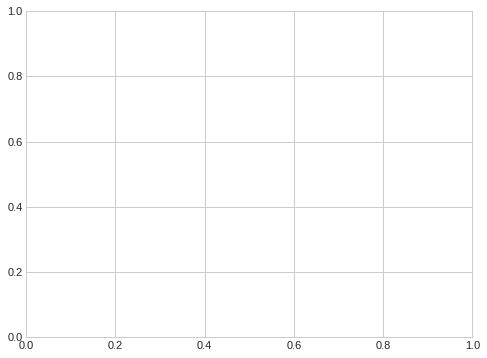

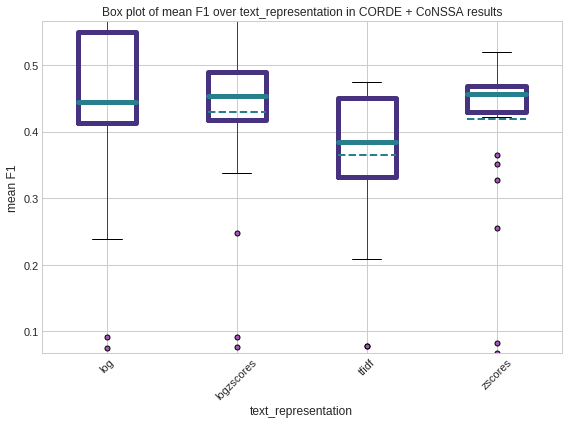

In [123]:
describe_data.boxplots(results_multiclass, "mean F1", "text_representation", wdir, "CORDE + CoNSSA results", figsize=(6,6))

In [124]:
results_multiclass.columns.tolist()

['genre',
 'mean F1',
 'std F1',
 'baseline',
 'difference',
 'classifier',
 'text_representation',
 'MFW',
 'typography',
 'f1_macro',
 'test_result_pvalue',
 'labels',
 'sample_size',
 'classifier_name']

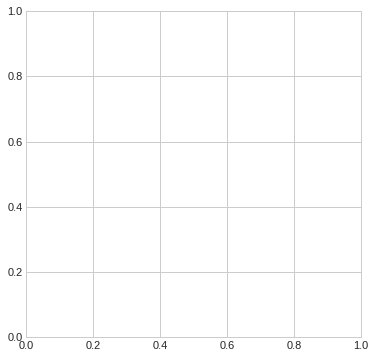

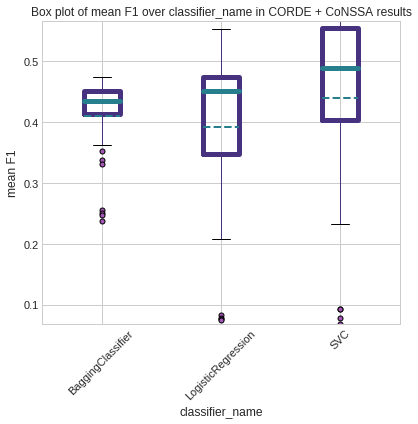

In [125]:
describe_data.boxplots(results_multiclass, "mean F1", "classifier_name", wdir, "CORDE + CoNSSA results", figsize=(6,6))

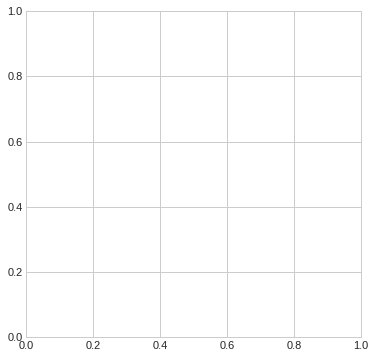

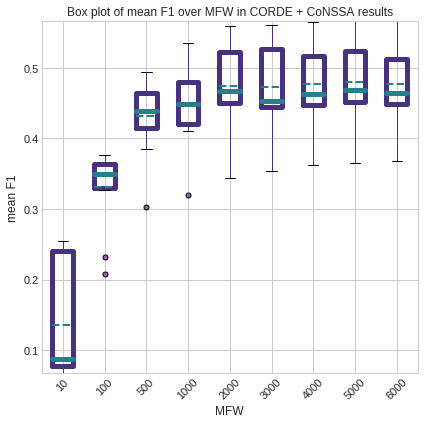

In [126]:
describe_data.boxplots(results_multiclass, "mean F1", "MFW", wdir, "CORDE + CoNSSA results", figsize=(6,6))

# 3.3.6. Binary Prediction of Genre of Disputed Texts

In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/MTB/investigacion/mytoolbox/"))
sys.path.append(os.path.abspath("/home/jose/"))
sys.path.append(os.path.abspath("/home/jose/cligs/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features
import pandas as pd
import numpy as np
import re

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/thesis/data/chap3_3/"

In [5]:
predict_corpora = pd.read_parquet(wdir + "predict_corpora.parquet")

In [6]:
predict_metadata = pd.read_csv(wdir + "predict_metadata.csv", sep="\t", index_col=0)

In [5]:
predict_corpora.head(3)

token,",",.,de,la,y,que,el,en,a,los,...,xxx,dela,aquesta,tambien,johan,leon,maguer,reyno,quisieren,ombre
abacca,0.077889,0.036802,0.056551,0.032335,0.026635,0.020796,0.020612,0.023894,0.014785,0.009765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.0
abadengo,0.076092,0.044245,0.053889,0.023092,0.019706,0.031108,0.025193,0.023103,0.013780,0.020124,...,0.000021,0.000043,0.000054,0.000054,0.000032,0.000139,0.000032,0.000043,0.000086,0.0
abajo,0.059850,0.089731,0.040125,0.025095,0.029431,0.019613,0.016356,0.014041,0.020961,0.013907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [6]:
predict_metadata.head(3)

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
abacca,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abadengo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
abajo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
predict_metadata.index.tolist() == predict_corpora.index.tolist()

True

In [8]:
predict_metadata.shape

(6814, 20)

In [9]:
best_results = pd.read_csv(wdir+"best_results_10-6000.csv", sep="\t", index_col=0)

In [10]:
best_results

,genre,mean F1,std F1,significance,text_representation,MFW,classifier_name,sample_size,baseline
427,Verso dramático,1.000000,0.000000,***,relative,6000,Random Forest,34,0.5
12,?,1.000000,0.000000,***,log,3000,Random Forest,22,0.5
283,Prosa dramática,0.994737,0.015789,***,tfidf,6000,LogisticRegression,176,0.5
115,"Ciencias exactas, físicas, naturales y aplicadas",0.994737,0.015789,***,zscores,3000,SVC,182,0.5
370,Prosa narrativa extensa,0.981113,0.016038,***,logzscores,6000,SVC,922,0.5
390,Religión,0.980000,0.060000,***,zscores,3000,SVC,40,0.5
220,Novela y otras formas similares,0.978856,0.012632,***,logzscores,6000,SVC,966,0.5
163,Derecho,0.977240,0.020537,***,log,5000,LogisticRegression,616,0.5
98,Cartas y relaciones,0.976433,0.008963,***,logzscores,6000,LogisticRegression,2768,0.5
468,Verso lírico,0.960527,0.020199,***,zscores,5000,LogisticRegression,764,0.5


In [11]:
results_evaluation = pd.read_csv(wdir+"results_CORDE-CoNSSA_10-6000.csv", sep="\t", index_col=0)

In [12]:
results_evaluation.shape

(4500, 15)

In [13]:
results_evaluation.head()

,genre,mean F1,std F1,baseline,difference,classifier,text_representation,MFW,typography,f1,test_result_pvalue,labels,sample_size,significance,classifier_name
427,Verso dramático,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,relative,6000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistolasub241 0\npastorde 1\ncasa...,34,***,Random Forest
432,Verso dramático,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,tfidf,4000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistosub417 0\npastorde 1\ncisn...,34,***,Random Forest
443,Verso dramático,1.000000,0.000000,0.5,0.500000,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,4000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,epistosub417 0\npastorde 1\ncisn...,34,***,LogisticRegression
12,?,1.000000,0.000000,0.5,0.500000,BaggingClassifier(base_estimator=DecisionTreeC...,log,3000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.000000e+00,tcazador 1\nperiodissub392 0\ncole...,22,***,Random Forest
283,Prosa dramática,0.994737,0.015789,0.5,0.494737,"LogisticRegression(C=1.0, class_weight=None, d...",tfidf,6000,True,[1. 1. 0.94736842 1. 1...,8.849351e-15,yerma 1\nmenajesub14 0\npre0...,176,***,LogisticRegression


In [14]:
set(results_evaluation["classifier_name"])

{'GaussianNB',
 'KNeighborsClassifier',
 'LogisticRegression',
 'Random Forest',
 'SVC'}

In [15]:
results_evaluation["classifier_name"] = results_evaluation["classifier_name"].map( {"GaussianNB": "GN", "LogisticRegression":"LR","Random Forest":"RF","SVC":"SVC",'KNeighborsClassifier':"KNN"})

In [16]:
set(results_evaluation["classifier_name"])

{'GN', 'KNN', 'LR', 'RF', 'SVC'}

In [17]:
results_evaluation.groupby("genre").head(1).shape

(20, 15)

In [18]:
results = pd.DataFrame(index= predict_metadata.loc[predict_metadata["Novela y otras formas similares"] == "?"].index.tolist(), columns = list(set(results_evaluation["genre"].tolist()))).fillna(0)
results.shape

(14, 20)

In [19]:
results.head()

,Historia y documentos,Prosa narrativa extensa,Ciencias sociales y humanidades,Religión,Prensa,Sociedad,?,Prosa narrativa breve,Artes y espectáculos,"Ciencias exactas, físicas, naturales y aplicadas",Prosa didáctica,Novela y otras formas similares,Cartas y relaciones,Verso narrativo,Derecho,Biografía-Autobiografía,Prosa lírica,Prosa dramática,Verso dramático,Verso lírico
ne0023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ne0037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ne0115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ne0127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ne0132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
results.mean(axis=1)

ne0023    0.0
ne0037    0.0
ne0115    0.0
ne0127    0.0
ne0132    0.0
ne0149    0.0
ne0172    0.0
ne0173    0.0
ne0177    0.0
ne0184    0.0
ne0217    0.0
ne0218    0.0
ne0291    0.0
ne0329    0.0
dtype: float64

In [ ]:
amount_best_results = 10
iterations = 10
seen_genres = []

genres = sorted(list(set(results_evaluation["genre"])))
if "?" in genres:
    genres.remove("?")
print(genres)

for genre in genres:
    metadata_predict_iterations_genre = []
    print(genre)
    for index, genre_df in results_evaluation.loc[results_evaluation["genre"] == genre].groupby("genre").head(amount_best_results).iterrows():
        print(genre_df["genre"], genre_df["classifier_name"], genre_df["text_representation"], genre_df["MFW"])
        metadata_predicted, results_genre, metadata_predict_iterations = classify.predict(wdir = wdir, entire_raw_features = predict_corpora, metadata = predict_metadata, class_ = genre_df["genre"], predict_class_values = ["?"], verbose = True, method = genre_df["classifier_name"], min_MFF = 0, max_MFF = int(genre_df["MFW"]), text_representation = genre_df["text_representation"], make_relative = False, iterations = iterations, do_scores=False)
        metadata_predict_iterations_genre.append(metadata_predict_iterations)
        
    concatenated_genre = pd.concat(metadata_predict_iterations_genre , axis=1)
    print("concatenated_genre sum \n", concatenated_genre.sum(axis=1))
    #print(results)

    results[genre] = concatenated_genre.sum(axis=1).tolist()

        

In [ ]:
results.to_csv(wdir+"results_prediction_binarized.csv",sep="\t")

In [23]:
results

,Verso dramático,?,Novela y otras formas similares,Derecho,Cartas y relaciones,Prosa narrativa breve,Biografía-Autobiografía,Prosa didáctica,Prensa,Artes y espectáculos,Prosa lírica,Ciencias sociales y humanidades,Religión,Verso lírico,Historia y documentos,Prosa narrativa extensa,Sociedad,Verso narrativo,Prosa dramática,"Ciencias exactas, físicas, naturales y aplicadas"
ne0023,0,0,0,0,0,0,0,30,0,10,0,40,0,0,10,0,0,0,10,0
ne0037,0,0,20,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,10,0
ne0115,0,0,80,0,0,0,70,0,0,30,0,0,0,0,40,10,0,0,10,0
ne0127,0,0,20,10,0,10,30,0,0,10,0,0,0,50,10,10,0,0,20,0
ne0132,0,0,20,0,0,0,70,0,0,30,0,0,0,0,30,0,0,0,20,0
ne0149,0,0,80,10,0,0,50,10,0,10,0,0,0,0,10,0,0,0,20,0
ne0172,0,0,20,0,0,10,20,0,0,30,0,10,0,0,10,10,20,0,20,0
ne0173,0,0,20,10,0,10,0,0,0,10,0,0,0,0,10,10,10,0,20,0
ne0177,0,0,10,0,0,10,30,100,0,30,0,0,0,0,10,0,0,0,10,0
ne0184,0,0,20,10,30,0,30,0,0,30,0,0,0,100,0,10,0,0,0,0


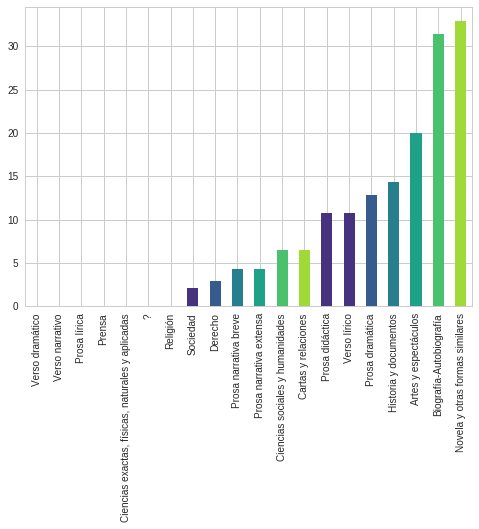

In [30]:
results.mean().sort_values().plot.bar()

In [27]:
results.mean(axis=1)

ne0023     5.00
ne0037     2.50
ne0115    12.00
ne0127     8.50
ne0132     8.50
ne0149     9.50
ne0172     7.50
ne0173     5.00
ne0177    10.00
ne0184    11.50
ne0217     5.55
ne0218    11.00
ne0291     5.50
ne0329     9.50
dtype: float64

# 3.3.7. Multi-Class Prediction of Genre of Disputed Texts

In [21]:
predict_metadata_multiclass = predict_metadata.copy()

predict_metadata_multiclass["genre"] = "?"

for column in predict_metadata_multiclass.columns.tolist():
    predict_metadata_multiclass.loc[predict_metadata_multiclass[column] == "1", "genre"] = column
    
predict_metadata_multiclass

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,...,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo,genre
abacca,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ciencias sociales y humanidades
abadengo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Prosa didáctica
abajo,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
abelcain,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
abrojos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Verso lírico
acan,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Derecho
actfinan,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ciencias sociales y humanidades
adelan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
adriano,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
adrimar,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares


In [22]:
predict_metadata_multiclass.index.tolist() == predict_corpora.index.tolist()

True

In [23]:
results_evaluation_multiclass = pd.read_csv(wdir+ "results_evaluation_multiclass.csv", sep="\t", index_col=0)
results_evaluation_multiclass.shape
results_evaluation_multiclass["classifier_name"] = results_evaluation_multiclass["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)
results_evaluation_multiclass["classifier_name"] = results_evaluation_multiclass["classifier_name"].replace("BaggingClassifier","Random Forest")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [24]:
results_evaluation_multiclass.shape

(108, 14)

In [25]:
results_evaluation_multiclass.head()

,genre,mean F1,std F1,baseline,difference,classifier,text_representation,MFW,typography,f1_macro,test_result_pvalue,labels,sample_size,classifier_name
9,model_tema,0.565687,0.042494,0.339706,0.225981,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,5000,True,[0.47394316 0.59107897 0.56522952 0.56846412 0...,6.596283e-08,abacca Ciencias sociales y humanidades\...,6800,SVC
3,model_tema,0.565649,0.038154,0.339706,0.225943,"SVC(C=1.0, cache_size=200, class_weight=None, ...",log,6000,True,[0.48199357 0.58796443 0.56119295 0.59956043 0...,2.574609e-08,abacca Ciencias sociales y humanidades\...,6800,SVC
9,model_tema,0.564628,0.043625,0.339706,0.224922,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,4000,True,[0.47019345 0.60556362 0.5738639 0.58253201 0...,8.639299e-08,abacca Ciencias sociales y humanidades\...,6800,SVC
9,model_tema,0.563293,0.041214,0.339706,0.223587,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,6000,True,[0.47851998 0.59412349 0.56133007 0.57029685 0...,5.543044e-08,abacca Ciencias sociales y humanidades\...,6800,SVC
9,model_tema,0.561198,0.057916,0.339706,0.221492,"SVC(C=1.0, cache_size=200, class_weight=None, ...",logzscores,3000,True,[0.42382996 0.60248202 0.5878431 0.58462 0...,1.127666e-06,abacca Ciencias sociales y humanidades\...,6800,SVC


In [26]:
results_evaluation_multiclass["classifier_name"] = results_evaluation_multiclass["classifier_name"].replace({'LogisticRegression': "LR",'Random Forest':"RF"})

In [27]:
set(results_evaluation_multiclass["classifier_name"])

{'LR', 'RF', 'SVC'}

In [28]:
predict_metadata

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
abacca,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abadengo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
abajo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
abelcain,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
abrojos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
acan,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
actfinan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adelan,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
adriano,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
adrimar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
amount_best_results = 10
iterations = 10

metadata_predict_iterations_multiclass = []

for index, evaluation_combination_parameters in results_evaluation_multiclass.head(amount_best_results).iterrows():
    print(evaluation_combination_parameters["classifier_name"], evaluation_combination_parameters["text_representation"], evaluation_combination_parameters["MFW"])
    metadata_predicted, reasults_genre, metadata_predict_iterations = classify.predict(wdir = wdir, entire_raw_features = predict_corpora, metadata = predict_metadata_multiclass, class_ = "genre", predict_class_values = ["?"], verbose = True, method = evaluation_combination_parameters["classifier_name"], min_MFF = 0, max_MFF = int(evaluation_combination_parameters["MFW"]), text_representation = evaluation_combination_parameters["text_representation"], make_relative = False, iterations = iterations, do_scores=False, type_classes = "multiclass")
    
    metadata_predict_iterations_multiclass.append(metadata_predict_iterations)

concatenated_results_multiclass = pd.concat(metadata_predict_iterations_multiclass , axis=1)
print("concatenated_multiclass sum \n", concatenated_results_multiclass.sum(axis=1))
#print(results)

        

SVC logzscores 5000
[',', 'de', '.', 'la', 'que', 'y', 'el', 'en', 'a', 'los']
corpus and metadata are coherent
train classes ['Sociedad', 'Verso dramático', 'Ciencias sociales y humanidades', 'Religión', 'Prosa narrativa extensa', 'Prensa', 'Prosa narrativa breve', 'Artes y espectáculos', 'Ciencias exactas, físicas, naturales y aplicadas', 'Prosa didáctica', 'Novela y otras formas similares', 'Cartas y relaciones', 'Verso narrativo', 'Derecho', 'Biografía-Autobiografía', 'Prosa lírica', 'Verso lírico', 'Historia y documentos', 'Prosa dramática']
smallest class ('Biografía-Autobiografía', 12)


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Index(['periodissub370', 'doclimitsub34', 'epistolasub403'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Sociedad' 'Sociedad' 'Sociedad'
 'Prosa didáctica' 'Ciencias exactas, físicas, naturales y aplicadas'
 'Sociedad' 'Ciencias sociales y humanidades' 'Sociedad'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Prosa didáctica'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y 

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
8 Index(['pre005sub2', 'epistolasub480', 'hommaiz'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Sociedad' 'Sociedad' 'Sociedad'
 'Prosa didáctica' 'Ciencias exactas, físicas, naturales y aplicadas'
 'Sociedad' 'Ciencias sociales y humanidades' 'Sociedad'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Prosa didáctica'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Ciencias sociales y humanidades'
 'Verso lírico' 'Prosa didáctica' '

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Index(['rumiansub45', 'cinegramsub20', 'pu193140sub4'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Sociedad' 'Sociedad'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y ot

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
7 Index(['tiempo', 'idealsub76', 'pre055sub63'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Sociedad' 'Sociedad'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas simil

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
4 Index(['pracrefo', 'asinpala', 'ne0114'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad' 'Historia y documentos'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Historia y documentos' 'Novela y otras formas similares' 'Sociedad'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Prosa didáctica' 'Verso lírico'
 'Prosa didáctica' 'Historia y document

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
1 Index(['correosub85', 'zoologiasub21', 'artimarisub124'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares' 'Sociedad' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad'
 'Ciencias sociales y humanidades' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Ciencias sociales y humanidades' 'Verso lír

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
9 Index(['ne0335', 'epistosub401', 'epistosub332'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares' 'Sociedad' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad'
 'Ciencias sociales y humanidades' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Ciencias sociales y humanidades' 'Verso lírico' 'Pr

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
6 Index(['pre018sub5', 'carinedsub5', 'ef194150sub1'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad' 'Historia y documentos'
 'Prosa didáctica' 'Novela y otras formas similares'
 'Historia y documentos' 'Novela y otras formas similares' 'Sociedad'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Prosa didáctica' 'Verso lírico'
 'P

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
3 Index(['epistolasub21', 'divimpac', 'sansonsub4'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Historia y documentos'
 'Novela y otras formas similares' 'Sociedad'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otra

[',', 'de', '.', 'la', 'que', 'y', 'el', 'en', 'a', 'los']
corpus and metadata are coherent
train classes ['Sociedad', 'Verso dramático', 'Ciencias sociales y humanidades', 'Religión', 'Prosa narrativa extensa', 'Prensa', 'Prosa narrativa breve', 'Artes y espectáculos', 'Ciencias exactas, físicas, naturales y aplicadas', 'Prosa didáctica', 'Novela y otras formas similares', 'Cartas y relaciones', 'Verso narrativo', 'Derecho', 'Biografía-Autobiografía', 'Prosa lírica', 'Verso lírico', 'Historia y documentos', 'Prosa dramática']
smallest class ('Biografía-Autobiografía', 12)
textual representation:  log
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 In

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
7 Index(['barbara', 'social4sub47', 'romancntsub73'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Prosa didáctica' 'Ciencias exactas, físicas, naturales y aplicadas'
 'Sociedad' 'Ciencias sociales y humanidades'
 'Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Sociedad' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Prosa didáctica' 'Verso lírico' 'Pr

4 Index(['noticiersub51', 'ne0139', 'social4sub69'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Novela y otras formas similares' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad' 'Prosa didáctica'
 'Novela y otras formas similares' 'Verso lírico' 'Historia y documentos'
 'Verso lírico' 'Ciencias sociales y humanidades' 'Sociedad' 'Sociedad'
 'Sociedad' 'Prosa didáctica' 'Verso lírico' 'Prosa didáctica'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares']
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329'

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 SVC
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
2 Index(['pre066sub83', 'ordenansub66', 'tierraba'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares'
 'Ciencias exactas, físicas, naturales y aplicadas' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad' 'Historia y documentos'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Sociedad' 'Novela y otras formas similares'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Prosa didáctica' 'Verso lírico' 'Prosa didáctica'
 

[',', 'de', '.', 'la', 'que', 'y', 'el', 'en', 'a', 'los']
corpus and metadata are coherent
train classes ['Sociedad', 'Verso dramático', 'Ciencias sociales y humanidades', 'Religión', 'Prosa narrativa extensa', 'Prensa', 'Prosa narrativa breve', 'Artes y espectáculos', 'Ciencias exactas, físicas, naturales y aplicadas', 'Prosa didáctica', 'Novela y otras formas similares', 'Cartas y relaciones', 'Verso narrativo', 'Derecho', 'Biografía-Autobiografía', 'Prosa lírica', 'Verso lírico', 'Historia y documentos', 'Prosa dramática']
smallest class ('Biografía-Autobiografía', 12)
textual representation:  log
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 LR
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Ind

metadata and texts coherent
metadata's shape (6789, 21)
method used:	 LR
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
8 Index(['epistosub124', 'casalguisub210', 'pre067sub16'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares' 'Sociedad' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad'
 'Ciencias sociales y humanidades' 'Prosa didáctica'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Sociedad' 'Sociedad' 'Prosa didáctica' 'Verso lírico' 'Prosa didáctica'
 'Historia y documentos' 'Novela y otras formas similares'
 'Novela y otras formas similares']
metadat

In [30]:
concatenated_results_multiclass.head()

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
agricult,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",...,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas"
cazamayo,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,...,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos
colectiv,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica
descgeol,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
industr,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad


In [31]:
concatenated_results_multiclass.columns = range(concatenated_results_multiclass.shape[1])

In [38]:
concatenated_results_multiclass

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
agricult,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",...,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas"
cazamayo,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,...,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos
colectiv,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica
descgeol,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
industr,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
lucumi,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,...,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Prosa didáctica,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares
montes,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
nebrujos,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
santeria,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,...,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencia

In [32]:
concatenated_results_multiclass.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ne0184,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,...,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico,Verso lírico
ne0217,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,...,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica
ne0218,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,...,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos
ne0291,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,...,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares
ne0329,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,...,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares


In [34]:
concatenated_results_multiclass.to_csv(wdir+"concatenated_results_multiclass.csv", sep="\t")

In [9]:
concatenated_results_multiclass = pd.read_csv(wdir+"concatenated_results_multiclass.csv", sep="\t", index_col=0)

In [10]:
concatenated_results_multiclass

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
agricult,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",...,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas"
cazamayo,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,...,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos,Historia y documentos
colectiv,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica
descgeol,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
industr,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
lucumi,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,...,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Prosa didáctica,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares
montes,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
nebrujos,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,...,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad
santeria,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,...,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencia

In [13]:
results = pd.DataFrame(index= predict_metadata.loc[predict_metadata["Novela y otras formas similares"] == "?"].index.tolist(), columns = sorted(predict_metadata.columns.tolist())).fillna(0)
results.shape

for column in pd.get_dummies(concatenated_results_multiclass).columns.tolist():
    column_wo_number = re.sub(r"\d+_(.*?)", r"\1", column)
    results[column_wo_number] = results[column_wo_number] + pd.get_dummies(concatenated_results_multiclass)[column]
results

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
ne0023,0,0,0,0,0.0,0.0,0,0.0,80.0,0,20.0,0,0,0,0,0,0.0,0,0.0,0
ne0037,0,0,0,0,0.0,0.0,0,0.0,90.0,0,0.0,0,0,0,0,0,0.0,0,10.0,0
ne0115,0,0,0,0,0.0,0.0,0,40.0,60.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0
ne0127,0,0,0,0,0.0,0.0,0,0.0,50.0,0,0.0,0,0,0,0,0,0.0,0,50.0,0
ne0132,0,0,0,0,0.0,10.0,0,0.0,0.0,0,40.0,0,0,0,0,0,50.0,0,0.0,0
ne0149,0,0,0,0,0.0,0.0,0,0.0,90.0,0,0.0,0,0,0,0,0,10.0,0,0.0,0
ne0172,0,0,0,0,0.0,0.0,0,0.0,80.0,0,0.0,0,0,0,0,0,20.0,0,0.0,0
ne0173,0,0,0,0,0.0,0.0,0,0.0,80.0,0,0.0,0,0,0,0,0,20.0,0,0.0,0
ne0177,0,0,0,0,0.0,20.0,0,0.0,0.0,0,80.0,0,0,0,0,0,0.0,0,0.0,0
ne0184,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,100.0,0


In [14]:
results

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
ne0023,0,0,0,0,0.0,0.0,0,0.0,80.0,0,20.0,0,0,0,0,0,0.0,0,0.0,0
ne0037,0,0,0,0,0.0,0.0,0,0.0,90.0,0,0.0,0,0,0,0,0,0.0,0,10.0,0
ne0115,0,0,0,0,0.0,0.0,0,40.0,60.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0
ne0127,0,0,0,0,0.0,0.0,0,0.0,50.0,0,0.0,0,0,0,0,0,0.0,0,50.0,0
ne0132,0,0,0,0,0.0,10.0,0,0.0,0.0,0,40.0,0,0,0,0,0,50.0,0,0.0,0
ne0149,0,0,0,0,0.0,0.0,0,0.0,90.0,0,0.0,0,0,0,0,0,10.0,0,0.0,0
ne0172,0,0,0,0,0.0,0.0,0,0.0,80.0,0,0.0,0,0,0,0,0,20.0,0,0.0,0
ne0173,0,0,0,0,0.0,0.0,0,0.0,80.0,0,0.0,0,0,0,0,0,20.0,0,0.0,0
ne0177,0,0,0,0,0.0,20.0,0,0.0,0.0,0,80.0,0,0,0,0,0,0.0,0,0.0,0
ne0184,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,100.0,0


In [15]:
results.to_csv(wdir+"results_prediction_multiclass_column_genre.csv", sep="\t")

In [16]:
results.loc[:, (results != 0).any(axis=0)]

,Ciencias sociales y humanidades,Historia y documentos,Novela y otras formas similares,Prosa didáctica,Sociedad,Verso lírico
ne0023,0.0,0.0,80.0,20.0,0.0,0.0
ne0037,0.0,0.0,90.0,0.0,0.0,10.0
ne0115,0.0,40.0,60.0,0.0,0.0,0.0
ne0127,0.0,0.0,50.0,0.0,0.0,50.0
ne0132,10.0,0.0,0.0,40.0,50.0,0.0
ne0149,0.0,0.0,90.0,0.0,10.0,0.0
ne0172,0.0,0.0,80.0,0.0,20.0,0.0
ne0173,0.0,0.0,80.0,0.0,20.0,0.0
ne0177,20.0,0.0,0.0,80.0,0.0,0.0
ne0184,0.0,0.0,0.0,0.0,0.0,100.0


# Analysis of Predictions

In [41]:
results_evaluation_multiclass_undersample = pd.read_csv(wdir+ "results_evaluation_multiclass_undersampling_.csv", sep="\t", index_col=0)
results_evaluation_multiclass_undersample.shape
results_evaluation_multiclass_undersample["classifier_name"] = results_evaluation_multiclass_undersample["classifier"].str.extract("^(.*?)\(", flags=re.MULTILINE)
results_evaluation_multiclass_undersample["classifier_name"] = results_evaluation_multiclass_undersample["classifier_name"].replace("BaggingClassifier","Random Forest")


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [48]:
results_evaluation_multiclass_undersample["classifier_name"] = results_evaluation_multiclass_undersample["classifier_name"].replace({'LogisticRegression': "LR",'Random Forest':"RF"})


In [49]:
results_evaluation_multiclass_undersample

,class,mean,std,baseline,difference,classifier,text_representation,MFW,typography,f1_macro,test_result_pvalue,labels,sample_size,classifier_name
52,model_tema,0.604167,0.126300,0.05,0.554167,"LogisticRegression(C=1.0, class_weight=None, d...",log,5000,True,[0.635 0.55833333 0.46666667 0.5 0...,3.488668e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
47,model_tema,0.603190,0.128107,0.05,0.553190,"LogisticRegression(C=1.0, class_weight=None, d...",log,4000,True,[0.62857143 0.54166667 0.6 0.41666667 0...,4.001492e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
42,model_tema,0.577857,0.111590,0.05,0.527857,"LogisticRegression(C=1.0, class_weight=None, d...",log,3000,True,[0.62857143 0.55833333 0.51666667 0.4 0...,1.824210e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
62,model_tema,0.534690,0.108885,0.05,0.484690,"LogisticRegression(C=1.0, class_weight=None, d...",log,2000,True,[0.67357143 0.375 0.49166667 0.43333333 0...,3.081823e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
97,model_tema,0.531690,0.101110,0.05,0.481690,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,6000,True,[0.6802381 0.55833333 0.475 0.46666667 0...,1.715441e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
57,model_tema,0.531333,0.094074,0.05,0.481333,"LogisticRegression(C=1.0, class_weight=None, d...",log,6000,True,[0.565 0.54166667 0.46666667 0.44166667 0...,9.233517e-08,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
95,model_tema,0.491881,0.133788,0.05,0.441881,"SVC(C=1.0, cache_size=200, class_weight=None, ...",zscores,6000,True,[0.49880952 0.39166667 0.41666667 0.44166667 0...,3.862443e-06,"rycajalsub11 Ciencias exactas, físicas, n...",220,SVC
127,model_tema,0.474389,0.057338,0.05,0.424389,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,4000,True,[0.61222222 0.525 0.44166667 0.45833333 0...,3.603533e-09,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
132,model_tema,0.457652,0.090885,0.05,0.407652,"LogisticRegression(C=1.0, class_weight=None, d...",logzscores,5000,True,[0.49484848 0.575 0.49166667 0.50833333 0...,2.886657e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR
92,model_tema,0.443333,0.090139,0.05,0.393333,"LogisticRegression(C=1.0, class_weight=None, d...",zscores,5000,True,[0.56166667 0.41666667 0.35833333 0.39166667 0...,3.657358e-07,"rycajalsub11 Ciencias exactas, físicas, n...",220,LR


In [45]:
predict_metadata_multiclass = predict_metadata.copy()

predict_metadata_multiclass["genre"] = "?"

for column in predict_metadata_multiclass.columns.tolist():
    predict_metadata_multiclass.loc[predict_metadata_multiclass[column] == "1", "genre"] = column
    
predict_metadata_multiclass
predict_metadata_multiclass

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,...,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo,genre
abacca,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ciencias sociales y humanidades
abadengo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Prosa didáctica
abajo,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
abelcain,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
abrojos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Verso lírico
acan,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Derecho
actfinan,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ciencias sociales y humanidades
adelan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
adriano,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares
adrimar,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Novela y otras formas similares


In [50]:
amount_best_results = 10
iterations = 10

metadata_predict_iterations_multiclass = []

for index, evaluation_combination_parameters in results_evaluation_multiclass_undersample.head(amount_best_results).iterrows():
    print(evaluation_combination_parameters["classifier_name"], evaluation_combination_parameters["text_representation"], evaluation_combination_parameters["MFW"])
    metadata_predicted, reasults_genre, metadata_predict_iterations = classify.predict(wdir = wdir, entire_raw_features = predict_corpora, metadata = predict_metadata_multiclass, class_ = "genre", predict_class_values = ["?"], verbose = True, method = evaluation_combination_parameters["classifier_name"], min_MFF = 0, max_MFF = int(evaluation_combination_parameters["MFW"]), text_representation = evaluation_combination_parameters["text_representation"], make_relative = False, iterations = iterations, do_scores=False, type_classes = "multiclass")
    
    metadata_predict_iterations_multiclass.append(metadata_predict_iterations)

concatenated_results_multiclass = pd.concat(metadata_predict_iterations_multiclass , axis=1)
print("concatenated_multiclass sum \n", concatenated_results_multiclass.sum(axis=1))
#print(results)

        

LR log 5000
[',', 'de', '.', 'la', 'que', 'y', 'el', 'en', 'a', 'los']
corpus and metadata are coherent
train classes ['Prosa dramática', 'Ciencias exactas, físicas, naturales y aplicadas', 'Historia y documentos', 'Artes y espectáculos', 'Prosa narrativa extensa', 'Ciencias sociales y humanidades', 'Verso lírico', 'Prensa', 'Verso narrativo', 'Novela y otras formas similares', 'Prosa lírica', 'Cartas y relaciones', 'Prosa didáctica', 'Religión', 'Prosa narrativa breve', 'Verso dramático', 'Sociedad', 'Biografía-Autobiografía', 'Derecho']
smallest class ('Biografía-Autobiografía', 12)


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 LR
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Index(['epistolasub405', 'pre023sub6', 'pre066sub100'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares' 'Sociedad' 'Sociedad'
 'Ciencias sociales y humanidades' 'Sociedad'
 'Ciencias sociales y humanidades' 'Prosa didáctica'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Sociedad' 'Sociedad' 'Prosa didáctica' 'Verso lírico' 'Prosa didáctica'
 'Historia y documentos' 'N

textual representation:  log
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 LR
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Index(['galetibe', 'histopolsub29', 'cuenlugosub18'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Historia y documentos' 'Prosa didáctica' 'Sociedad' 'Sociedad'
 'Novela y otras formas similares' 'Sociedad'
 'Ciencias sociales y humanidades' 'Ciencias sociales y humanidades'
 'Sociedad' 'Ciencias sociales y humanidades' 'Prosa didáctica'
 'Novela y otras formas similares' 'Novela y otras formas similares'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similares'
 'Prensa' 'Novela y otras formas similares' 'Prosa didáctica'
 'Verso lírico' 'P

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:60: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  logzscores
[]
metadata and data to predict coherent? True
metadata and texts coherent
metadata's shape (6789, 21)
method used:	 LR
['agricult', 'cazamayo', 'colectiv', 'descgeol', 'industr', 'lucumi', 'montes', 'nebrujos', 'santeria', 'tcazador', 'vascon', 'ne0023', 'ne0037', 'ne0115', 'ne0127', 'ne0132', 'ne0149', 'ne0172', 'ne0173', 'ne0177', 'ne0184', 'ne0217', 'ne0218', 'ne0291', 'ne0329']
0 Index(['pre063sub38', 'pre079sub44', 'pre069sub53'], dtype='object') ['Ciencias exactas, físicas, naturales y aplicadas'
 'Prosa narrativa breve' 'Sociedad' 'Verso lírico' 'Sociedad'
 'Verso narrativo' 'Ciencias exactas, físicas, naturales y aplicadas'
 'Verso lírico' 'Ciencias sociales y humanidades' 'Prensa'
 'Ciencias sociales y humanidades' 'Prosa didáctica' 'Prensa'
 'Novela y otras formas similares' 'Prensa' 'Verso narrativo'
 'Novela y otras formas similares' 'Sociedad' 'Sociedad' 'Verso narrativo'
 'Verso lírico' 'Prosa didáctica' 'Novela y otras formas similare

In [51]:
concatenated_results_multiclass

,0,0,0,0,0,0,0,0,0,0
agricult,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",Prosa didáctica,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas",Prosa didáctica
cazamayo,Historia y documentos,Historia y documentos,Historia y documentos,Artes y espectáculos,Prosa narrativa breve,Historia y documentos,Historia y documentos,Prosa narrativa breve,Verso narrativo,Prosa narrativa breve
colectiv,Prosa didáctica,Prosa didáctica,Prosa didáctica,Prosa didáctica,Ciencias sociales y humanidades,Prosa didáctica,Ciencias sociales y humanidades,Sociedad,Sociedad,Ciencias sociales y humanidades
descgeol,Sociedad,Sociedad,Sociedad,Sociedad,Novela y otras formas similares,Sociedad,"Ciencias exactas, físicas, naturales y aplicadas",Verso lírico,Sociedad,Ciencias sociales y humanidades
industr,Sociedad,Sociedad,Sociedad,Sociedad,"Ciencias exactas, físicas, naturales y aplicadas",Sociedad,"Ciencias exactas, físicas, naturales y aplicadas",Sociedad,Sociedad,"Ciencias exactas, físicas, naturales y aplicadas"
lucumi,Novela y otras formas similares,Cartas y relaciones,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Novela y otras formas similares,Ciencias sociales y humanidades,Verso narrativo,Verso narrativo,Novela y otras formas similares
montes,Sociedad,Sociedad,Sociedad,Ciencias sociales y humanidades,"Ciencias exactas, físicas, naturales y aplicadas",Sociedad,"Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas","Ciencias exactas, físicas, naturales y aplicadas"
nebrujos,Sociedad,Sociedad,Sociedad,Sociedad,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Verso lírico,Verso lírico,Ciencias sociales y humanidades
santeria,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Novela y otras formas similares,Novela y otras formas similares,Ciencias sociales y humanidades,Sociedad,Ciencias sociales y humanidades,Ciencias sociales y humanidades,Novela y otras formas similares
tcazador,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Sociedad,Prensa,Prensa,Sociedad


# 3.3.6. Binary Prediction of Genre of Disputed Texts: Results

In [24]:
binary_prediction = pd.read_csv(wdir+"results_prediction_binarized.csv",sep="\t",index_col=0)
binary_prediction.shape

(14, 20)

In [25]:
binary_prediction

,Verso dramático,?,Novela y otras formas similares,Derecho,Cartas y relaciones,Prosa narrativa breve,Biografía-Autobiografía,Prosa didáctica,Prensa,Artes y espectáculos,Prosa lírica,Ciencias sociales y humanidades,Religión,Verso lírico,Historia y documentos,Prosa narrativa extensa,Sociedad,Verso narrativo,Prosa dramática,"Ciencias exactas, físicas, naturales y aplicadas"
ne0023,0,0,0,0,0,0,0,30,0,10,0,40,0,0,10,0,0,0,10,0
ne0037,0,0,20,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,10,0
ne0115,0,0,80,0,0,0,70,0,0,30,0,0,0,0,40,10,0,0,10,0
ne0127,0,0,20,10,0,10,30,0,0,10,0,0,0,50,10,10,0,0,20,0
ne0132,0,0,20,0,0,0,70,0,0,30,0,0,0,0,30,0,0,0,20,0
ne0149,0,0,80,10,0,0,50,10,0,10,0,0,0,0,10,0,0,0,20,0
ne0172,0,0,20,0,0,10,20,0,0,30,0,10,0,0,10,10,20,0,20,0
ne0173,0,0,20,10,0,10,0,0,0,10,0,0,0,0,10,10,10,0,20,0
ne0177,0,0,10,0,0,10,30,100,0,30,0,0,0,0,10,0,0,0,10,0
ne0184,0,0,20,10,30,0,30,0,0,30,0,0,0,100,0,10,0,0,0,0


In [26]:
metadata = pd.read_csv(wdir+"../metadata_beta-opt-obl-structure.csv",sep=",", index_col=0)
metadata.shape

(358, 171)

In [27]:
metadata.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,121,13,483,200,312,177,518,41371,655,1900
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,288,24,1061,424,282,248,450,60648,553,1890
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,191,17,705,456,174,229,415,43359,446,1890


In [28]:
#binary_prediction["title"] = metadata["title"]

In [29]:
genres = binary_prediction.columns.tolist()
print(genres)


['Verso dramático', '?', 'Novela y otras formas similares', 'Derecho', 'Cartas y relaciones', 'Prosa narrativa breve', 'Biografía-Autobiografía', 'Prosa didáctica', 'Prensa', 'Artes y espectáculos', 'Prosa lírica', 'Ciencias sociales y humanidades', 'Religión', 'Verso lírico', 'Historia y documentos', 'Prosa narrativa extensa', 'Sociedad', 'Verso narrativo', 'Prosa dramática', 'Ciencias exactas, físicas, naturales y aplicadas']


In [30]:
binary_prediction.insert(0, "title", metadata["title"])
binary_prediction.insert(1, "author.name", metadata["author.name"])


In [31]:
binary_prediction.loc[:, (binary_prediction != 0).any(axis=0)]

,title,author.name,Novela y otras formas similares,Derecho,Cartas y relaciones,Prosa narrativa breve,Biografía-Autobiografía,Prosa didáctica,Artes y espectáculos,Ciencias sociales y humanidades,Religión,Verso lírico,Historia y documentos,Prosa narrativa extensa,Sociedad,Prosa dramática
ne0023,LamparaMaravillosa,Valle,0,0,0,0,0,30,10,40,0,0,10,0,0,10
ne0037,MediaNoche,Valle,20,0,0,0,0,0,20,0,0,0,0,0,0,10
ne0115,Aviraneta,Baroja,80,0,0,0,70,0,30,0,0,0,40,10,0,10
ne0127,Platero,RamonJimenez,20,10,0,10,30,0,10,0,0,50,10,10,0,20
ne0132,Finlandesas,Ganivet,20,0,0,0,70,0,30,0,0,0,30,0,0,20
ne0149,Bandido,AEspina,80,10,0,0,50,10,10,0,0,0,10,0,0,20
ne0172,Greguerias,Serna,20,0,0,10,20,0,30,10,0,0,10,10,20,20
ne0173,Greguerias_completas,Serna,20,10,0,10,0,0,10,0,0,0,10,10,10,20
ne0177,Mairena,AMachado,10,0,0,10,30,100,30,0,0,0,10,0,0,10
ne0184,DiarioPoeta,RamonJimenez,20,10,30,0,30,0,30,0,0,100,0,10,0,0


In [32]:
binary_prediction[genres].sum(axis="index").sort_values()

Verso dramático                                       0
Verso narrativo                                       0
Prosa lírica                                          0
Prensa                                                0
Ciencias exactas, físicas, naturales y aplicadas      0
?                                                     0
Religión                                              1
Sociedad                                             30
Derecho                                              40
Prosa narrativa breve                                60
Prosa narrativa extensa                              60
Ciencias sociales y humanidades                      90
Cartas y relaciones                                  90
Prosa didáctica                                     150
Verso lírico                                        150
Prosa dramática                                     180
Historia y documentos                               200
Artes y espectáculos                            

In [33]:
binary_prediction[genres].mean(axis="columns").sort_values()

ne0037     2.50
ne0023     5.00
ne0173     5.00
ne0291     5.50
ne0217     5.55
ne0172     7.50
ne0127     8.50
ne0132     8.50
ne0149     9.50
ne0329     9.50
ne0177    10.00
ne0218    11.00
ne0184    11.50
ne0115    12.00
dtype: float64

# 3.3.7. Multi-Class Prediction of Genre of Disputed Texts: Results

In [34]:
multiclass_prediction = pd.read_csv(wdir+"results_prediction_multiclass.csv", sep="\t", index_col=0)
multiclass_prediction.shape

(14, 20)

In [35]:
multiclass_prediction

,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,Novela y otras formas similares,Prensa,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
ne0023,0,0,0,0,0.0,0.0,0,0.0,8.0,0,2.0,0,0,0,0,0,0.0,0,0.0,0
ne0037,0,0,0,0,0.0,0.0,0,0.0,9.0,0,0.0,0,0,0,0,0,0.0,0,1.0,0
ne0115,0,0,0,0,0.0,0.0,0,4.0,6.0,0,0.0,0,0,0,0,0,0.0,0,0.0,0
ne0127,0,0,0,0,0.0,0.0,0,0.0,5.0,0,0.0,0,0,0,0,0,0.0,0,5.0,0
ne0132,0,0,0,0,0.0,1.0,0,0.0,0.0,0,4.0,0,0,0,0,0,5.0,0,0.0,0
ne0149,0,0,0,0,0.0,0.0,0,0.0,9.0,0,0.0,0,0,0,0,0,1.0,0,0.0,0
ne0172,0,0,0,0,0.0,0.0,0,0.0,8.0,0,0.0,0,0,0,0,0,2.0,0,0.0,0
ne0173,0,0,0,0,0.0,0.0,0,0.0,8.0,0,0.0,0,0,0,0,0,2.0,0,0.0,0
ne0177,0,0,0,0,0.0,2.0,0,0.0,0.0,0,8.0,0,0,0,0,0,0.0,0,0.0,0
ne0184,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,10.0,0


In [36]:
multiclass_prediction.insert(0, "title", metadata["title"])
multiclass_prediction.insert(1, "author.name", metadata["author.name"])


In [37]:
multiclass_prediction

,title,author.name,?,Artes y espectáculos,Biografía-Autobiografía,Cartas y relaciones,"Ciencias exactas, físicas, naturales y aplicadas",Ciencias sociales y humanidades,Derecho,Historia y documentos,...,Prosa didáctica,Prosa dramática,Prosa lírica,Prosa narrativa breve,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso lírico,Verso narrativo
ne0023,LamparaMaravillosa,Valle,0,0,0,0,0.0,0.0,0,0.0,...,2.0,0,0,0,0,0,0.0,0,0.0,0
ne0037,MediaNoche,Valle,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,0.0,0,1.0,0
ne0115,Aviraneta,Baroja,0,0,0,0,0.0,0.0,0,4.0,...,0.0,0,0,0,0,0,0.0,0,0.0,0
ne0127,Platero,RamonJimenez,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,0.0,0,5.0,0
ne0132,Finlandesas,Ganivet,0,0,0,0,0.0,1.0,0,0.0,...,4.0,0,0,0,0,0,5.0,0,0.0,0
ne0149,Bandido,AEspina,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,1.0,0,0.0,0
ne0172,Greguerias,Serna,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,2.0,0,0.0,0
ne0173,Greguerias_completas,Serna,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,2.0,0,0.0,0
ne0177,Mairena,AMachado,0,0,0,0,0.0,2.0,0,0.0,...,8.0,0,0,0,0,0,0.0,0,0.0,0
ne0184,DiarioPoeta,RamonJimenez,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0,0,0,0,0,0.0,0,10.0,0


In [38]:
multiclass_prediction.loc[:, (multiclass_prediction != 0).any(axis=0)]

,title,author.name,Ciencias sociales y humanidades,Historia y documentos,Novela y otras formas similares,Prosa didáctica,Sociedad,Verso lírico
ne0023,LamparaMaravillosa,Valle,0.0,0.0,8.0,2.0,0.0,0.0
ne0037,MediaNoche,Valle,0.0,0.0,9.0,0.0,0.0,1.0
ne0115,Aviraneta,Baroja,0.0,4.0,6.0,0.0,0.0,0.0
ne0127,Platero,RamonJimenez,0.0,0.0,5.0,0.0,0.0,5.0
ne0132,Finlandesas,Ganivet,1.0,0.0,0.0,4.0,5.0,0.0
ne0149,Bandido,AEspina,0.0,0.0,9.0,0.0,1.0,0.0
ne0172,Greguerias,Serna,0.0,0.0,8.0,0.0,2.0,0.0
ne0173,Greguerias_completas,Serna,0.0,0.0,8.0,0.0,2.0,0.0
ne0177,Mairena,AMachado,2.0,0.0,0.0,8.0,0.0,0.0
ne0184,DiarioPoeta,RamonJimenez,0.0,0.0,0.0,0.0,0.0,10.0
